# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [1]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

## 1.1 Loading The Dataset

In [2]:
# We will begin our analysis by importing the dataset into our environment. Once the dataset is loaded sucessfully we will check the some statistics of our data to get some insights. This will also help in enusring the workflow of our analysis .

df = pd.read_csv("C:/Users/Aditya Venugopalan/Downloads/assignment2_data_2024.csv")
df

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,maligant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,benign,13.618925155145831,17.270102,88.166812,593.279565,0.096065,0.094450,0.058880,0.036769,0.173312,...,0.313583,1.029905,2.217009,28.819166,0.006705,0.020034,0.023273,0.010344,0.017835,0.002852
216,benign,14.048463765049336,17.186671,90.974271,637.474225,0.094969,0.091549,0.063532,0.039494,0.173324,...,0.355219,1.068919,2.481640,33.861241,0.006128,0.020611,0.023855,0.010420,0.021327,0.003268
217,benign,12.879033083352171,16.767790,83.123369,539.225356,0.092146,0.083986,0.059347,0.035404,0.167690,...,0.314989,1.198787,2.230067,28.250520,0.005713,0.021280,0.024134,0.010947,0.024180,0.003778
218,benign,14.411990515442902,18.970674,93.423809,671.128126,0.086304,0.090118,0.070882,0.039482,0.175789,...,0.356964,1.030049,2.560170,35.435273,0.005784,0.022279,0.025244,0.009990,NaN,0.003255


In [3]:
# Displaying first 5 entries 
df.head()

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,maligant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115


## 1.2 Extracting the feature names and label names for later use

In [4]:
# Now we will understand some statistics behind our dataset which includes 1) The shape and size of our dataset 2) the mean,standard deviation, minimum values,maximum values, 25,50 and 75 perecentiles of our data. 3)

In [5]:
# Your code here
print(df.shape)

(220, 21)


In [6]:
# We will now display the statistics of our data. if we happen to see any unusual data we can consider it as on erroneous data.
df.describe()

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,219.000000,220.000000
mean,18.991963,89.866240,620.956227,0.096480,0.102879,0.085281,0.046867,0.181850,0.103957,0.393337,1.217593,2.775090,37.781034,0.007076,0.025514,0.031901,0.011762,0.020901,0.003873
std,1.427635,7.366180,106.419871,0.004961,0.019819,0.026911,0.012548,0.010816,0.606979,0.075828,0.210182,0.579317,9.988655,0.001043,0.007345,0.014102,0.002422,0.003250,0.001259
min,15.349270,74.690886,-2.645499,0.084651,0.075184,0.050771,0.028701,0.157059,0.058922,0.298005,0.898026,2.059186,27.693748,0.004994,0.016907,0.018730,0.007253,0.016181,0.002631
25%,17.914319,84.911981,558.731832,0.092797,0.089531,0.066525,0.038106,0.174944,0.061139,0.343114,1.073344,2.394331,31.843894,0.006372,0.020530,0.025373,0.010336,0.018658,0.003225
50%,18.928256,88.587737,603.806128,0.096457,0.098517,0.075748,0.042761,0.180953,0.062557,0.367863,1.165727,2.610732,34.007608,0.006837,0.023147,0.028835,0.011357,0.020193,0.003555
75%,19.995859,93.066393,655.690435,0.099817,0.113276,0.098826,0.055337,0.186354,0.064184,0.420514,1.300769,3.003888,39.042484,0.007675,0.027733,0.033620,0.012669,0.022195,0.004046
max,24.430831,121.247839,1103.740620,0.113423,0.192880,0.201971,0.100467,0.226448,9.065897,0.712896,2.561348,5.903661,80.619370,0.011088,0.054950,0.163592,0.026554,0.041861,0.013251


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [8]:
# Extracting the feature names and label names
features = list(df.columns[1:])
labels = list(df['label'].unique())

print("feature names:", features)
print("label names:", labels)

feature names: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']
label names: ['malignant', 'maligant', 'benign']


## 1.3 Providing at least one text summary of the dataset. This should include key information and characteristics of the data.

In [9]:
# Now I will give a breif summary of our dataset and try to describe  what we understood from the data so far

###### As we can see the entire Dataset has 220 samples with 20 features . The data has an label column named "label" itself. The Features Columns are mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error respectively. The "label" column has two types Maligant and Benign which labeles the samples as malignant and benign. Talking about the column types we can see majority of the features are of type 'float64'. The statistics tells us about the mathematics of our data , nothing much to tell about the data except the fact that Minimum value of Mean Area is -2.65 which tells us the negative value is highly erroneous. We can see there is a typo in the 'label' column maligant instead of malignant. Last and most import thing that was observed , different features have different scales and ranges, which indicates that there be a need to normalize or standardize depending on our workflow.

## 1.4 Checking the presemce of missing values and converting the features in thier correct data type

In [10]:
print(df.isnull().sum())

label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             1
fractal dimension error    0
dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

###### As we can see there is one missing value present in the data set and also there are 3 categories in the feature "label" . This would cause us problems so we will begin by combining the values of 'maligant'to  'malignant'.

In [12]:
# Checking unique values in the 'label' column
print(df['label'].unique())

# Checking the counts of each unique value in the 'label' column
print(df['label'].value_counts())


['malignant' 'maligant' 'benign']
benign       154
malignant     65
maligant       1
Name: label, dtype: int64


In [13]:
# Correcting the typo in the 'label' column
df['label'] = df['label'].replace({'maligant': 'malignant'})

# Verify the correction
print(df['label'].value_counts())


benign       154
malignant     66
Name: label, dtype: int64


In [14]:
# Now we will check whether all of the data types of our features are in correct form or not . 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

###### As we can the feature mean radius is not in correct data type. So we will convert it into correct data type while making sure the feature label reamins as object

In [15]:
for column in df.columns:
    if df[column].dtype == 'object' and column != 'label':
        df[column] = pd.to_numeric(df[column], errors='coerce')


In [16]:
print(df.dtypes)

label                       object
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
dtype: object


## 1.5 Data Visualization

###### Now we will try to figure out whether there are any outliers or erroneous values with the help of a series of boxplots and some statistics. The selection of boxplots was done, so that we can visually understand the presence of outliers and errorneous values 

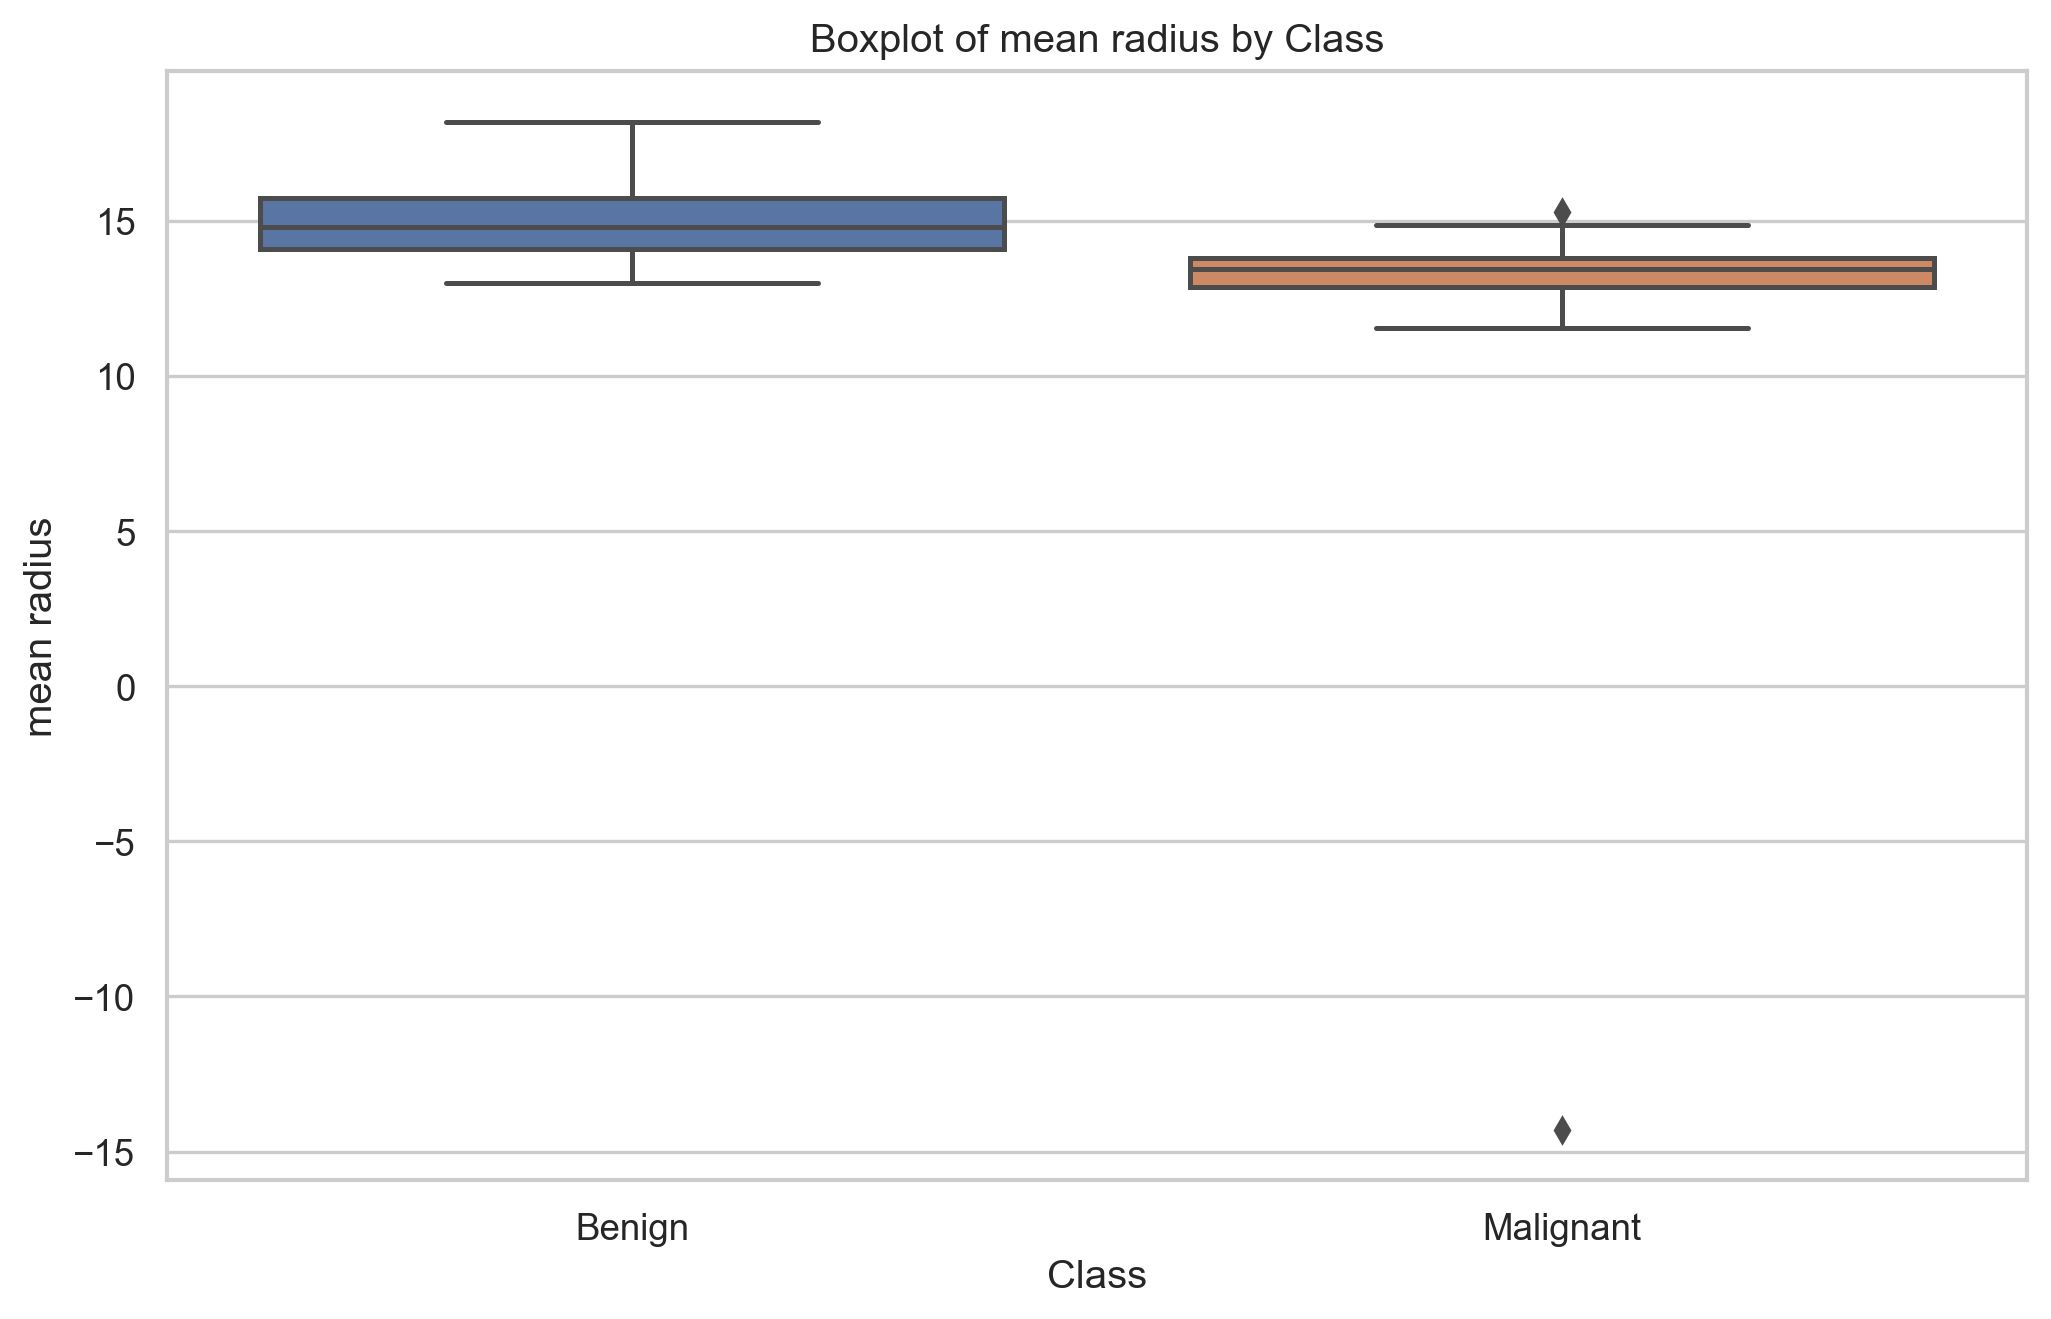

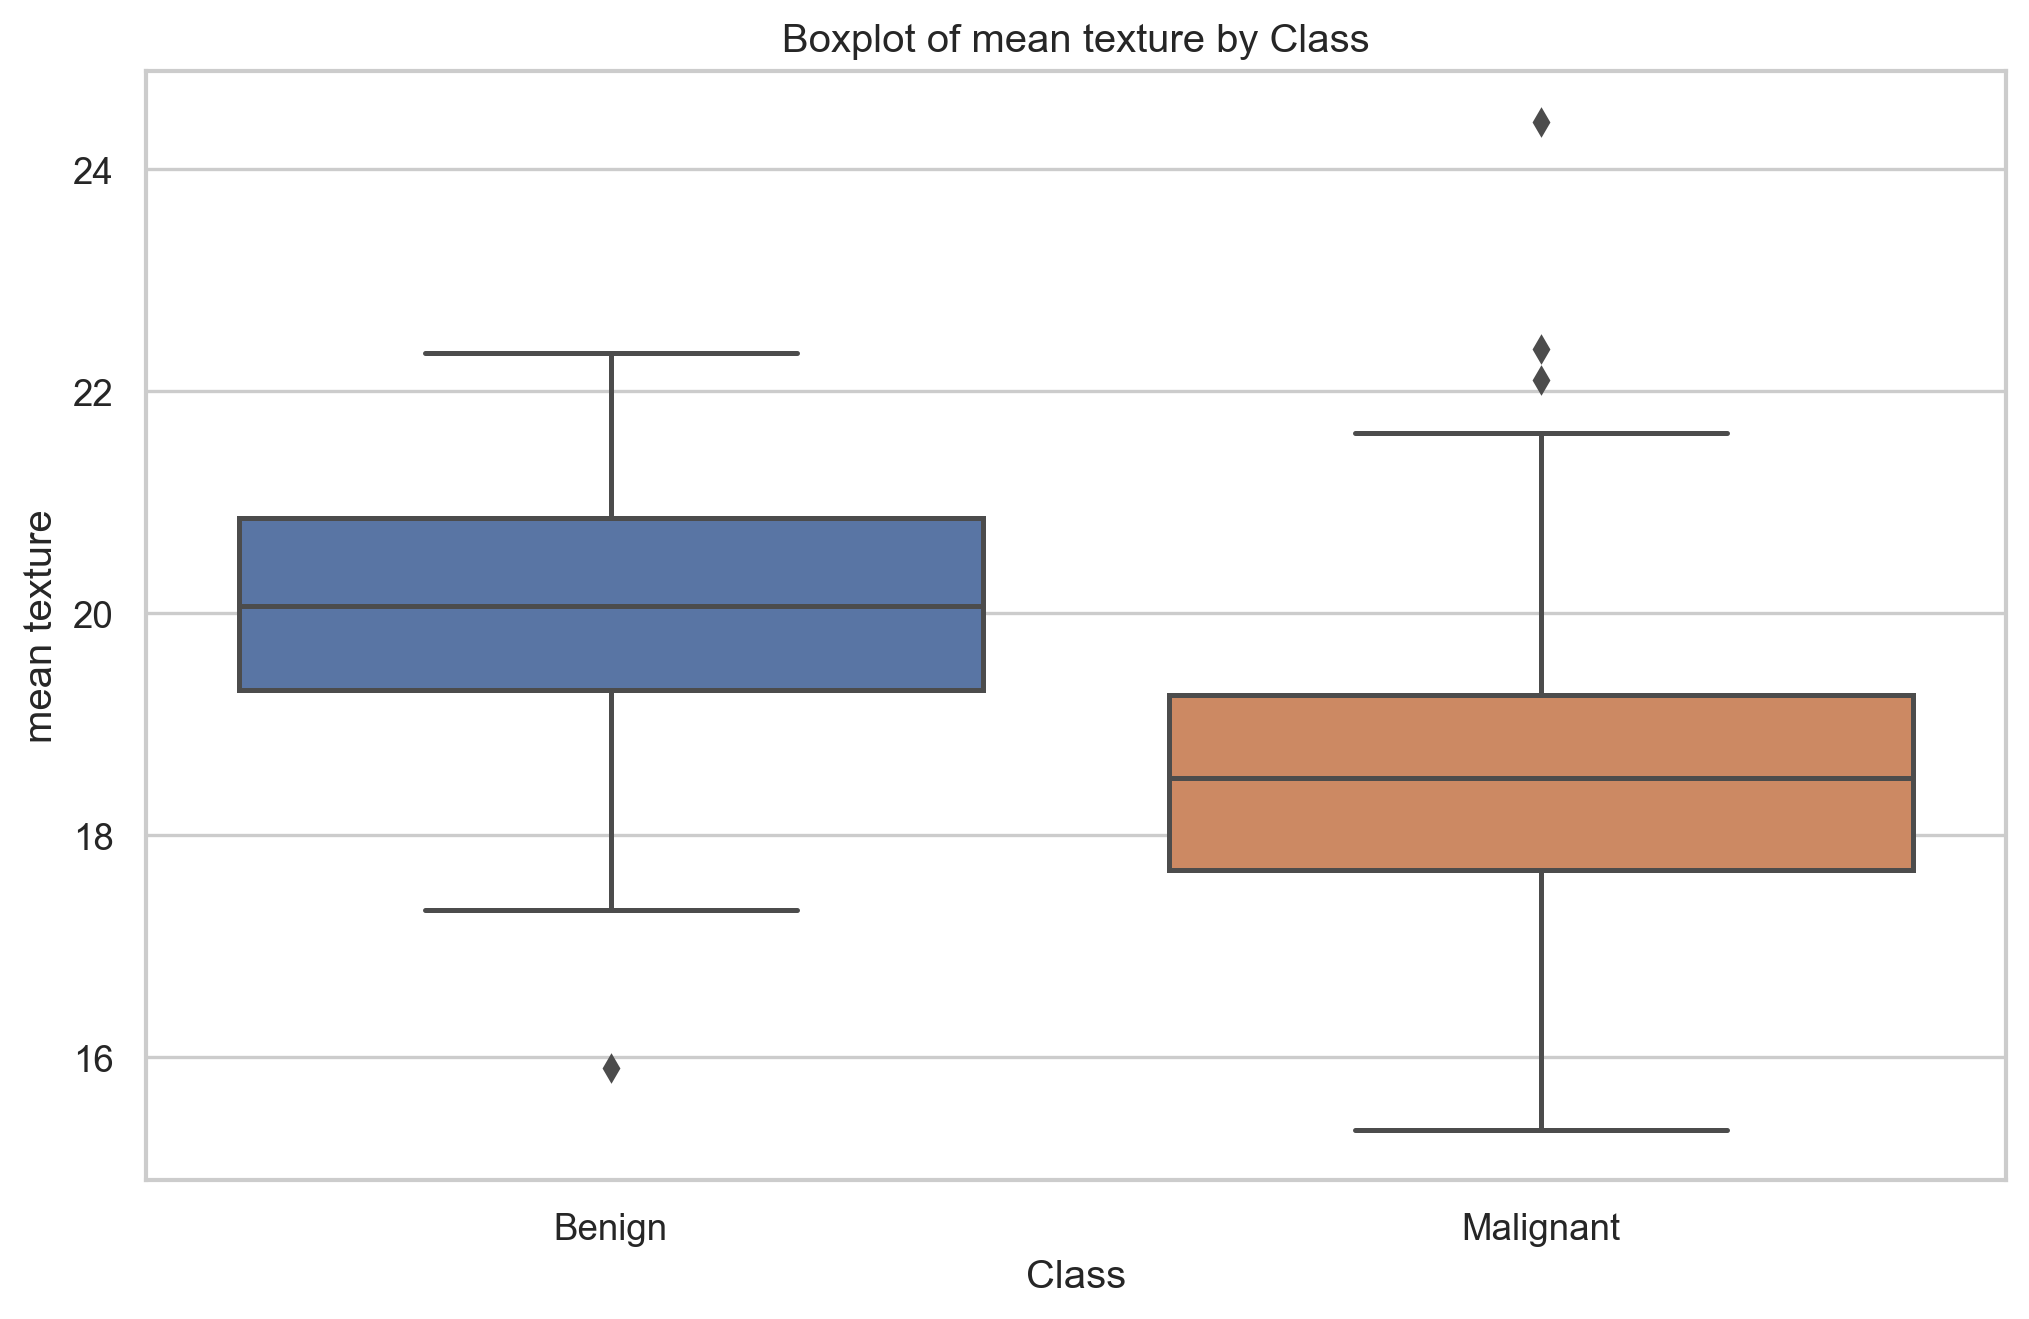

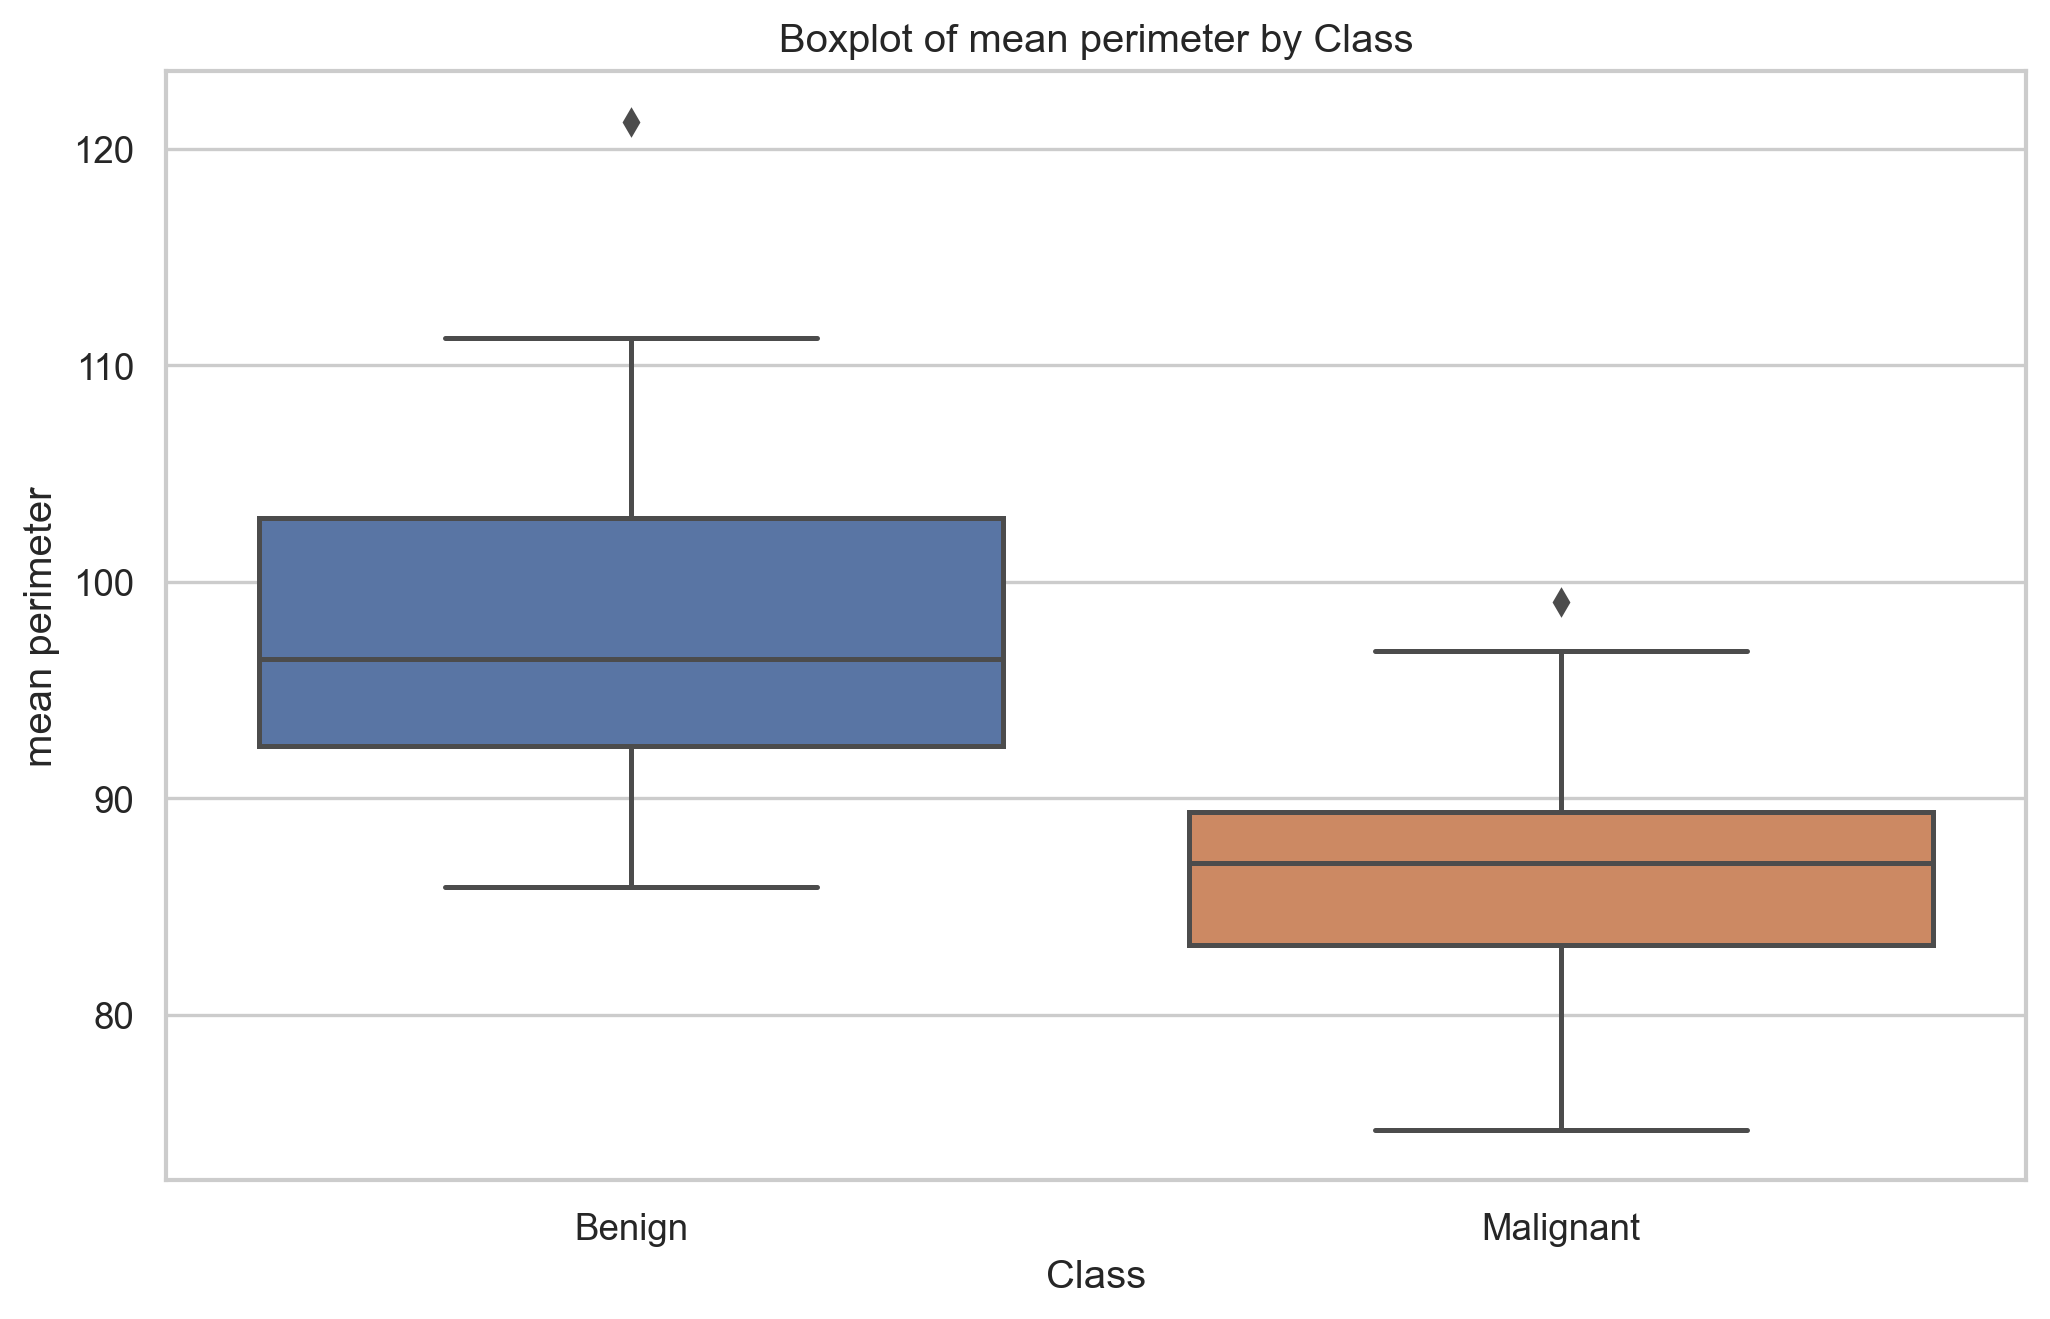

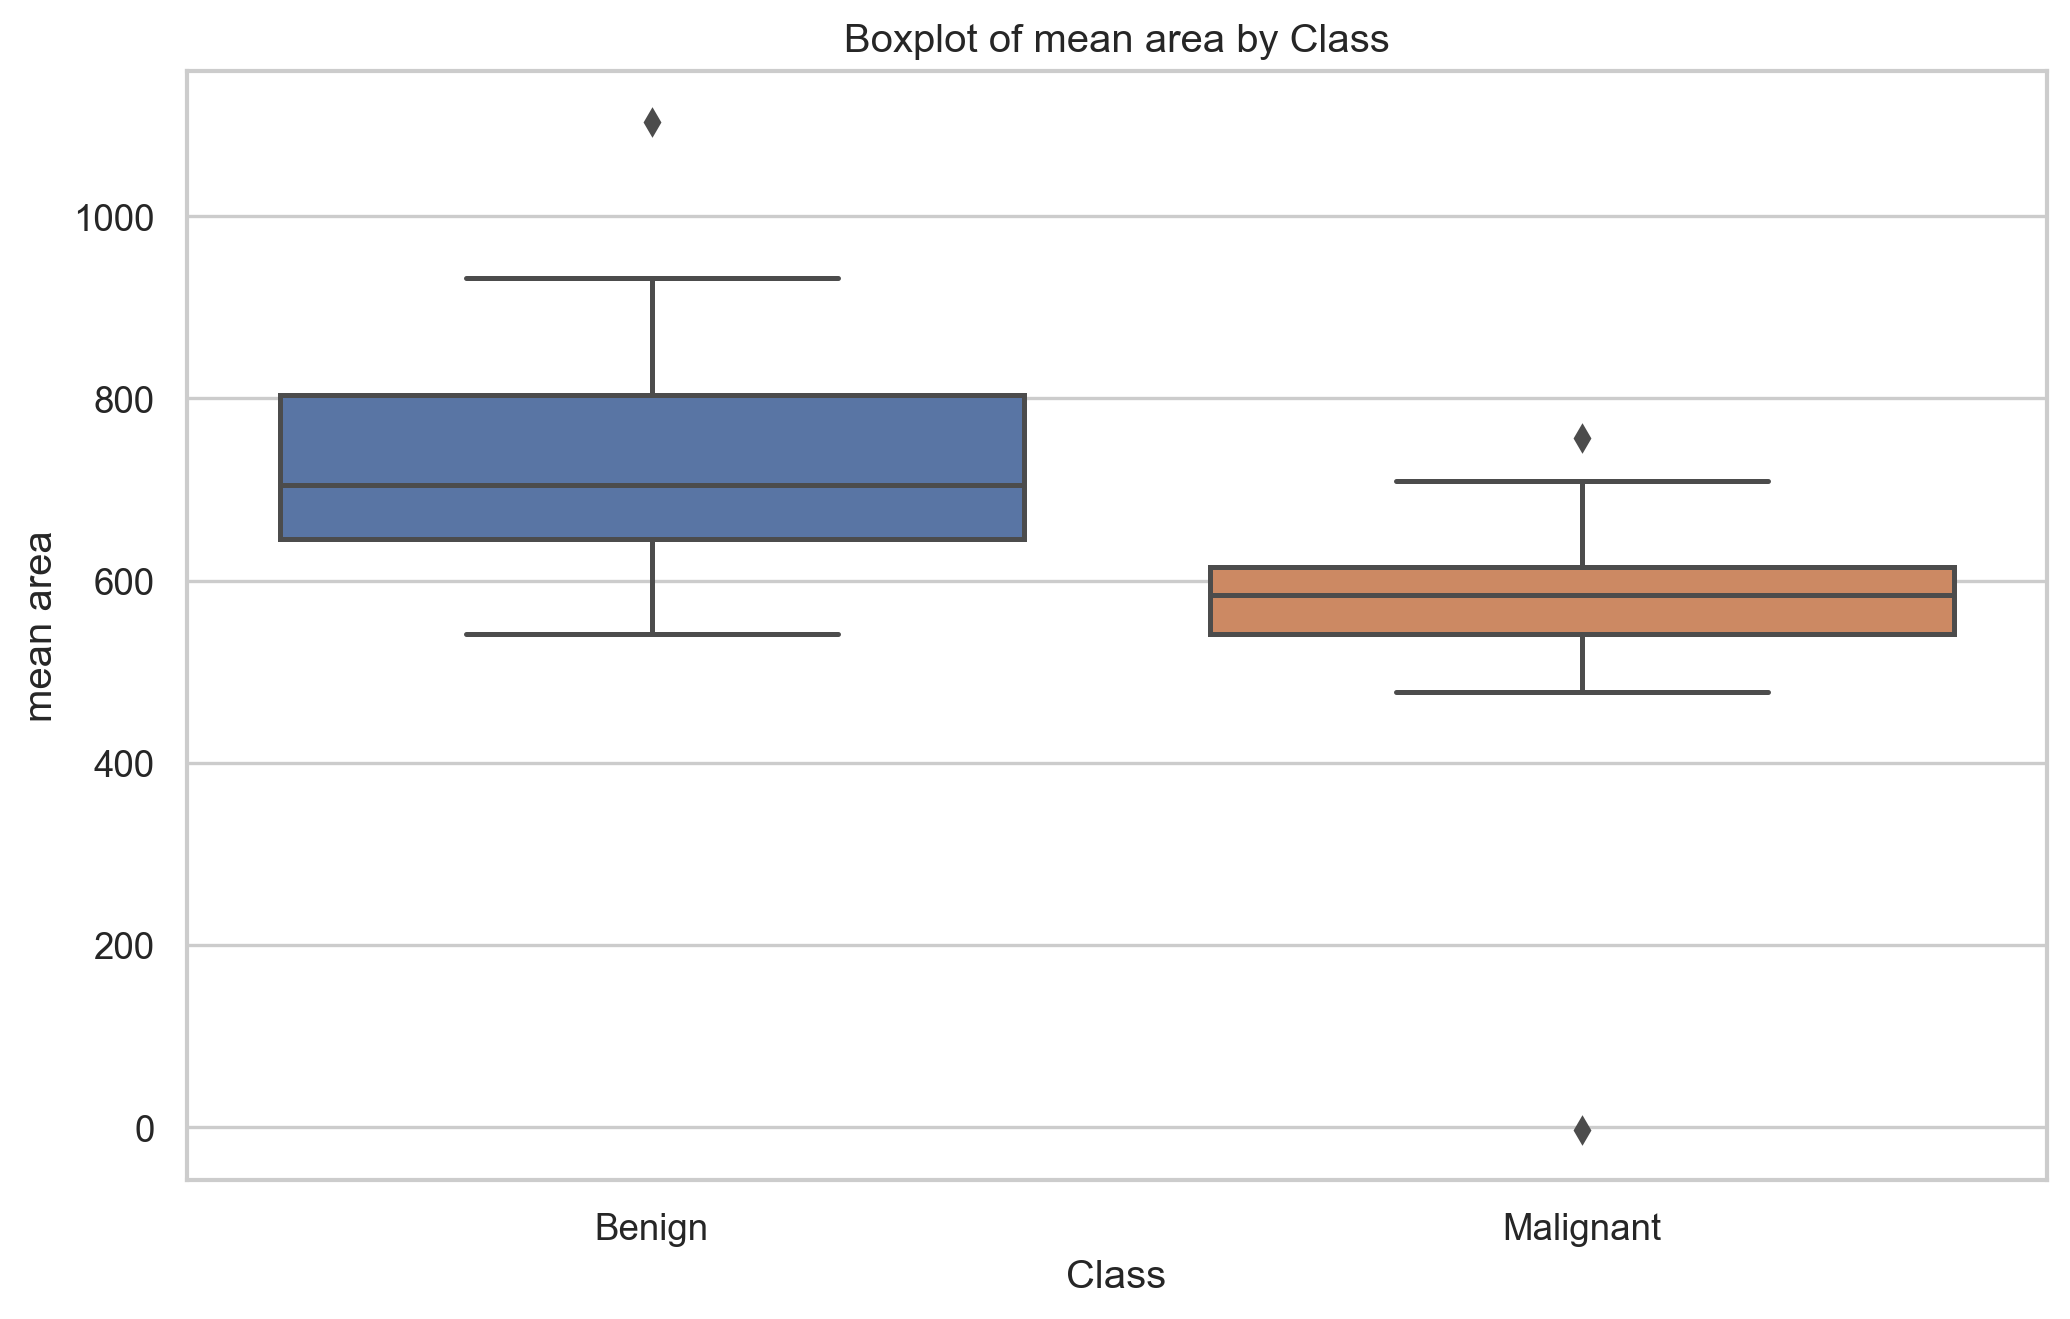

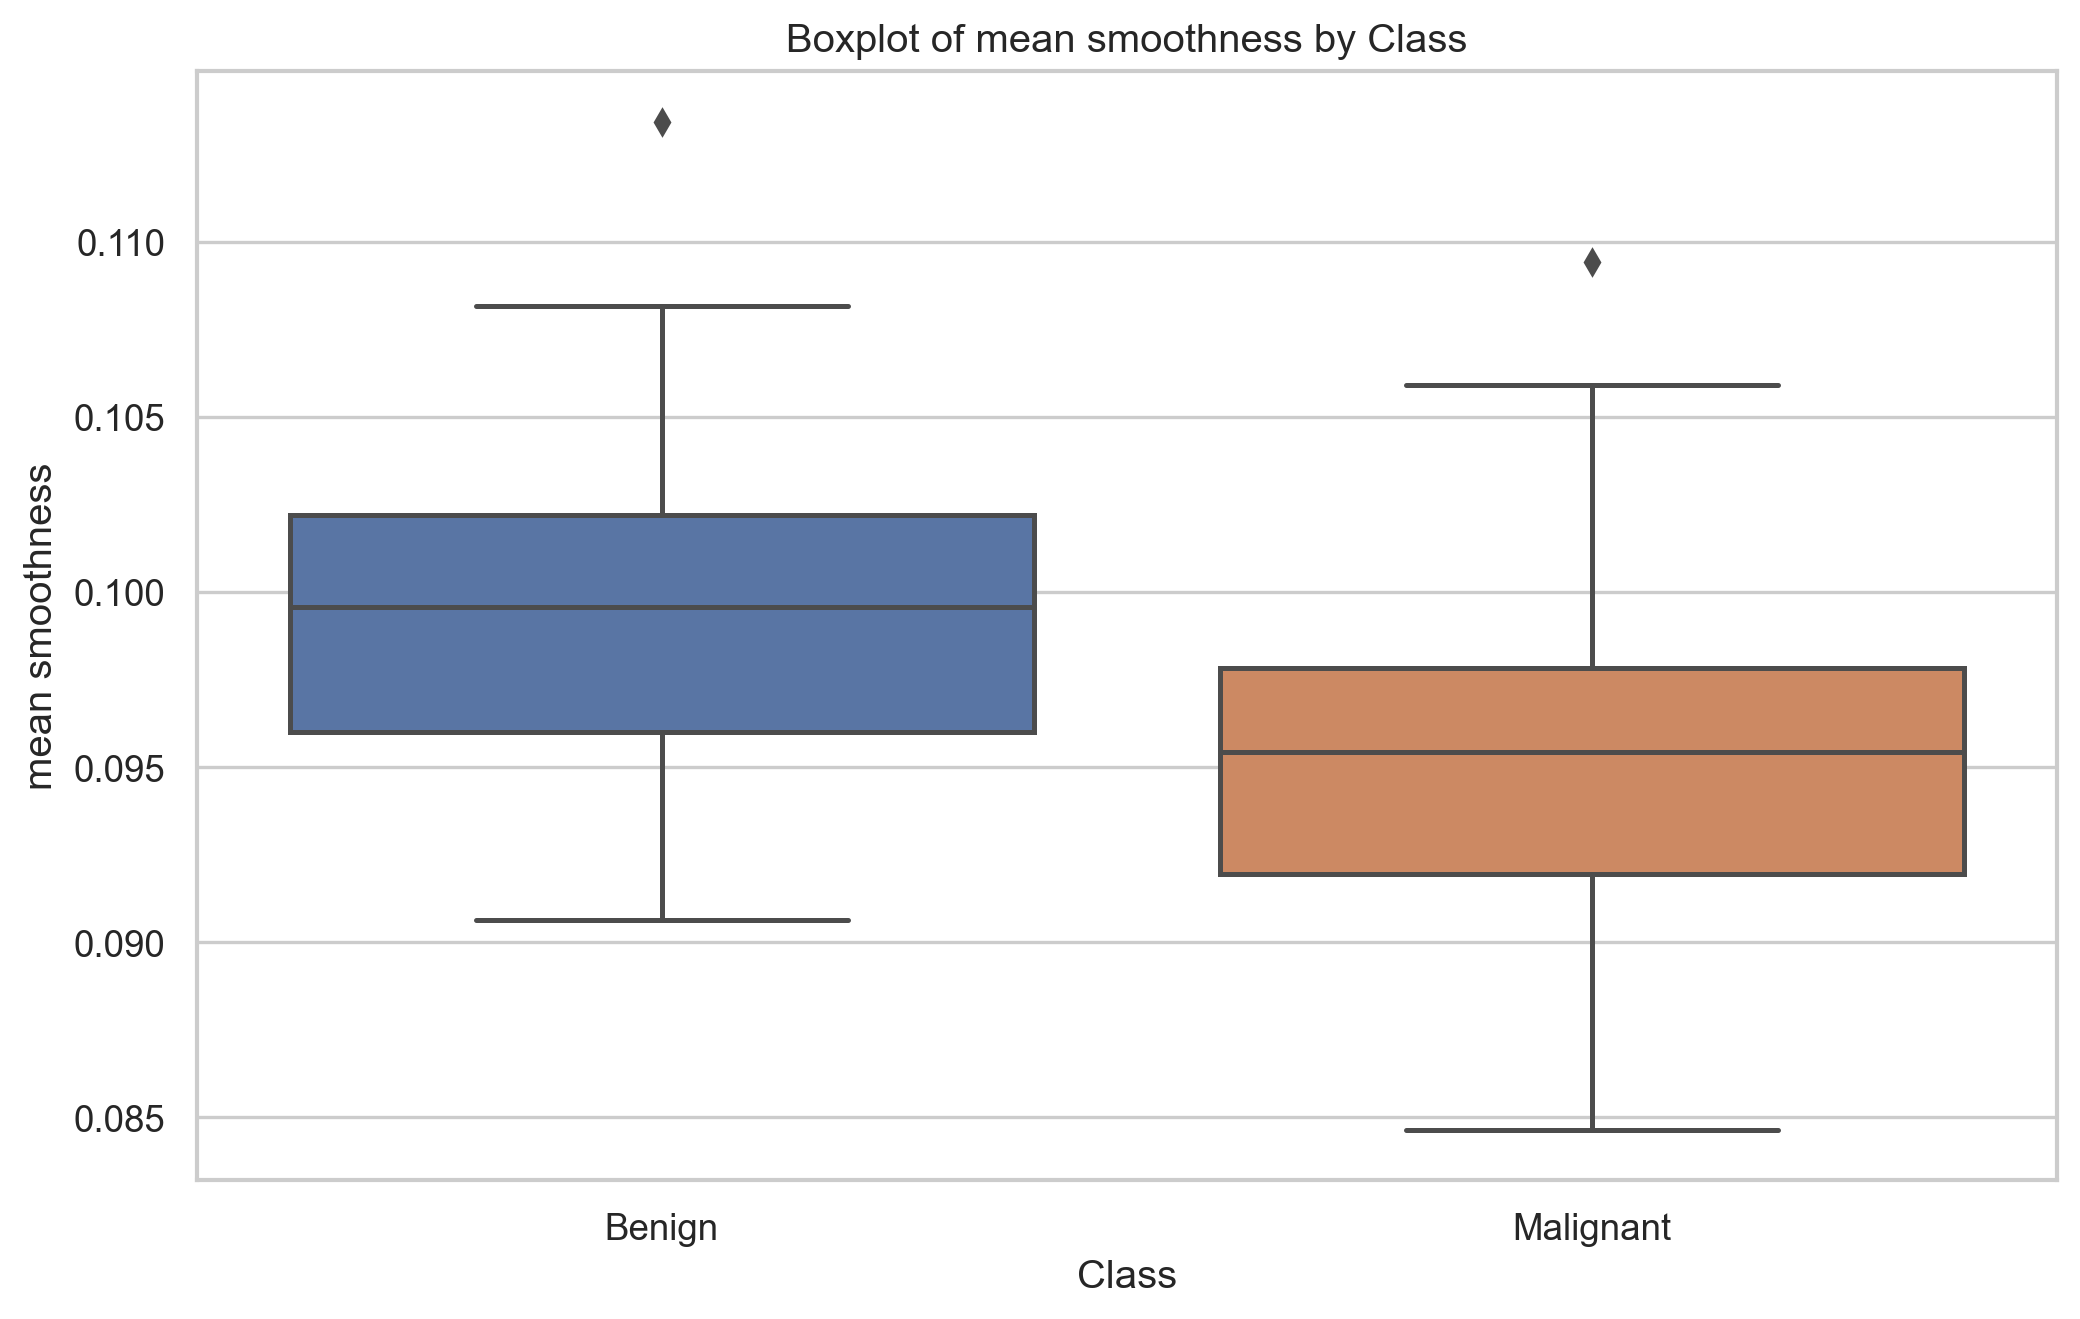

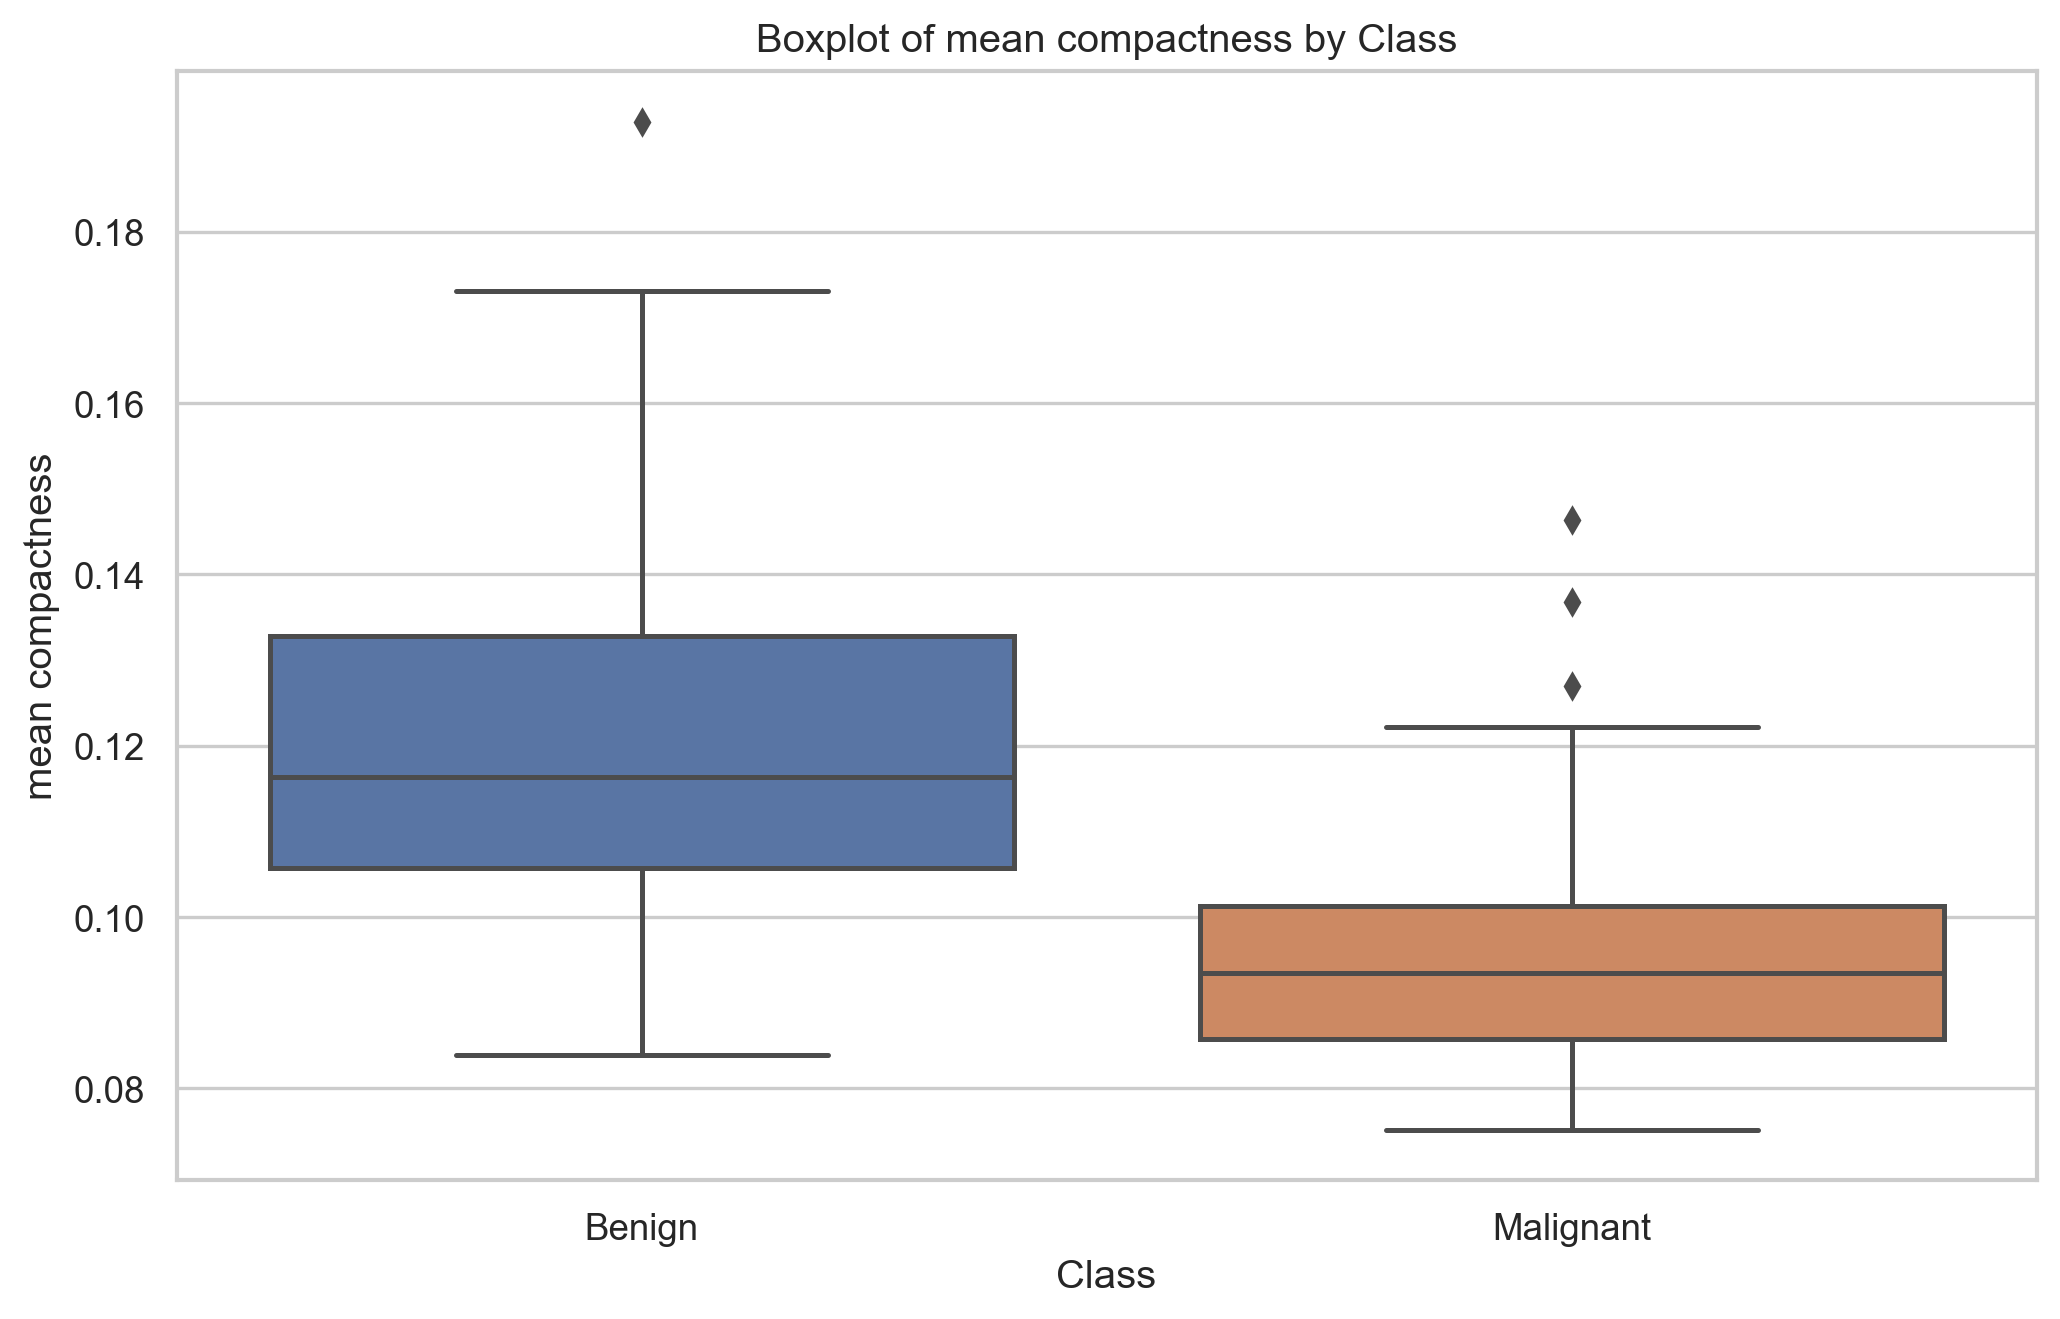

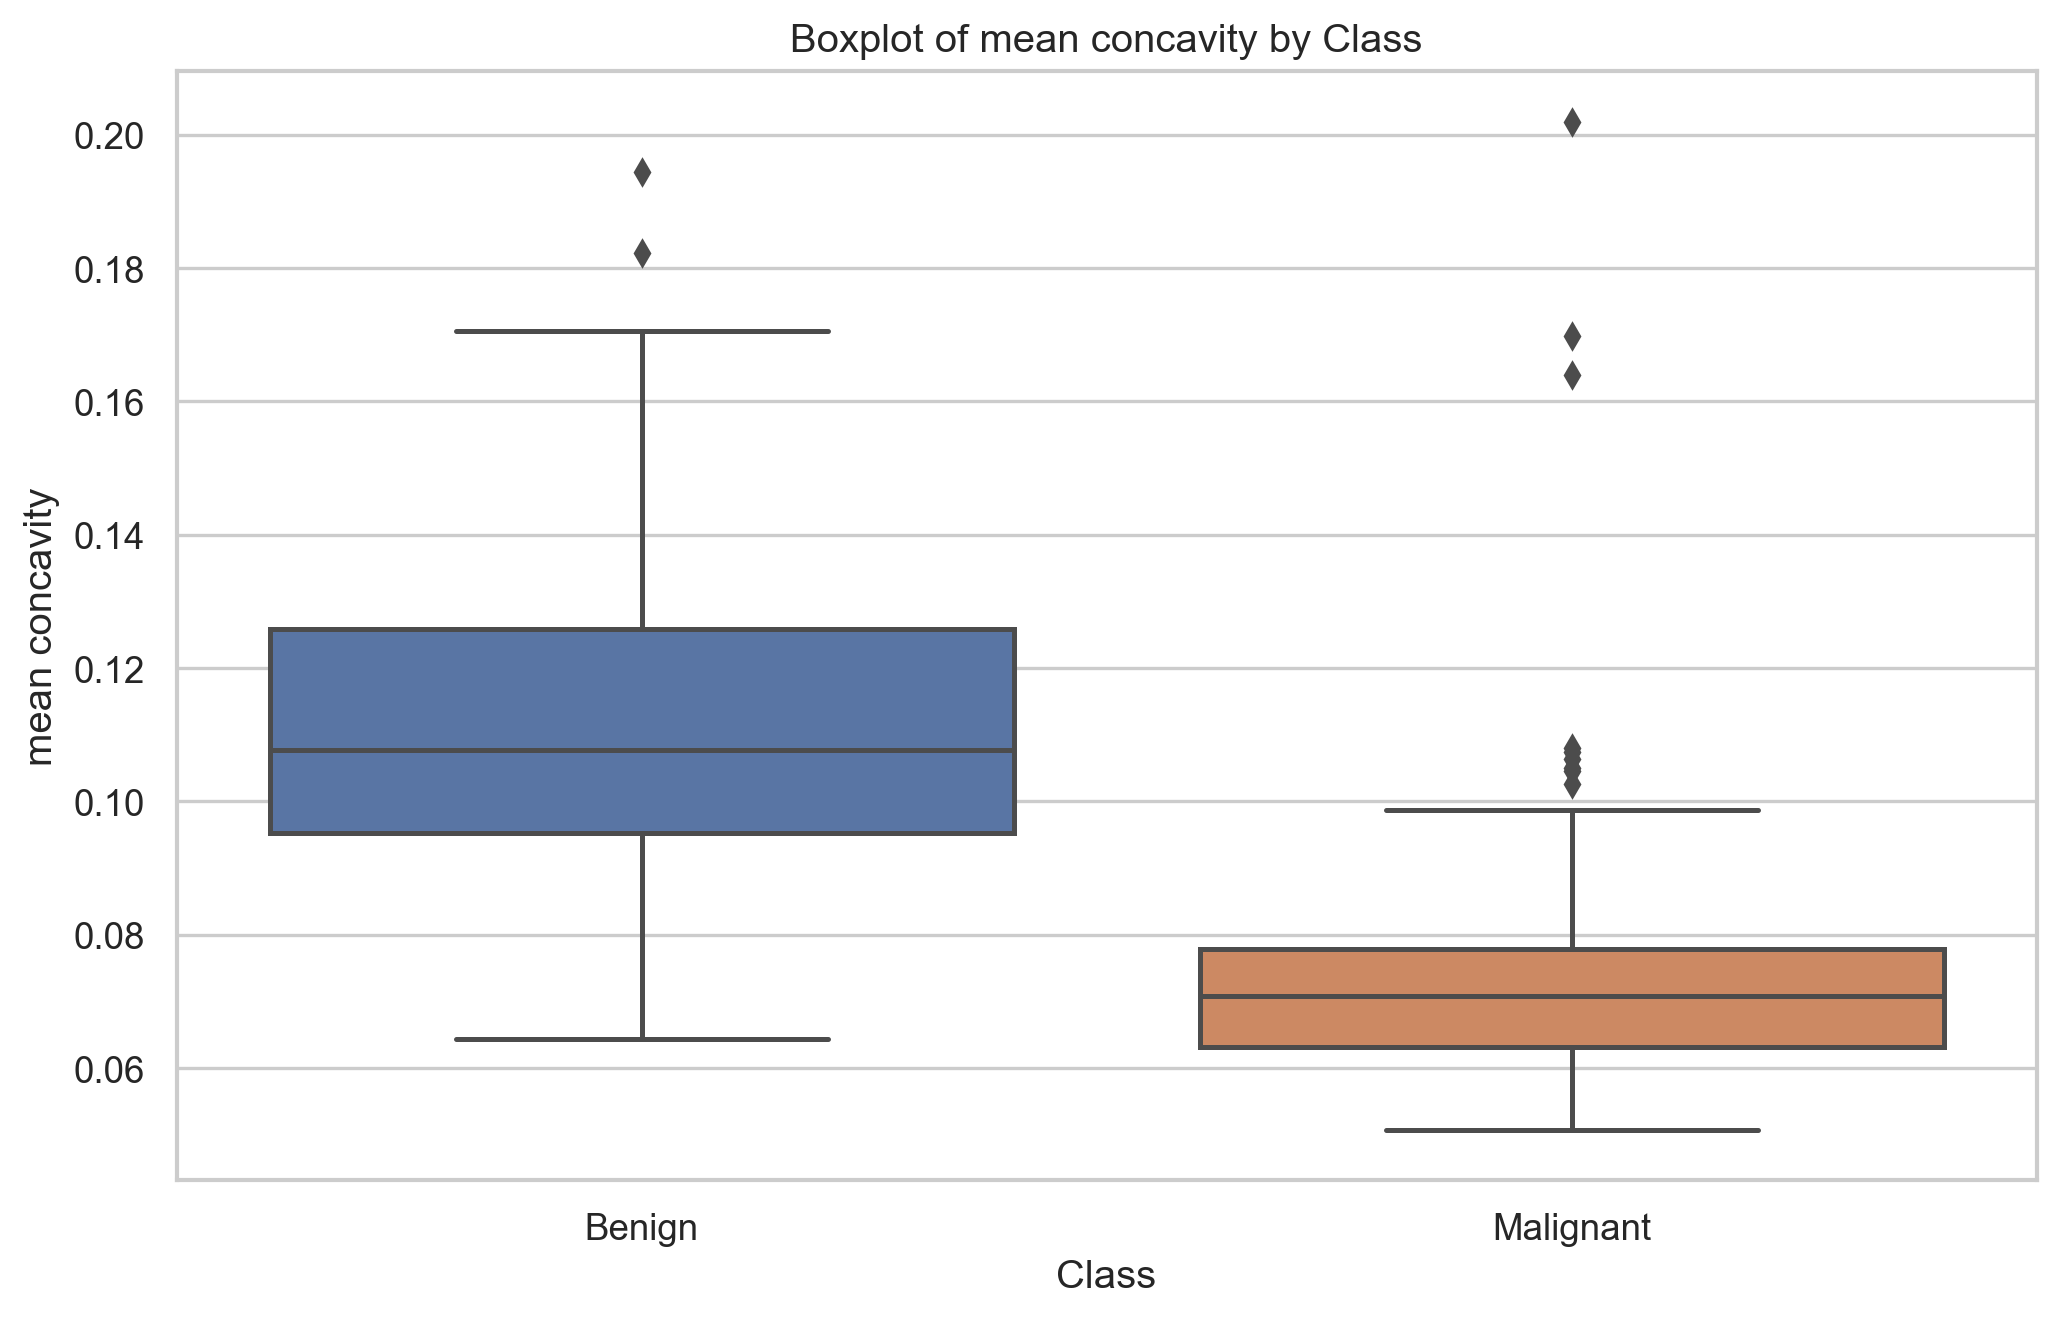

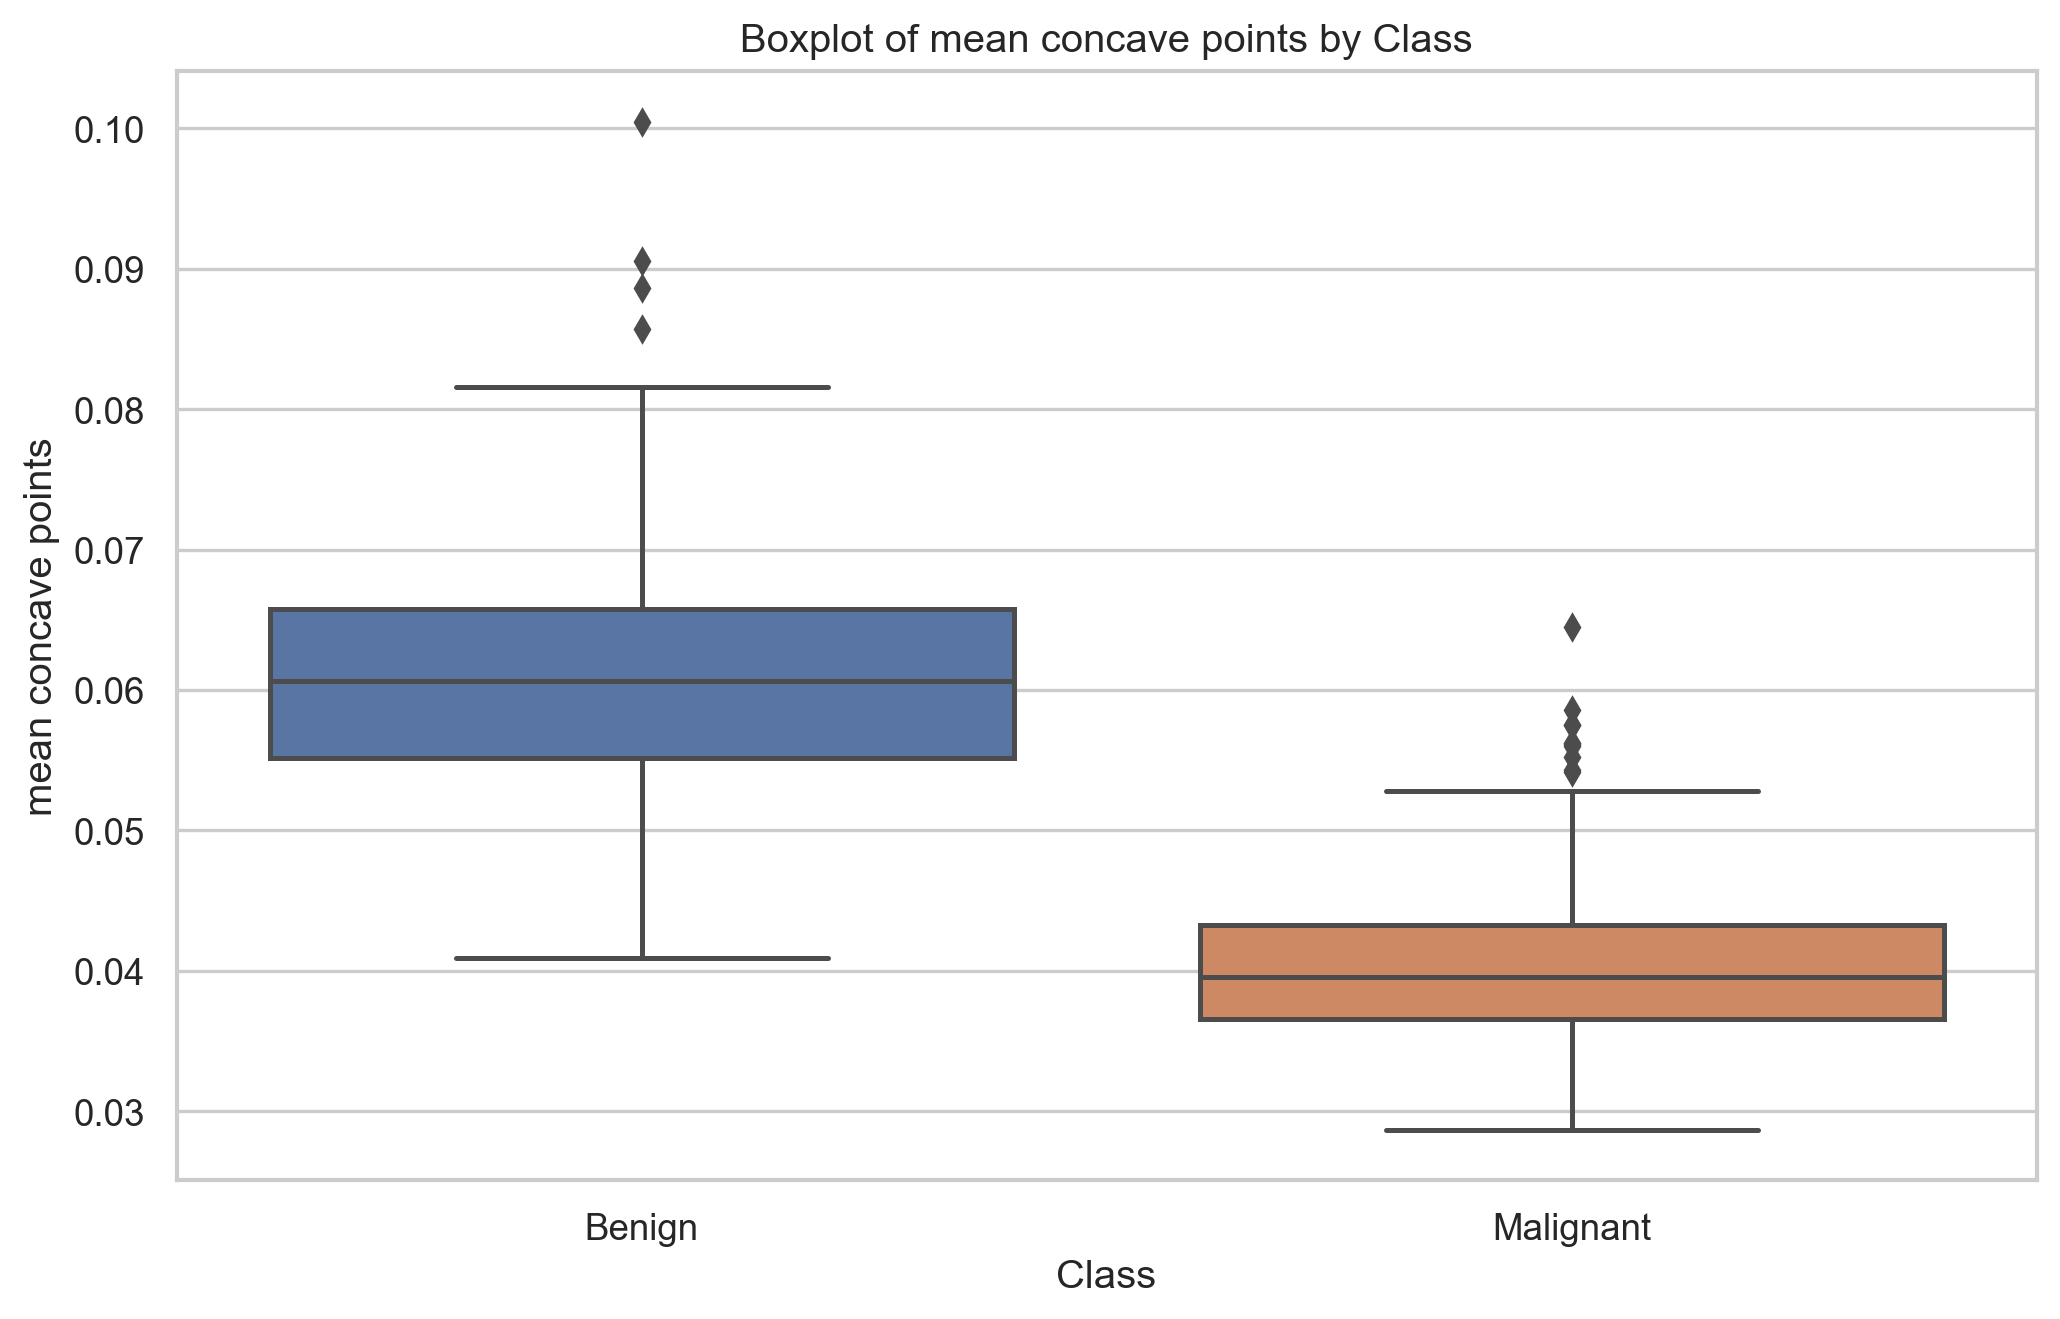

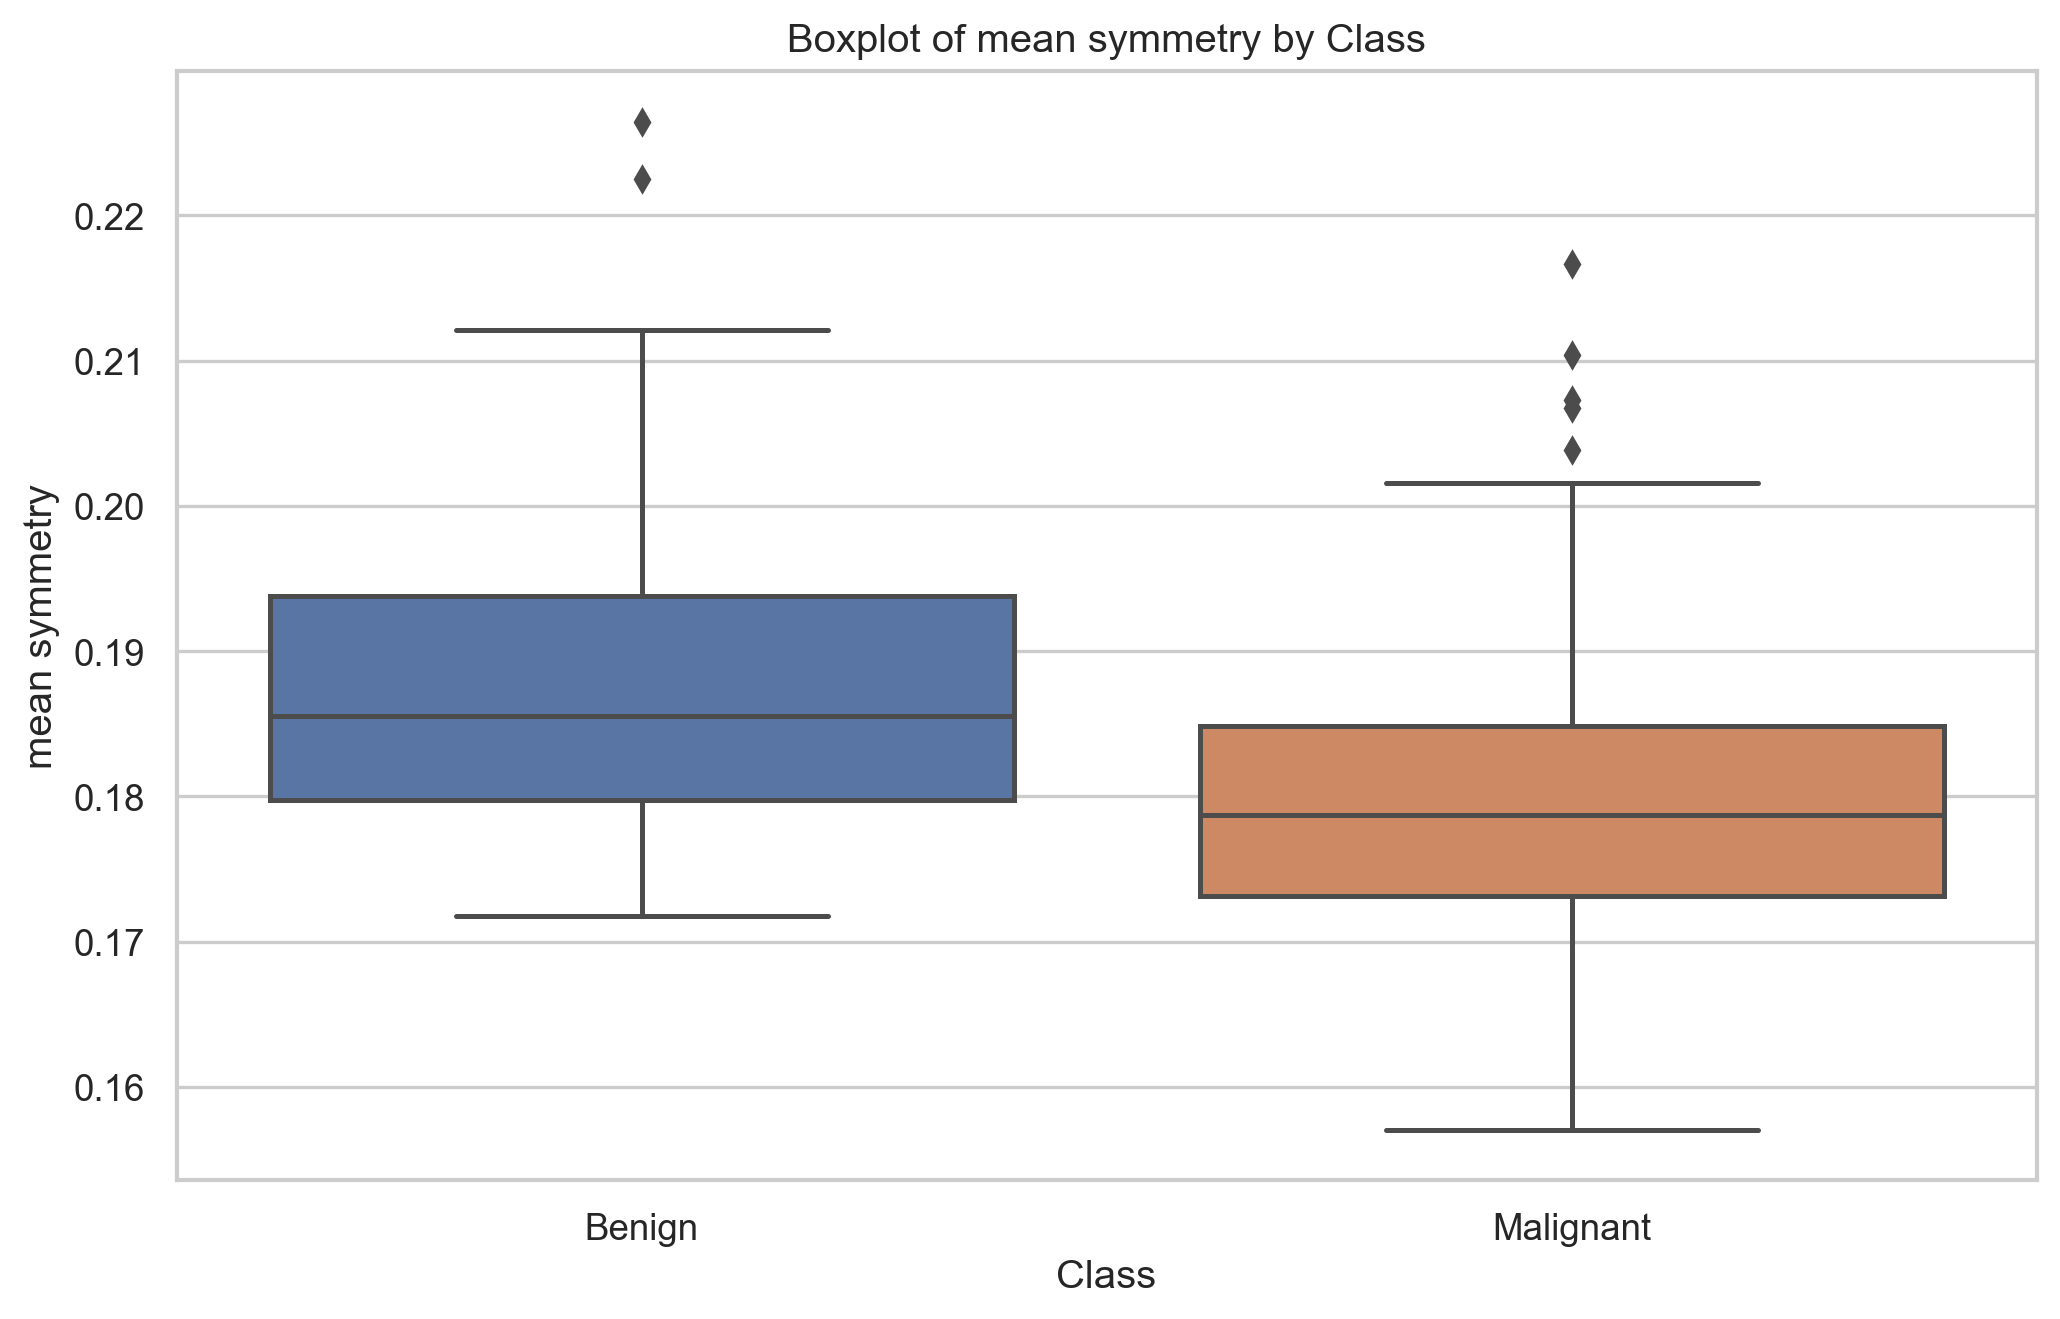

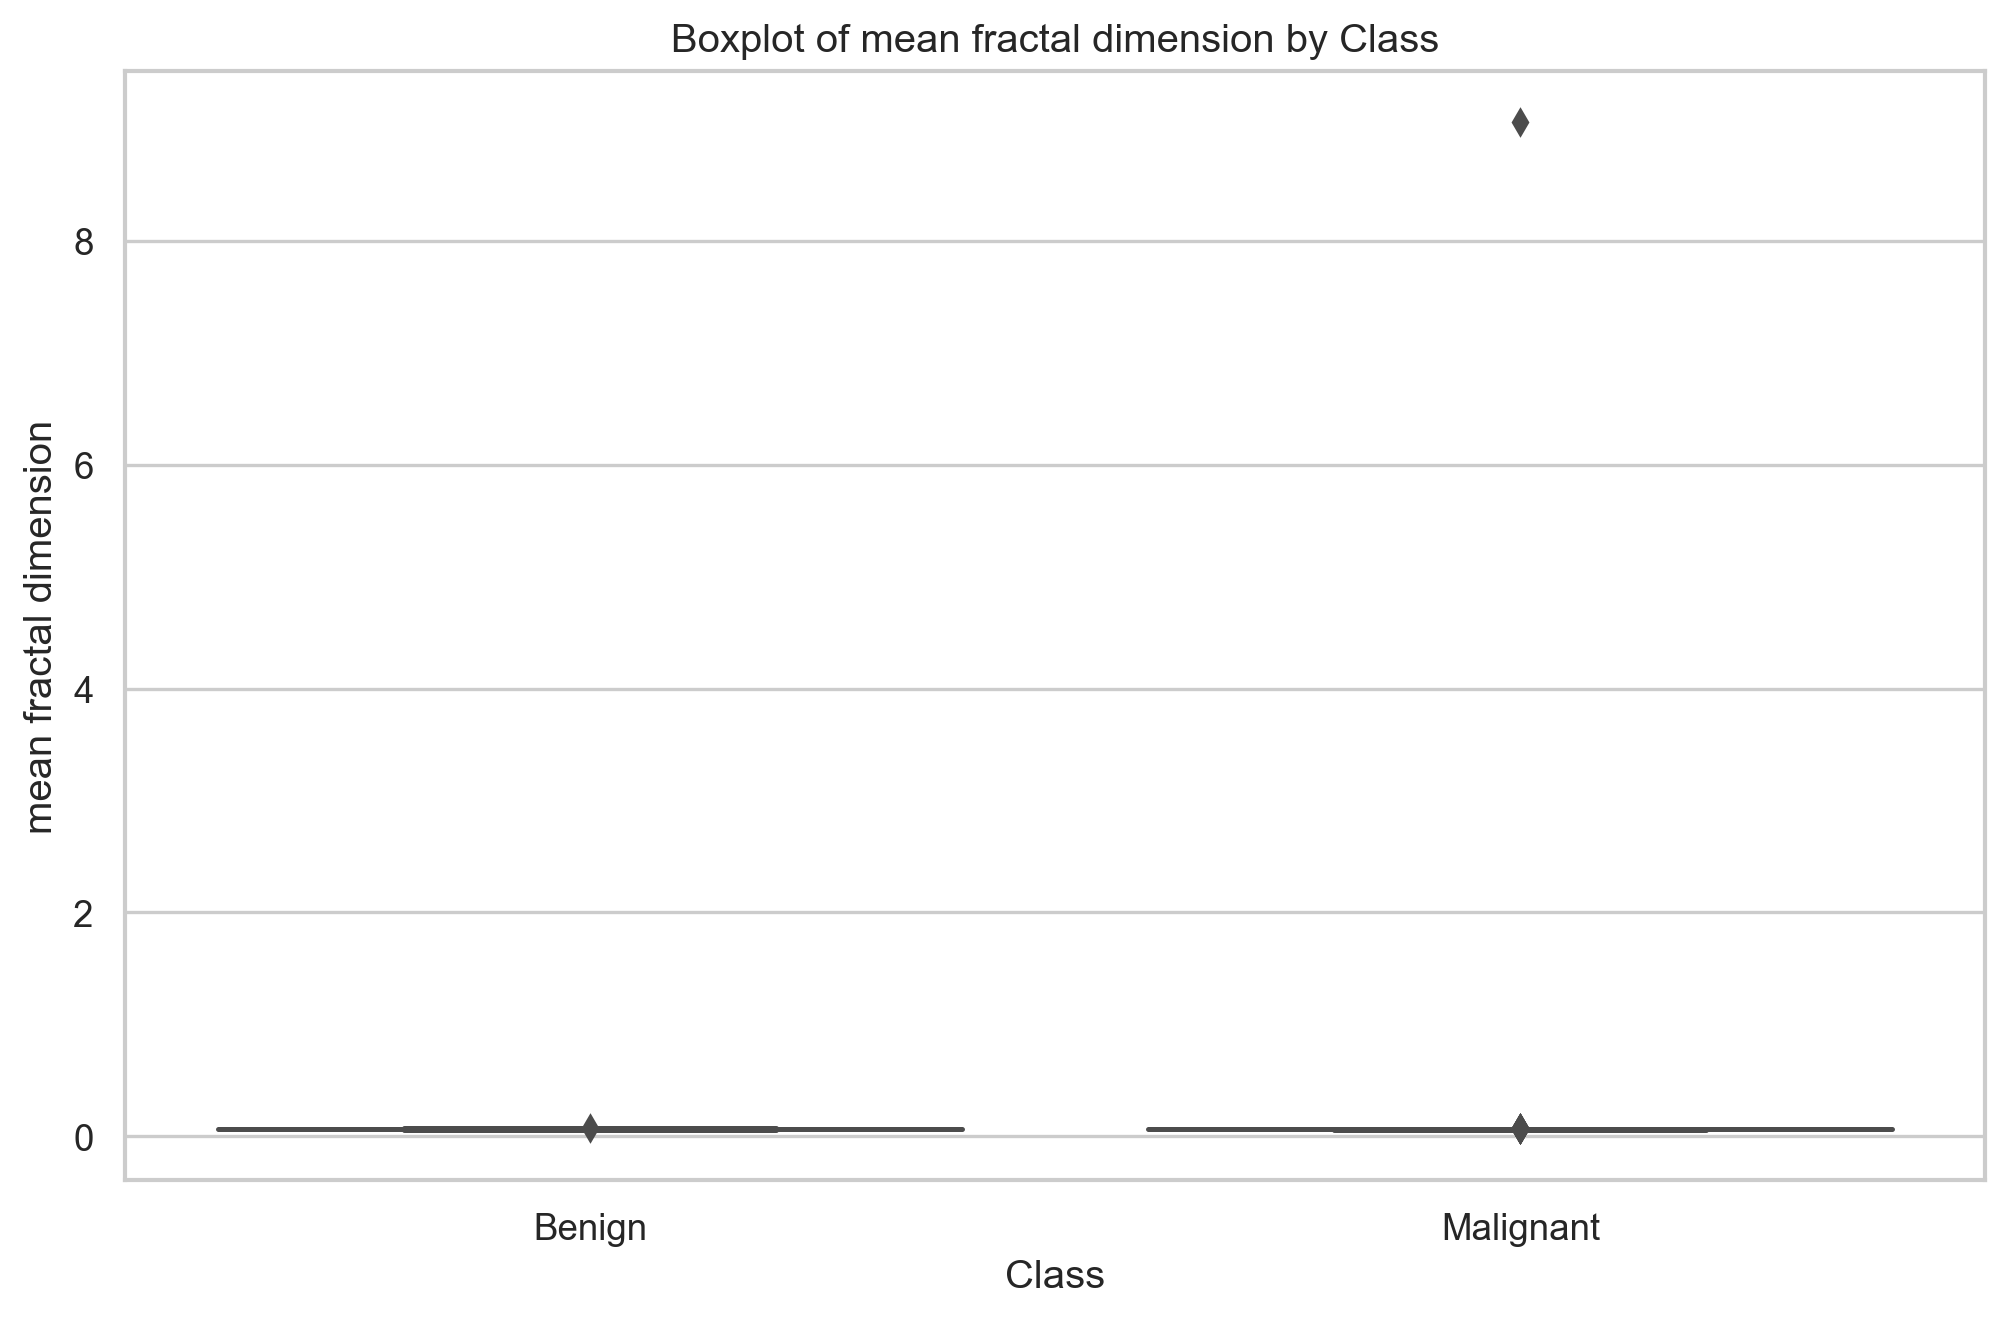

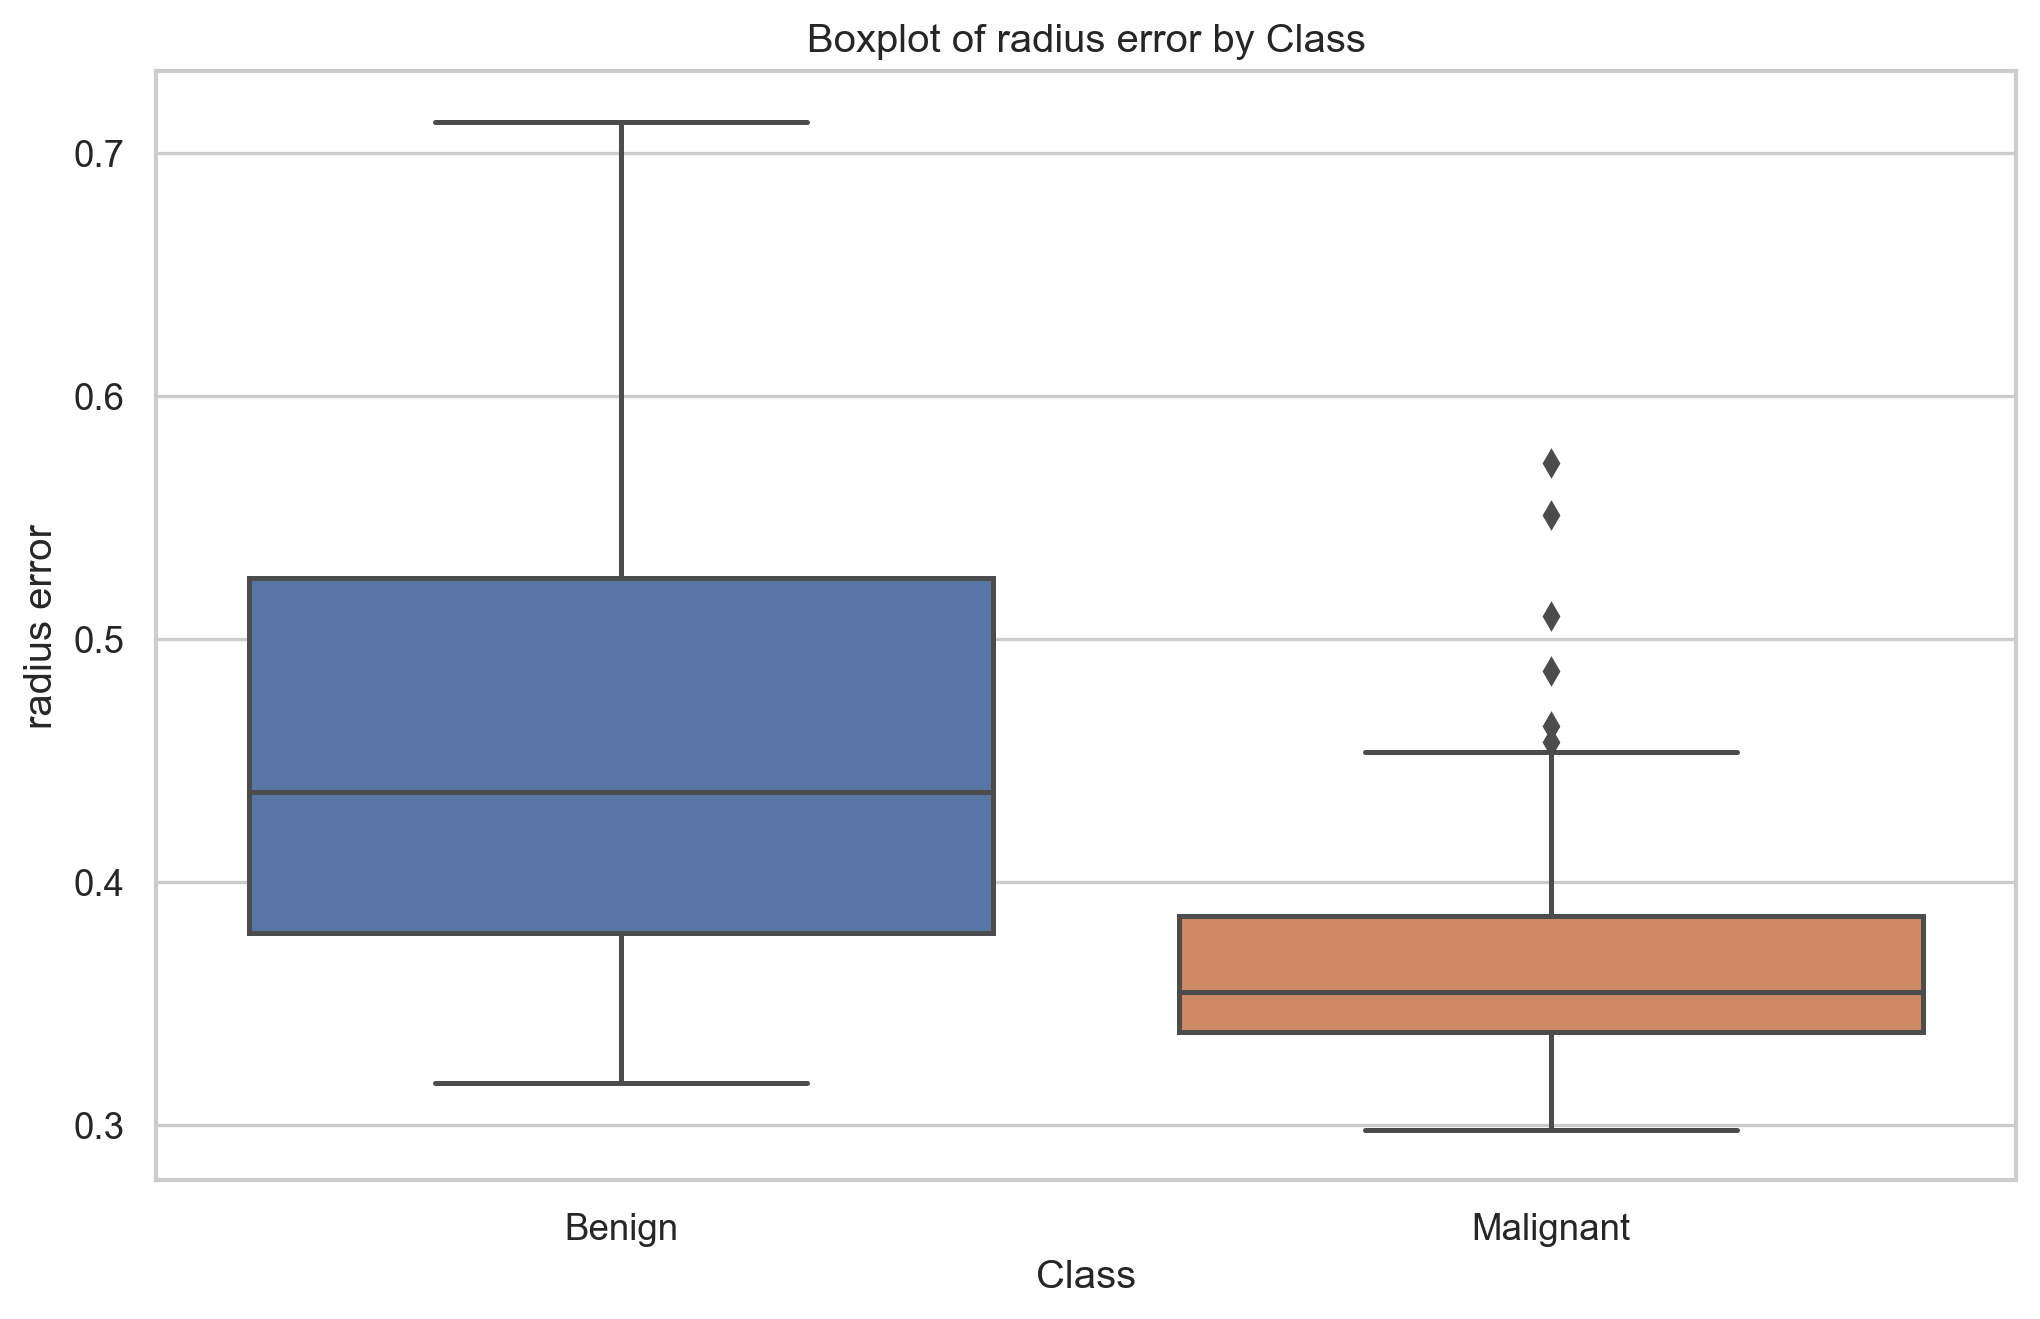

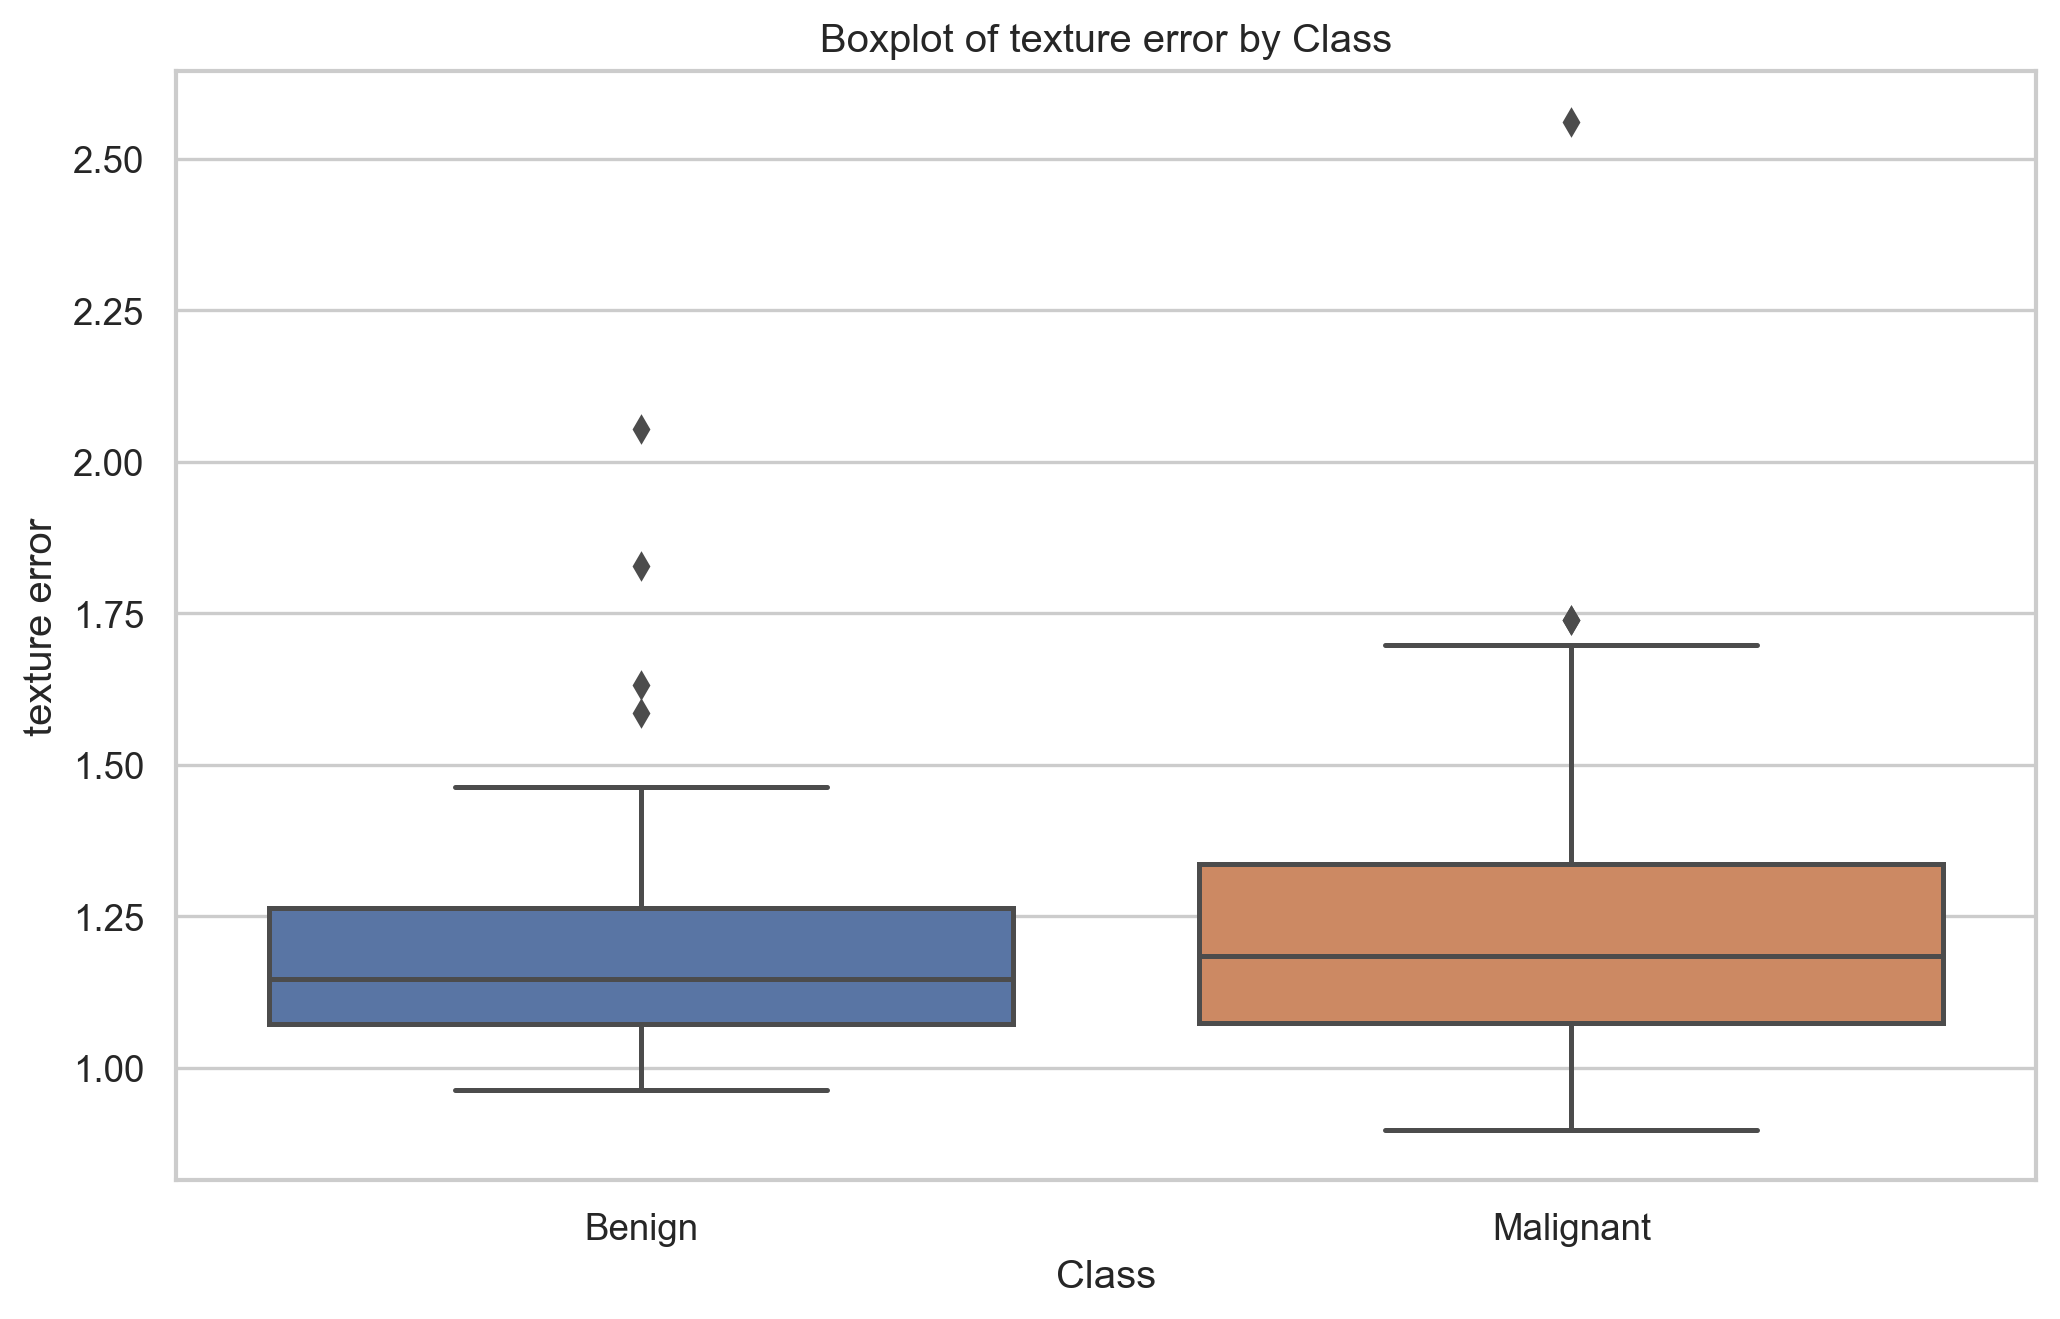

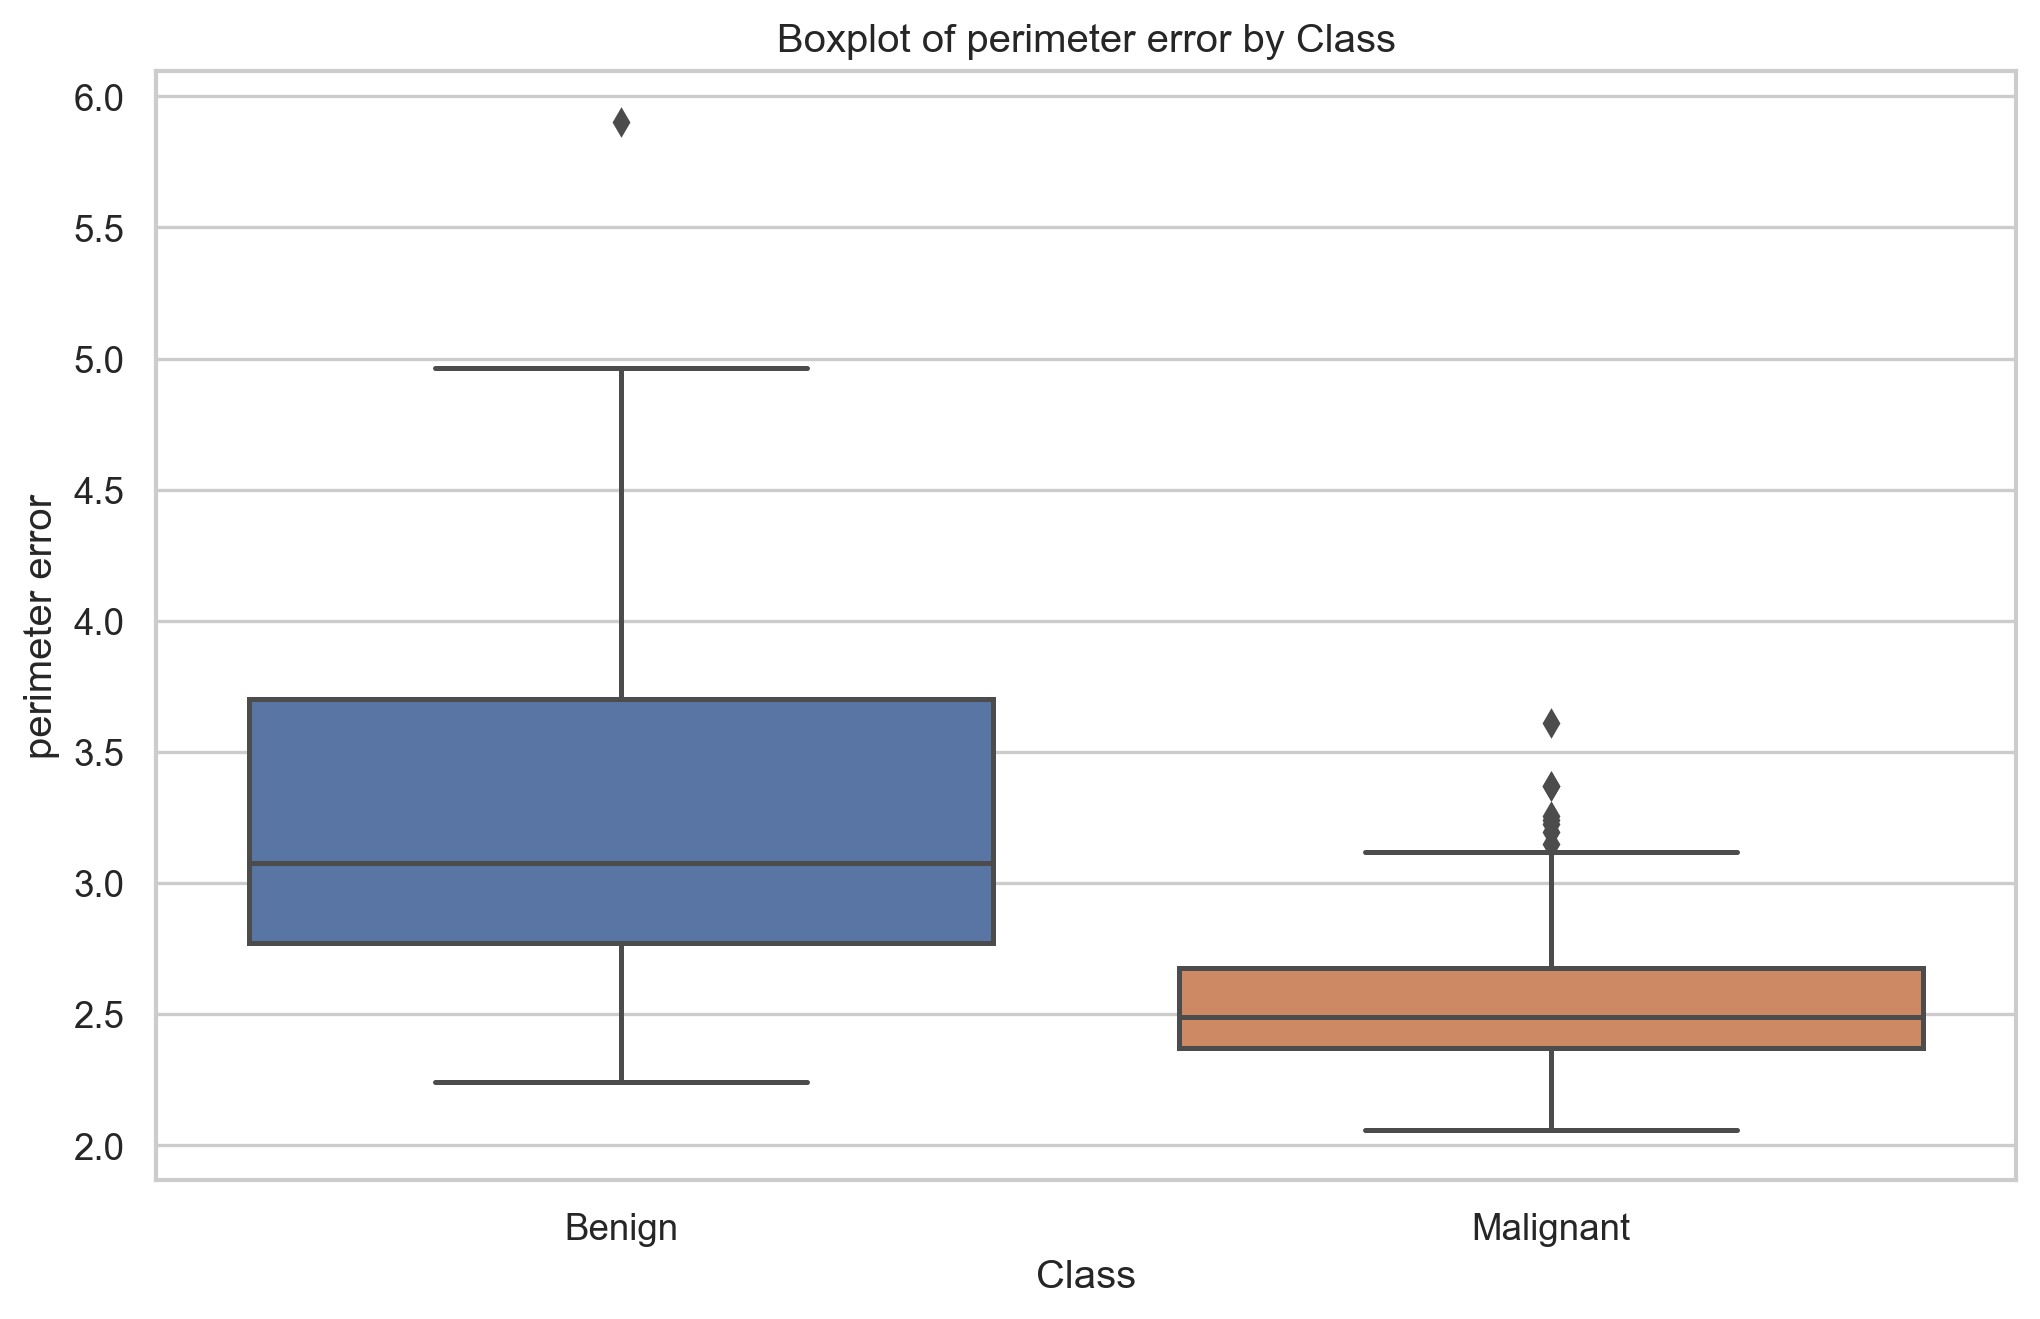

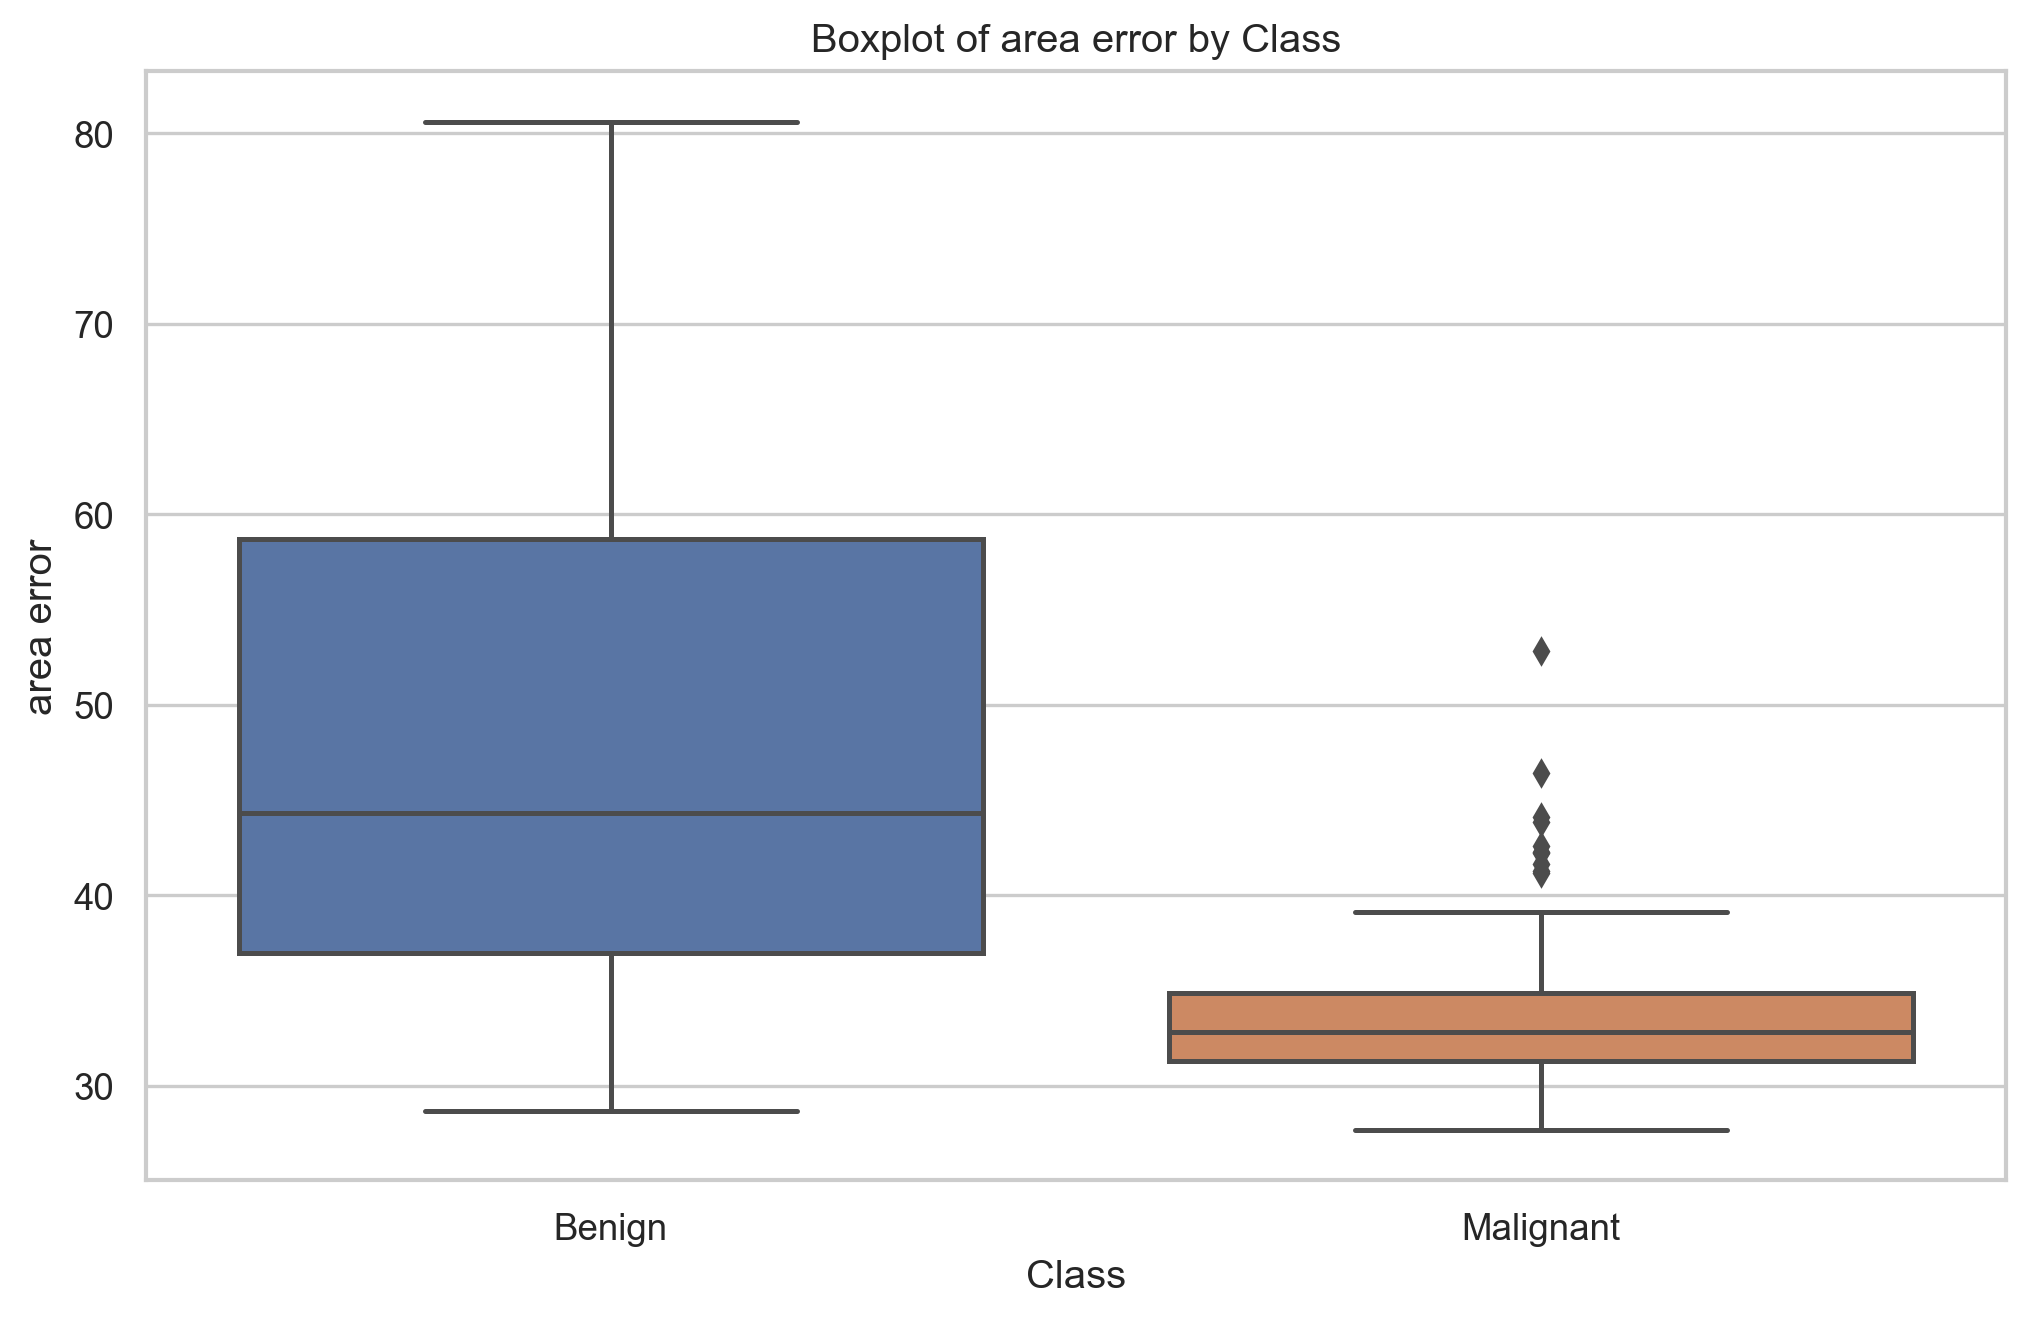

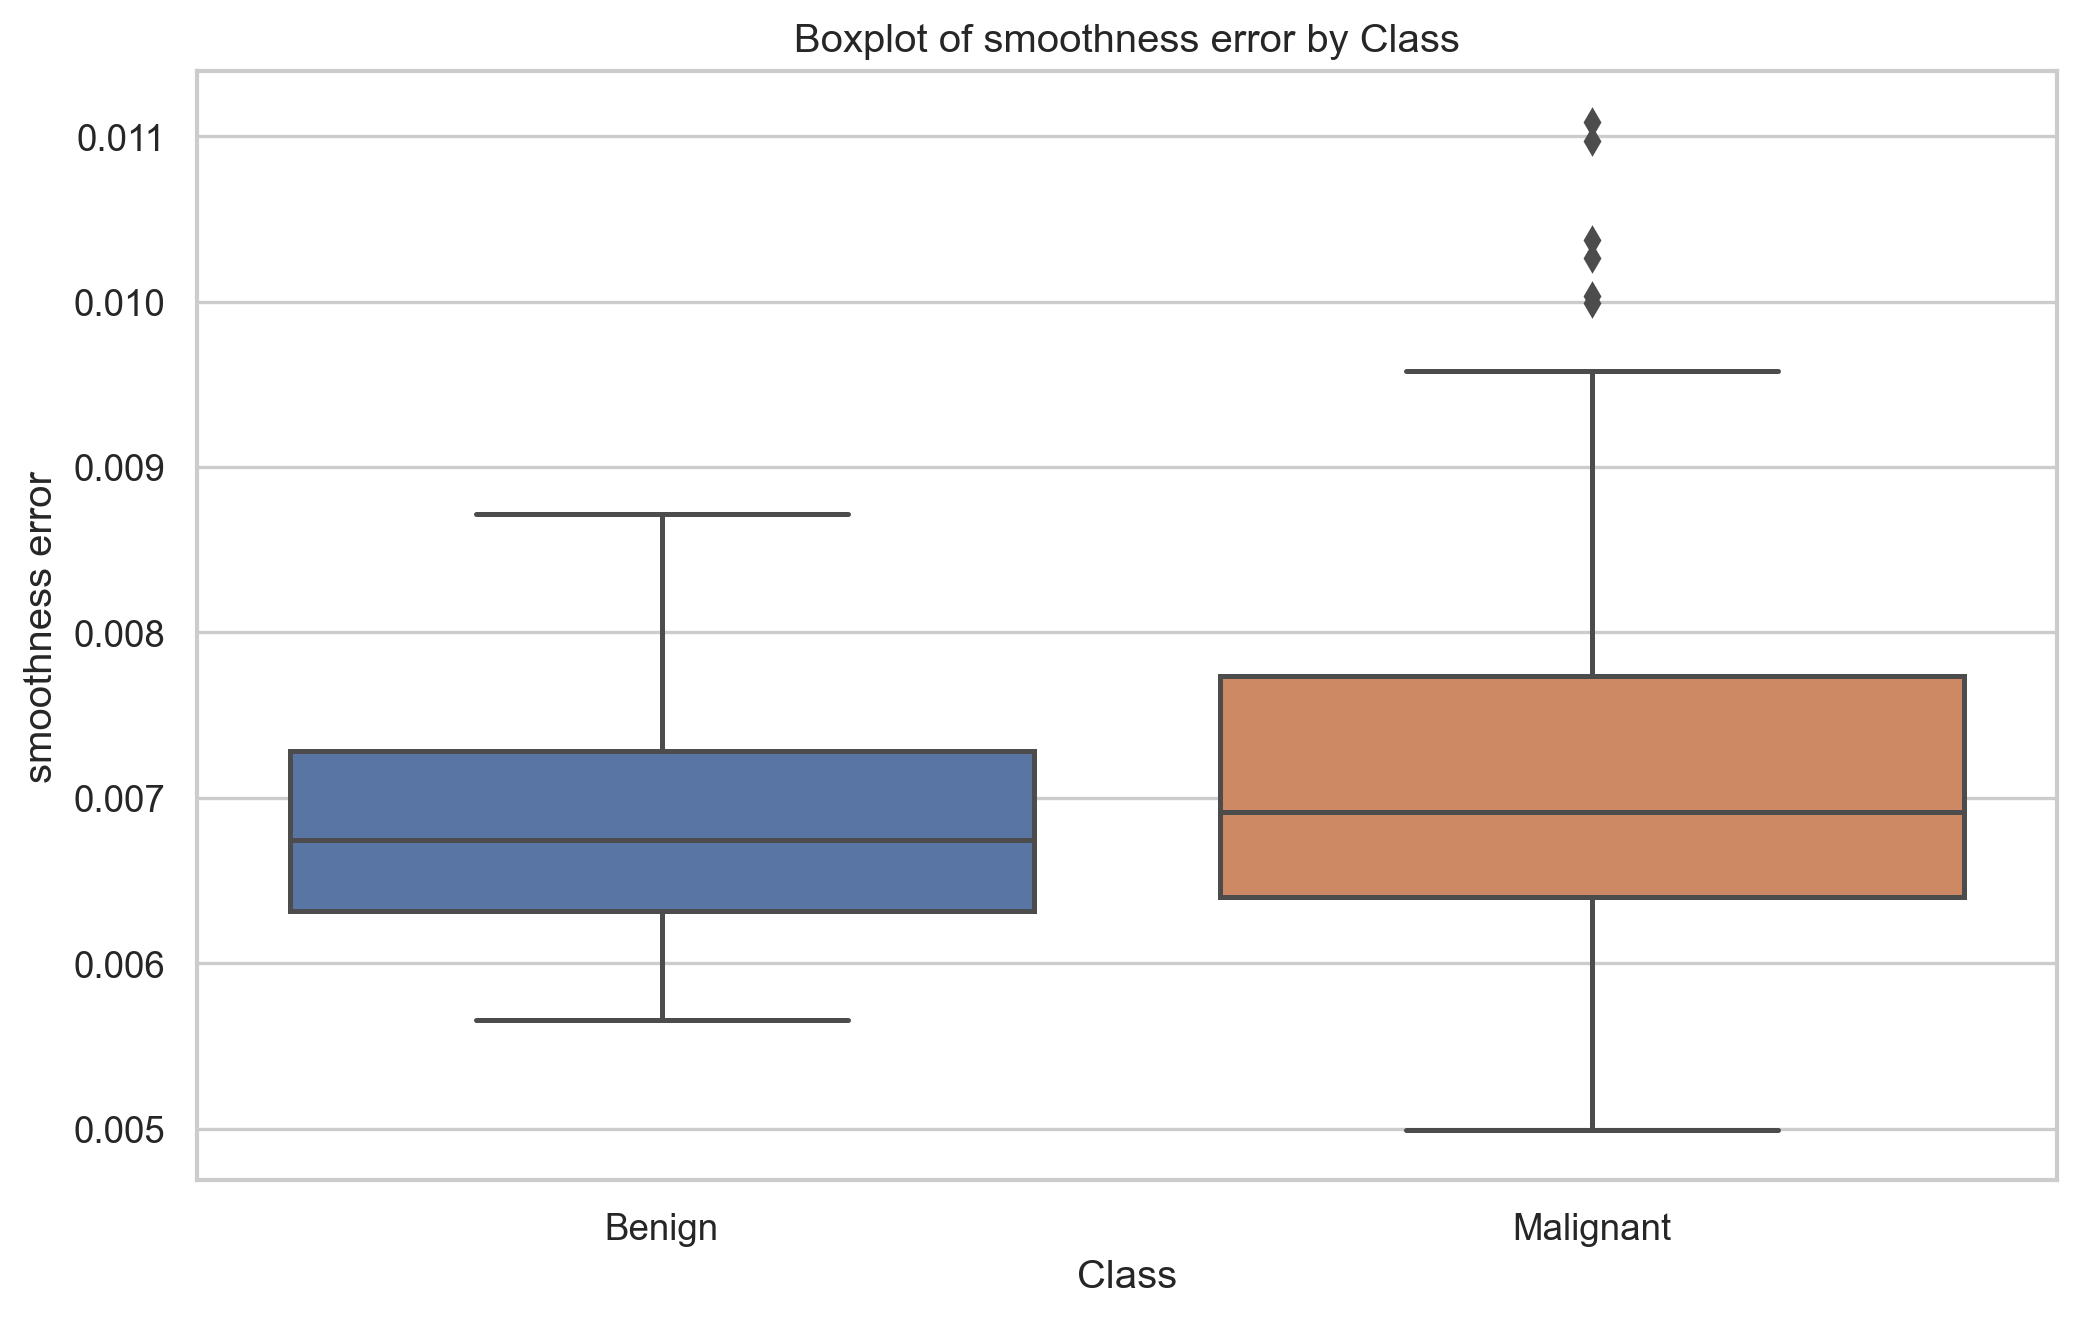

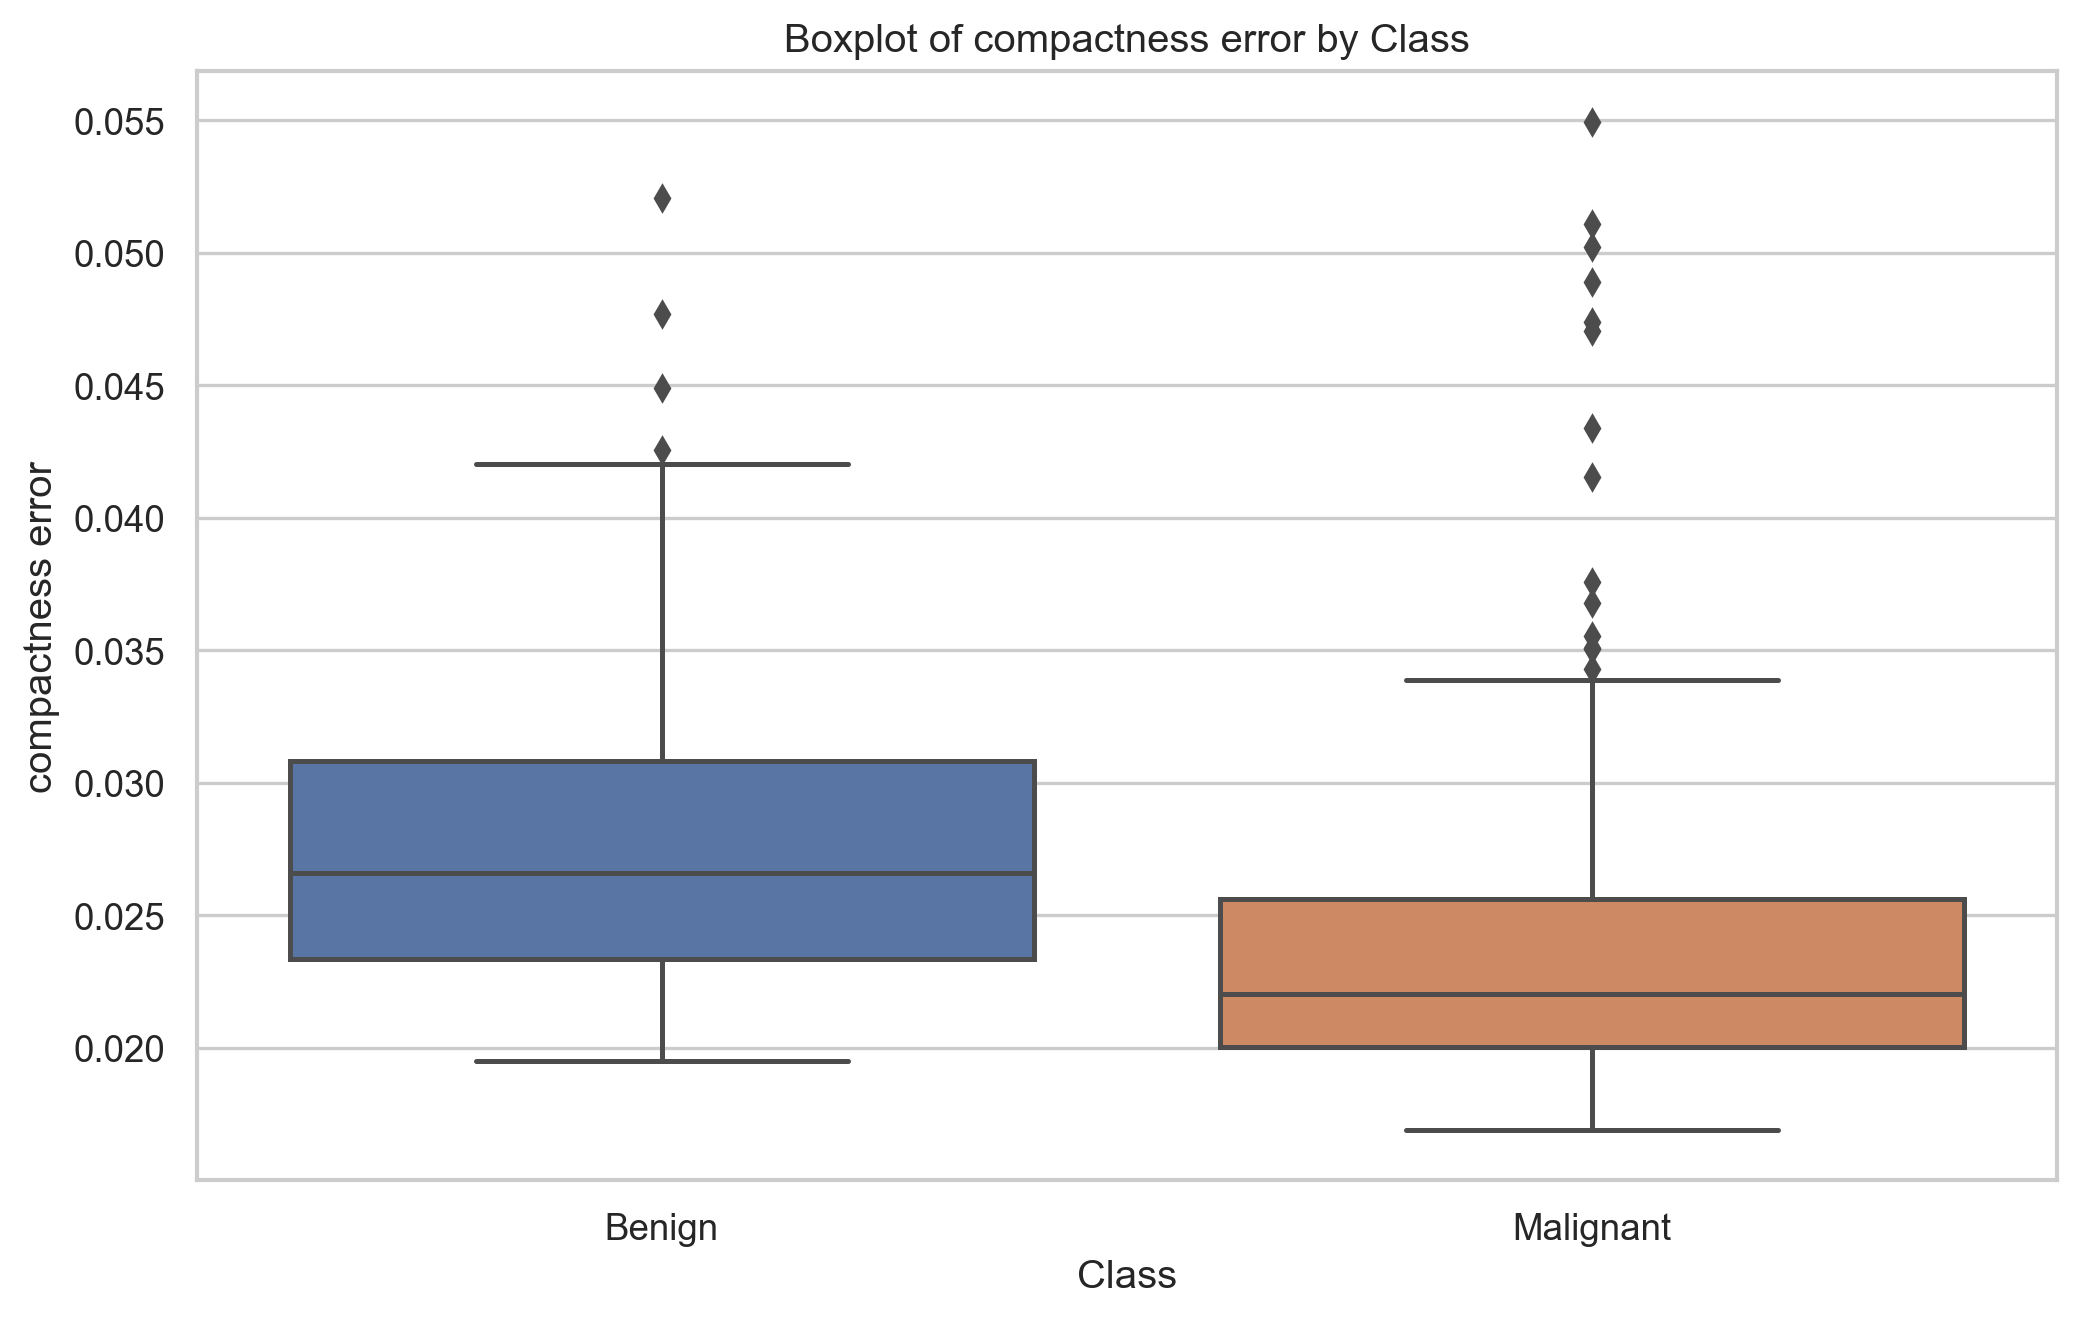

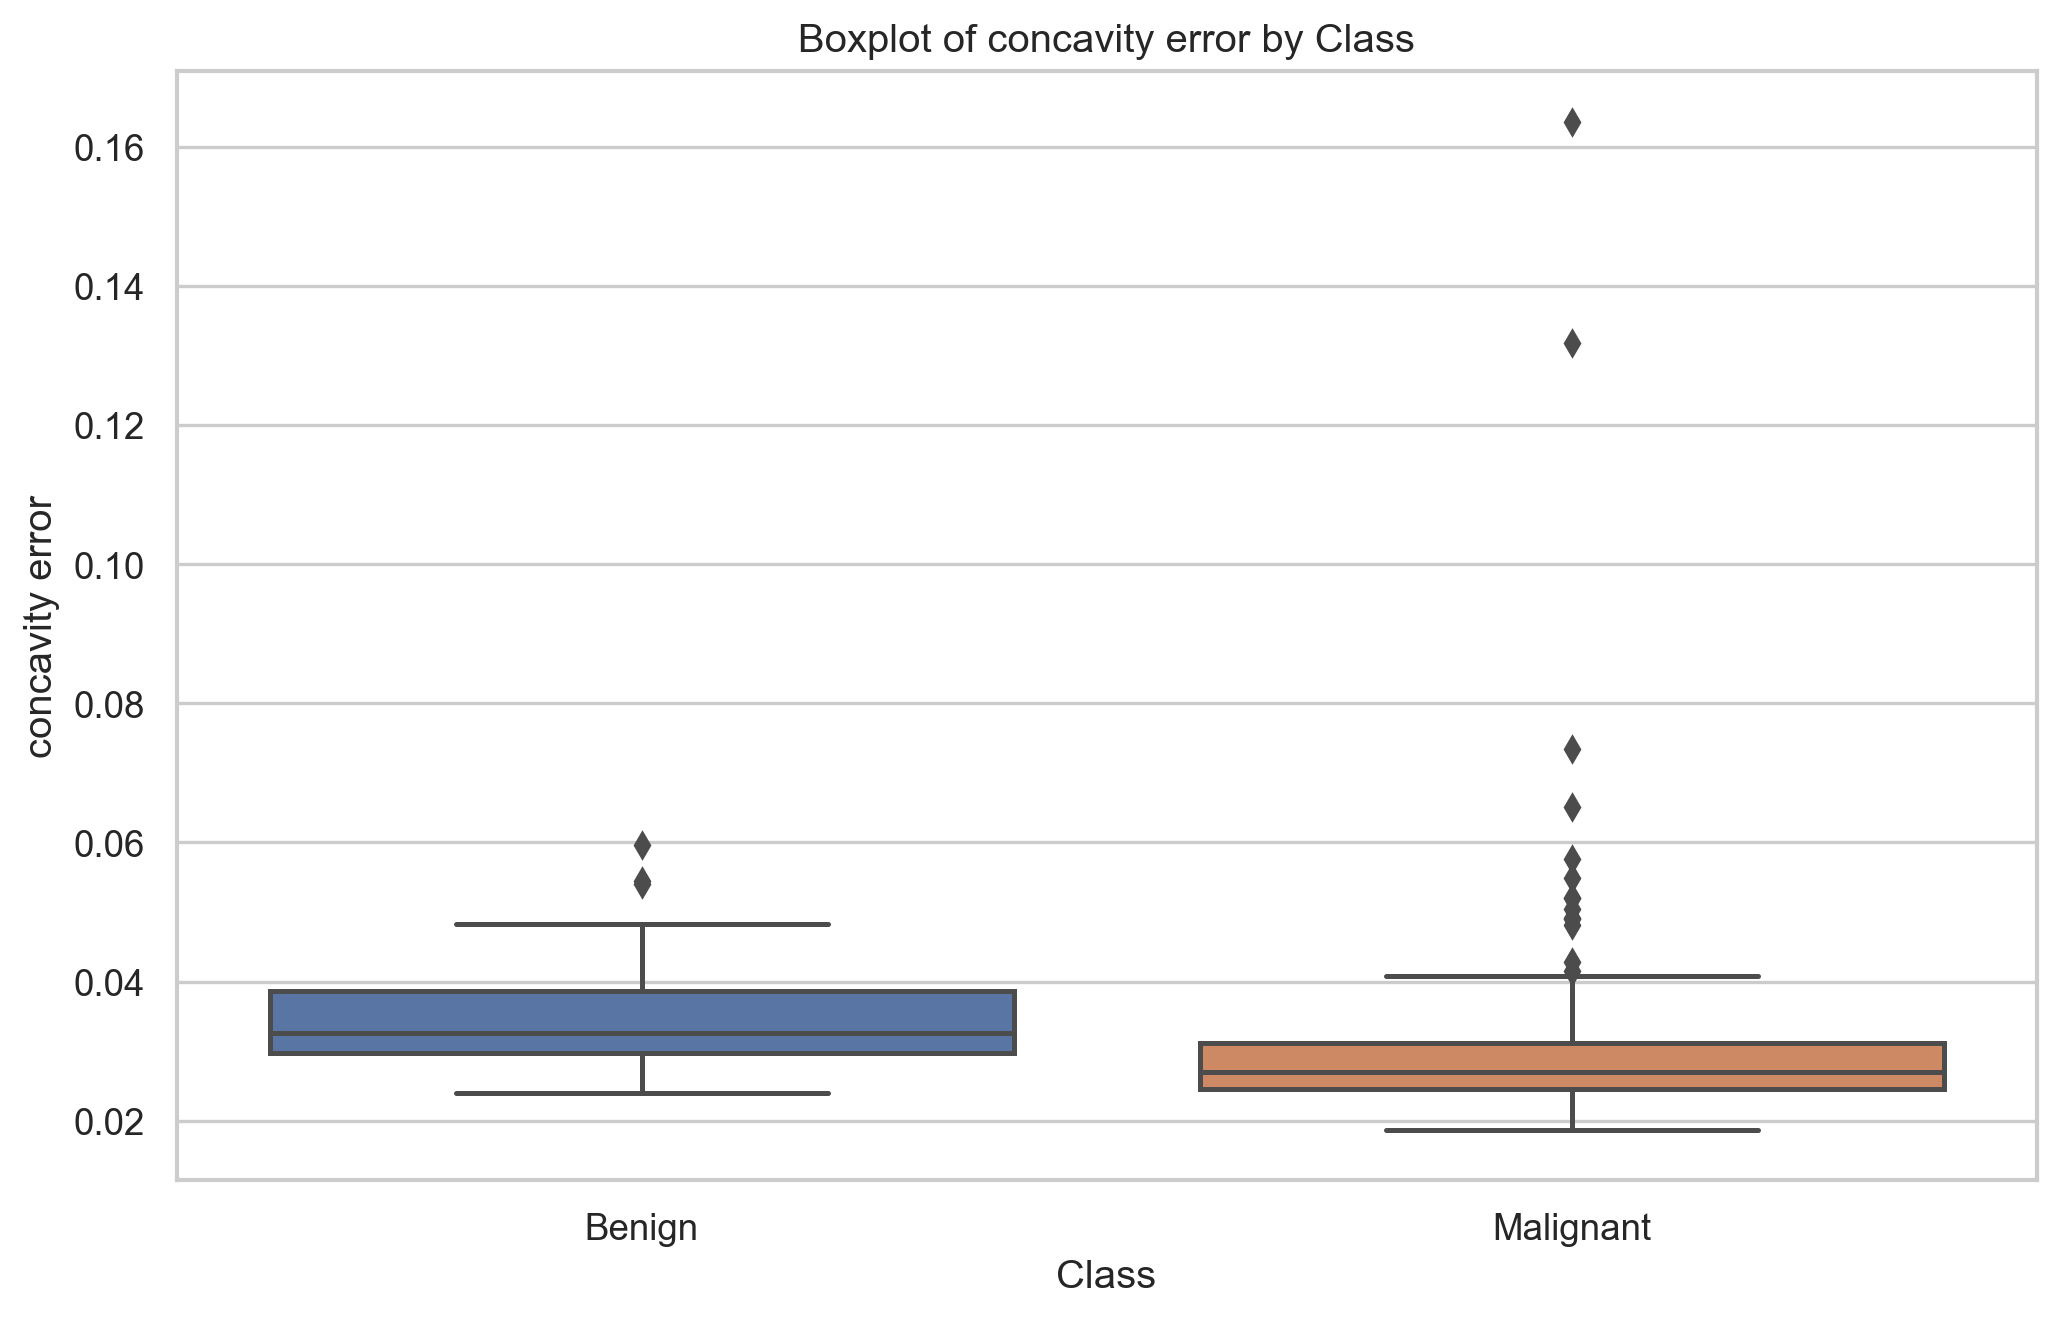

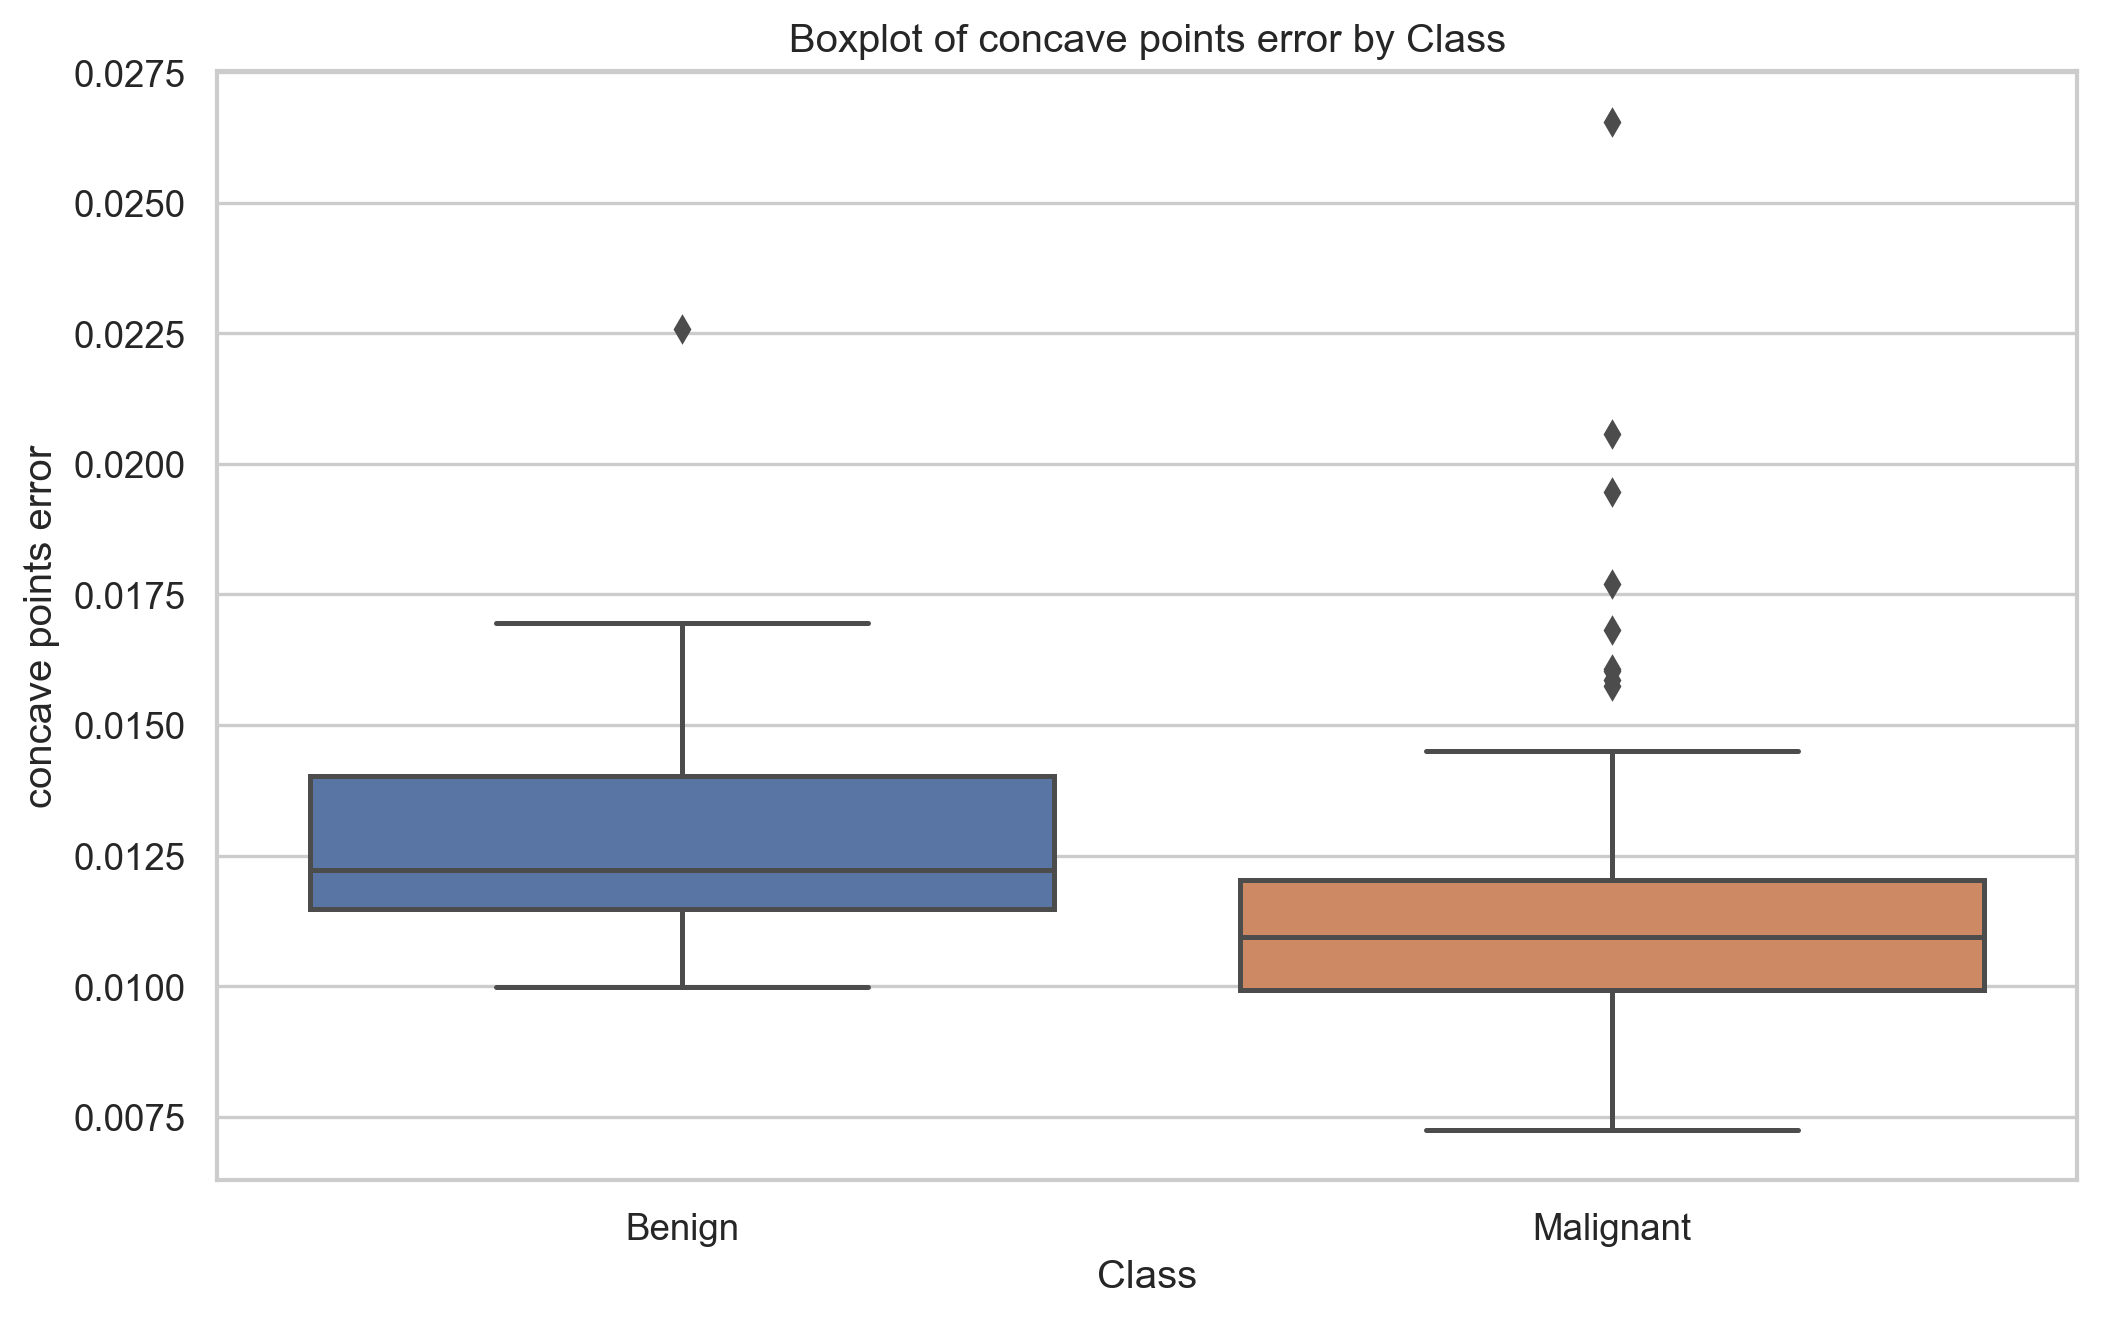

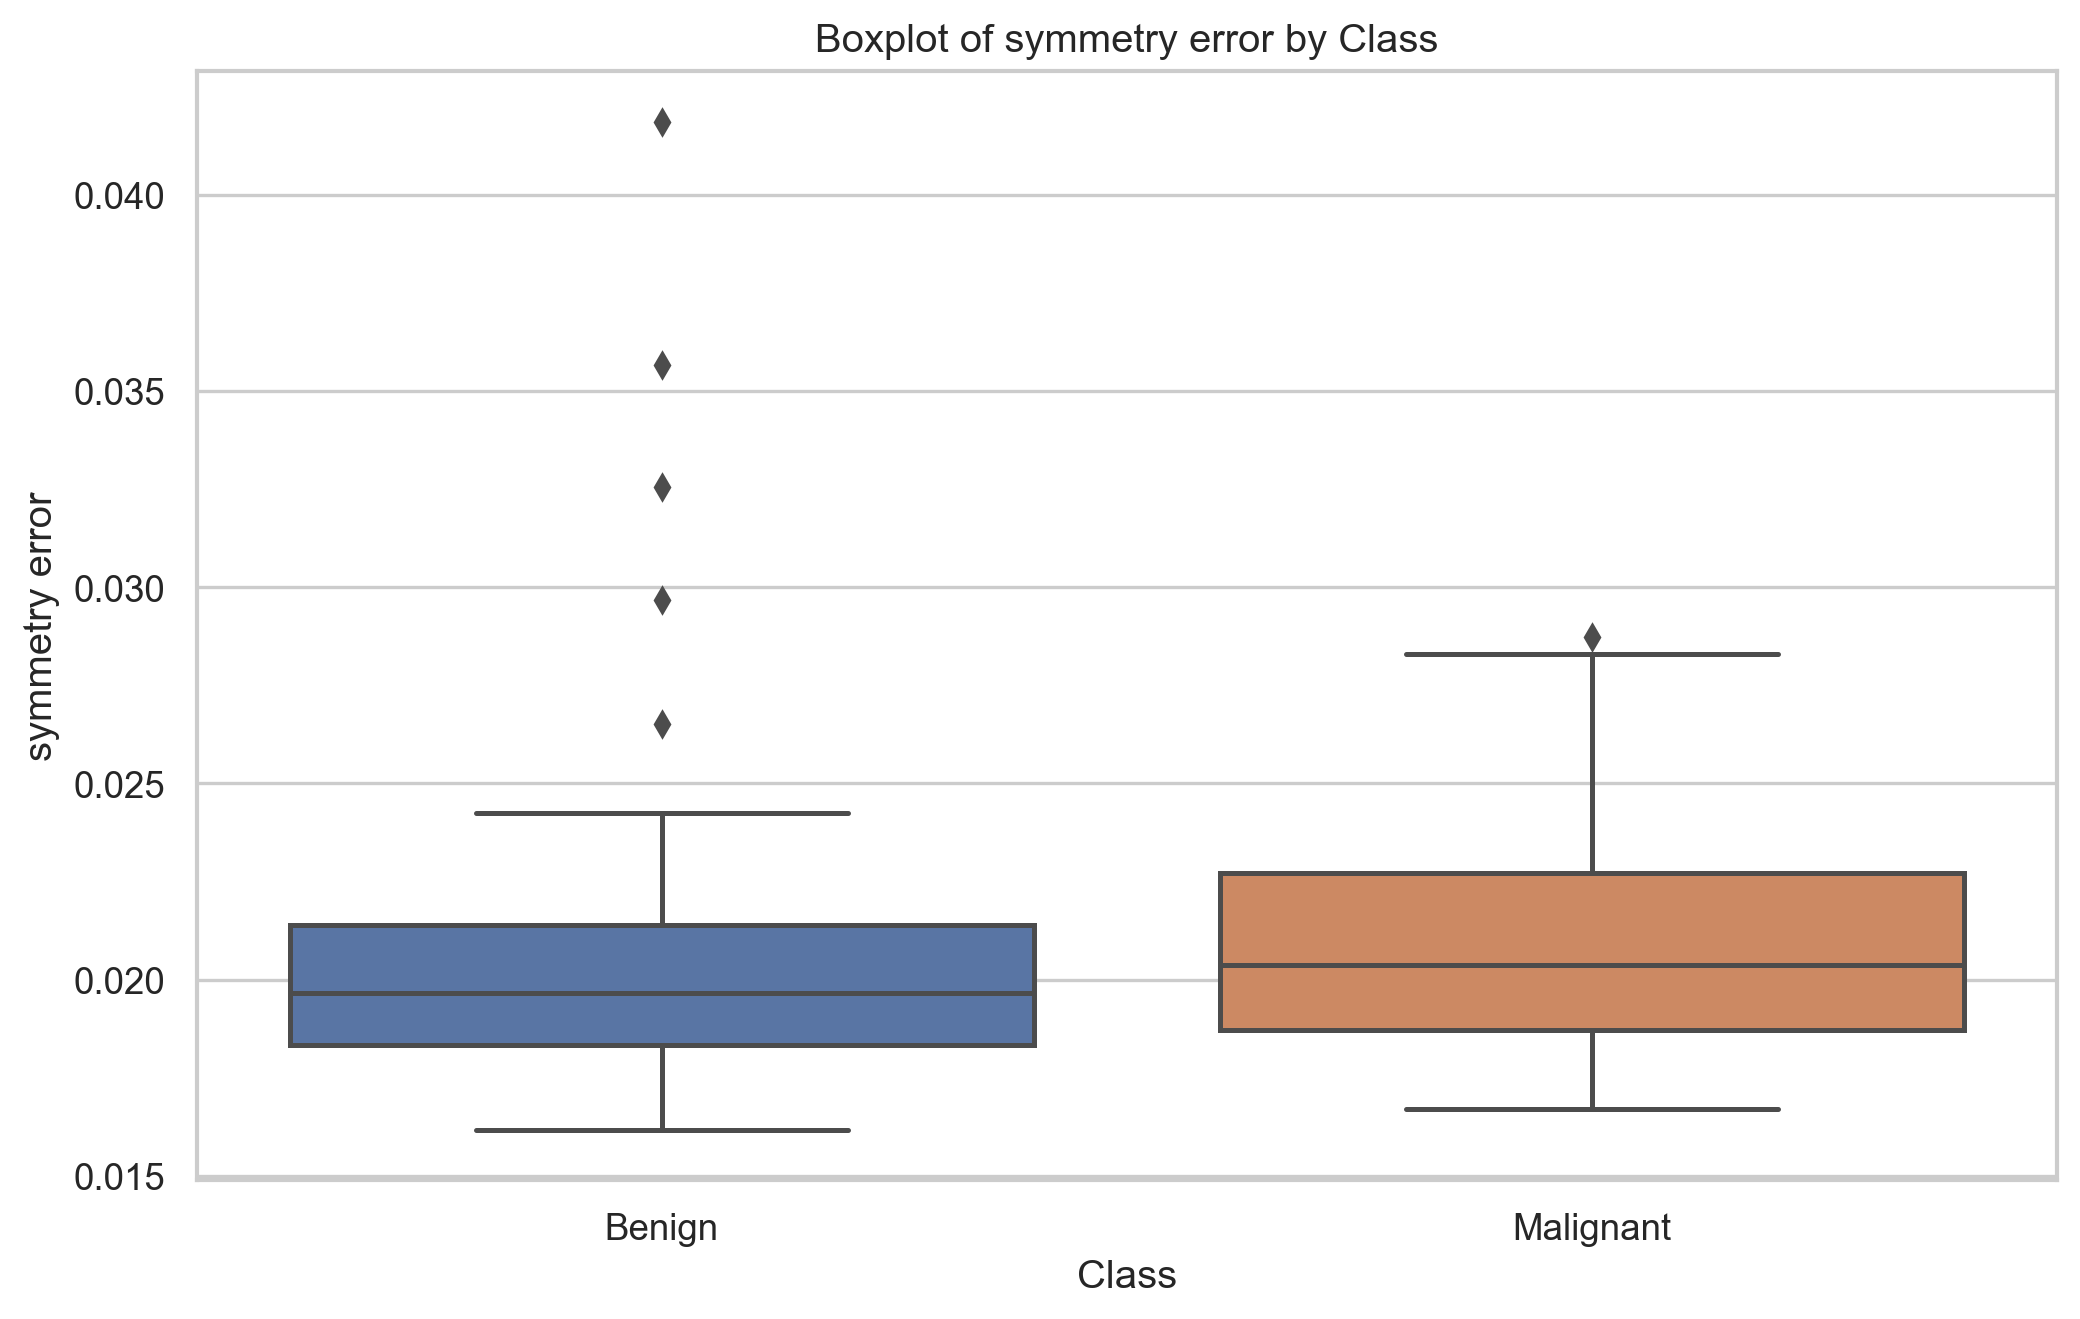

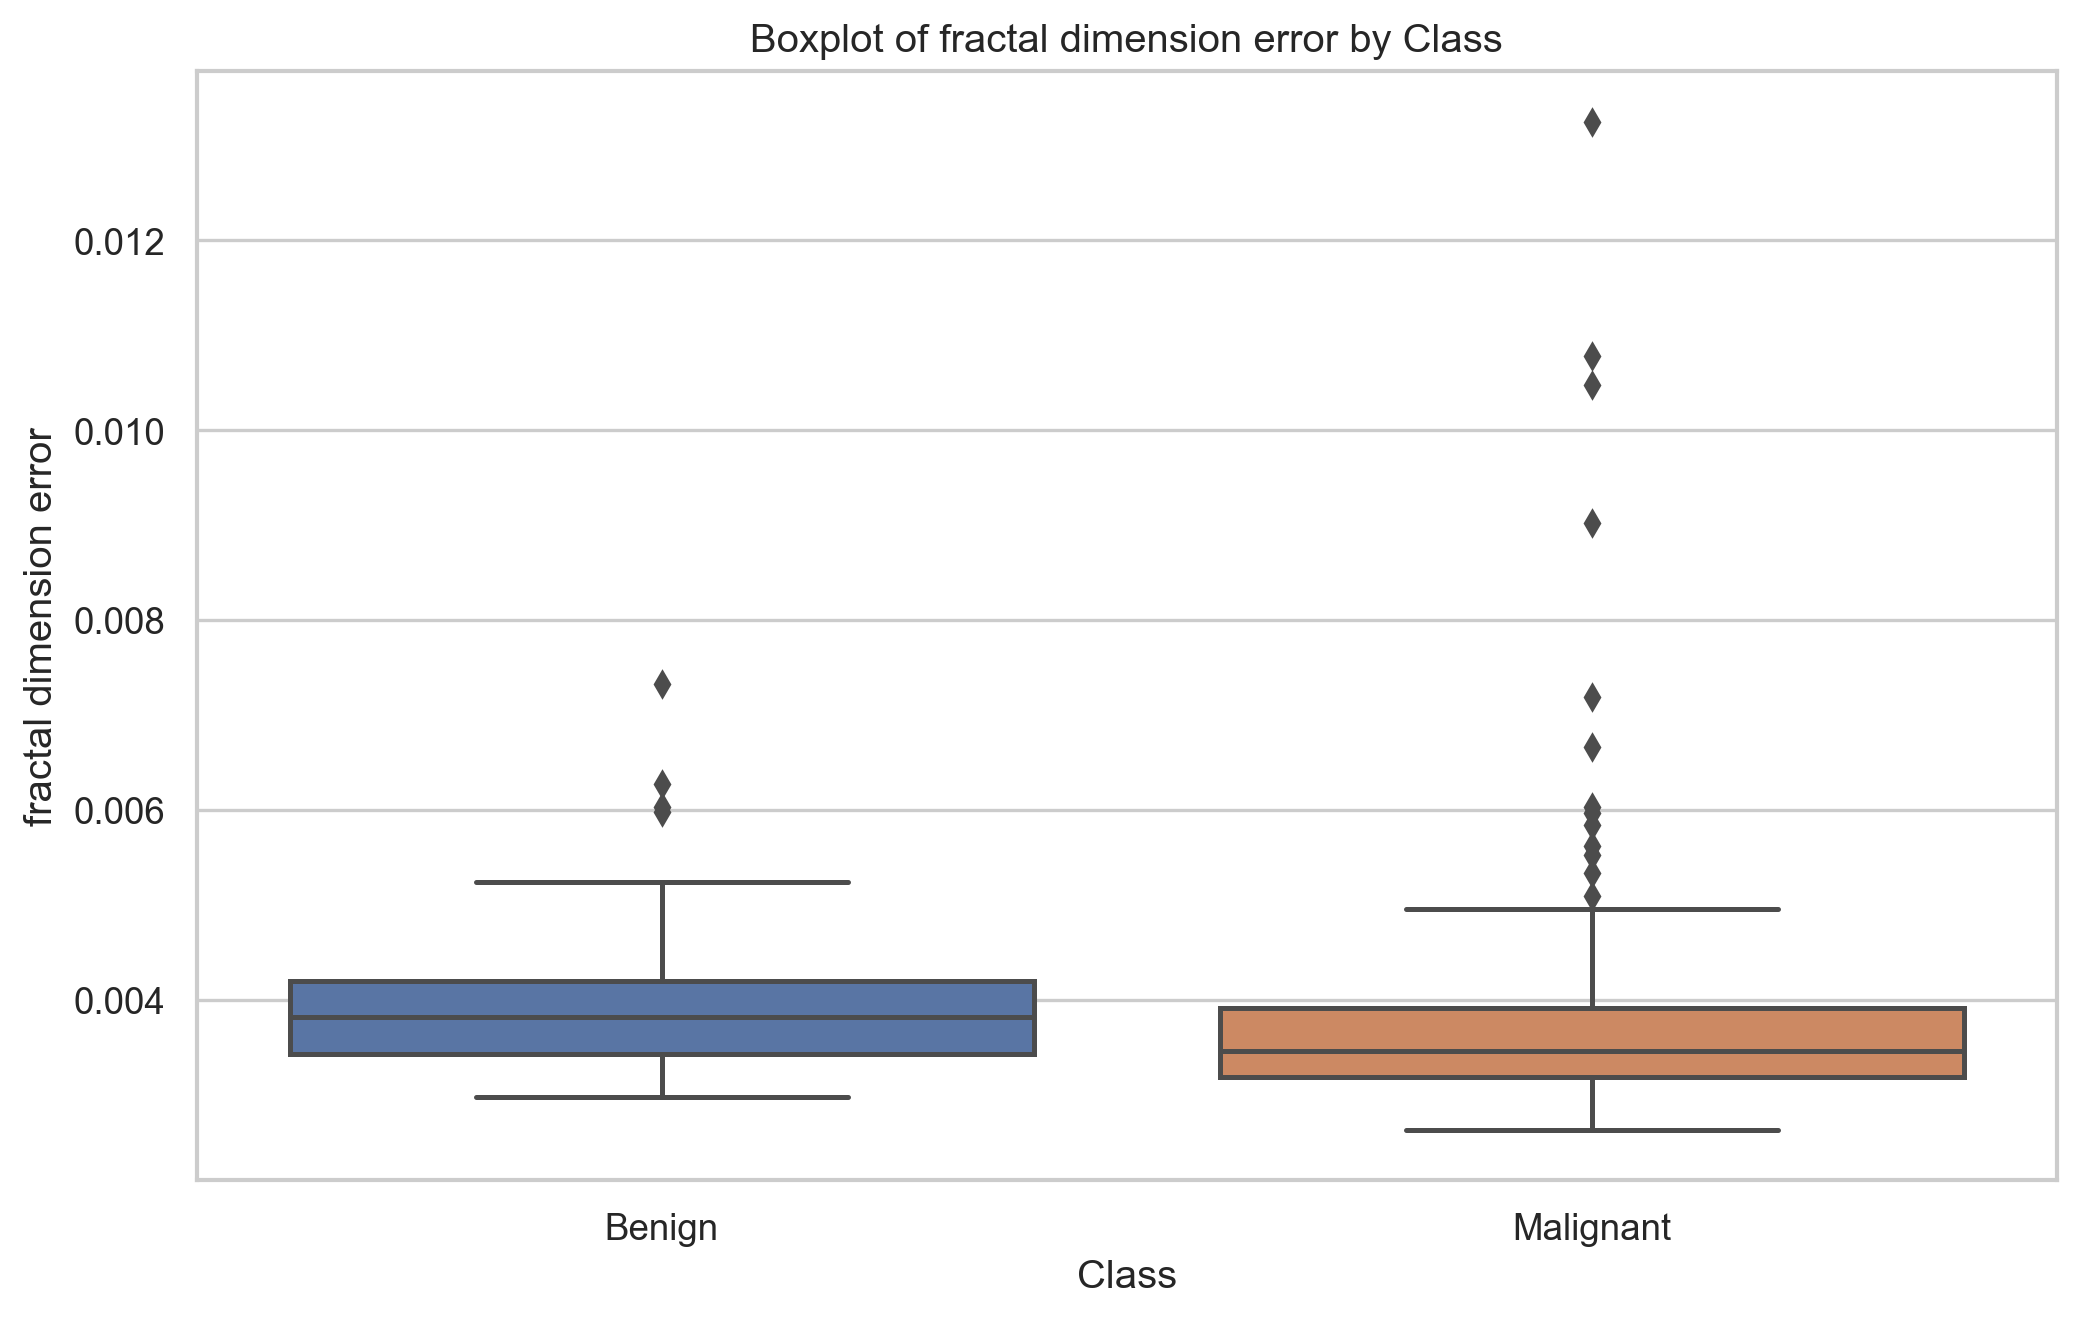

In [17]:
sns.set(style="whitegrid")
for column in df.drop(columns=['label']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=column, data=df)
    plt.title(f'Boxplot of {column} by Class')
    plt.xlabel('Class')
    plt.ylabel(column)
    plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])
    plt.show()


In [18]:
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   219.000000    220.000000      220.000000   220.000000   
mean     13.693313     18.991963       89.866240   620.956227   
std       2.176062      1.427635        7.366180   106.419871   
min     -14.292182     15.349270       74.690886    -2.645499   
25%      13.092060     17.914319       84.911981   558.731832   
50%      13.647143     18.928256       88.587737   603.806128   
75%      14.272883     19.995859       93.066393   655.690435   
max      18.200299     24.430831      121.247839  1103.740620   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       220.000000        220.000000      220.000000           220.000000   
mean          0.096480          0.102879        0.085281             0.046867   
std           0.004961          0.019819        0.026911             0.012548   
min           0.084651          0.075184        0.050771             0.028701   
25%      

 ###### As we can see from the above boxplots and statistics, A huge amount amount of Erroneous values as well as outliers in our data, We need to deal with them in order to achieve high accuracy of our models and to complete our goals. We will convert  the outliers and erroneous values into NaN values present in our data by using IQR method. Once we have done with converting process  then we will  impute them within a pipeline, same as  handling erroneous values. This approach ensures that both types of problematic data points are handled consistently. Once again I would like to highlight the difference between the erroneous values and outliers . Erroneous values can be defined as the values which are incorrect due to incorrect measurement or errors in the process of data entry . While outliers could be defined as values that are extreme and   deviate significantly from the majority of the data but are not necessarily incorrect. They can be valid observations that occur infrequently.

In [19]:
def replace_outliers_with_nan_iqr(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_outliers = df.copy()

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_outliers[col] = df_outliers[col].apply(
            lambda x: np.nan if x < lower_bound or x > upper_bound else x
        )

    return df_outliers

df = replace_outliers_with_nan_iqr(df)

In [20]:
print(df.isnull().sum())

label                       0
mean radius                12
mean texture                1
mean perimeter              9
mean area                  19
mean smoothness             1
mean compactness            7
mean concavity              6
mean concave points         5
mean symmetry              12
mean fractal dimension     10
radius error               16
texture error               6
perimeter error            10
area error                 28
smoothness error            6
compactness error          15
concavity error            16
concave points error        8
symmetry error              9
fractal dimension error    16
dtype: int64


In [21]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              208 non-null    float64
 2   mean texture             219 non-null    float64
 3   mean perimeter           211 non-null    float64
 4   mean area                201 non-null    float64
 5   mean smoothness          219 non-null    float64
 6   mean compactness         213 non-null    float64
 7   mean concavity           214 non-null    float64
 8   mean concave points      215 non-null    float64
 9   mean symmetry            208 non-null    float64
 10  mean fractal dimension   210 non-null    float64
 11  radius error             204 non-null    float64
 12  texture error            214 non-null    float64
 13  perimeter error          210 non-null    float64
 14  area error               1

###### As we can see the increase in the number of missing values and the decrease in the total entries of our features , we can say that the outliers and the erroneous values were sucesssfully converted into Nan values

## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

###### 2.1 Split data into appropriate sets using the stratify option to obtain consistent proportions of classes in each set.

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV


# Throughout this assignment, treat the malignant cases as the true positive class, following the standard convention in medicine


mapping = {'benign': 0, 'malignant': 1}
df['label'] = df['label'].map(mapping)

X = df.drop('label',axis =1)
y= df['label']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)
print(f'training samples: {X_train.shape[0]}')
print(y_train.value_counts())
print(f'validation samples: {X_val.shape[0]}')
print(y_val.value_counts())
print(f'test samples: {X_test.shape[0]}')
print(y_test.value_counts())



training samples: 132
0    92
1    40
Name: label, dtype: int64
validation samples: 44
0    31
1    13
Name: label, dtype: int64
test samples: 44
0    31
1    13
Name: label, dtype: int64


###### 2.2 Decide on appropriate pre-processing steps for the data.

In [23]:
# Now we will create the preprocessing pipeline 
from sklearn.impute import SimpleImputer
pre_process_pipeline=Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler())
])

# Now we will fit the pipeline on the training set and transform the training set 
X_train_transformed = pre_process_pipeline.fit_transform(X_train)

# Applying the transformation to the validation and test sets
X_val_transformed = pre_process_pipeline.transform(X_val)
X_test_transformed = pre_process_pipeline.transform(X_test)

# Printing shapes to verify transformations
print(f'training samples (transformed): {X_train_transformed.shape}')
print(f'validation samples (transformed): {X_val_transformed.shape}')
print(f'test samples (transformed): {X_test_transformed.shape}')

training samples (transformed): (132, 20)
validation samples (transformed): (44, 20)
test samples (transformed): (44, 20)


###### 2.3 Implement a very simple baseline model that makes purely random predictions of the class.
Measure the baseline performance with the following metrics:
accuracy

balanced accuracy: accounts for imblanaced datasets, defined as (sensitivity + specificity)/2

recall

precision

auc

f1score

fbeta_scores with beta=0.1

fbeta_score with beta=10

Also display a confusion matrix for the baseline predictions.

Making a random prediction for each sample with equal probability for each class
Accuracy: 0.4772727272727273
Balanced accuracy: 0.47270471464019853
Recall: 0.46153846153846156
Precision: 0.2727272727272727
AUC: 0.4727047146401986
F1 score: 0.3428571428571428
Fbeta score with beta=0.1: 0.27383642114776324
Fbeta score with beta=10: 0.4583963691376703


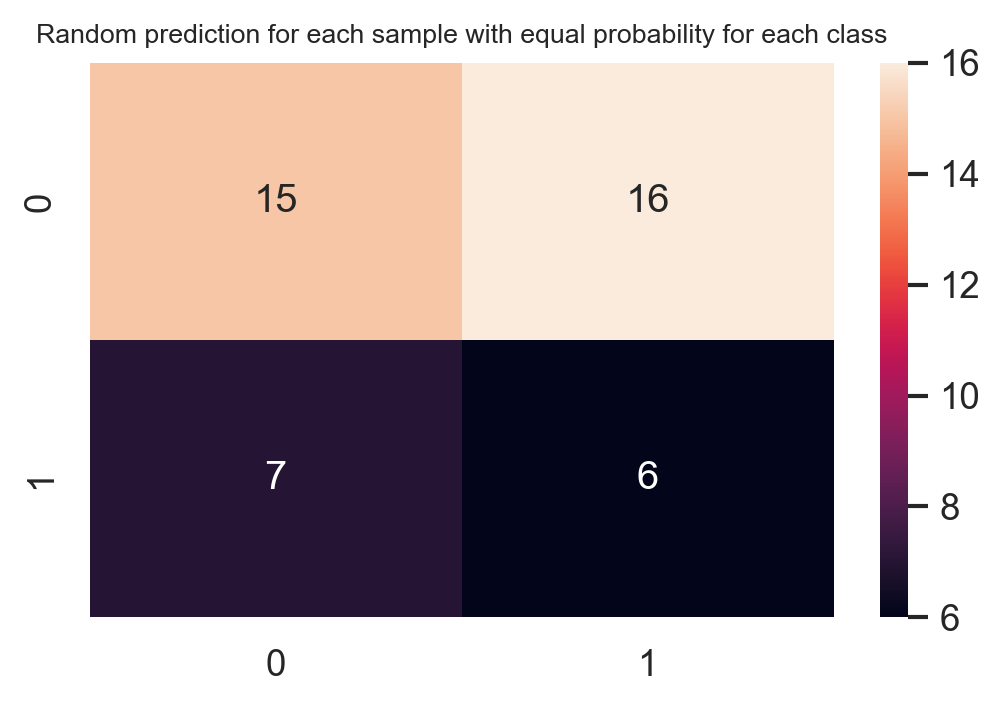

In [24]:
# Some helpful code that you can use if you wish (or not)
from sklearn.metrics import accuracy_score,  make_scorer, balanced_accuracy_score, recall_score, precision_score, roc_auc_score, f1_score, fbeta_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
#  Encode the labels to numeric values for all sets
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)


f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

np.random.seed(42)
y_pred_random = np.random.choice([0, 1], size=y_test_encoded.shape[0])
print("Making a random prediction for each sample with equal probability for each class")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_random))
print("Balanced accuracy:", balanced_accuracy_score(y_test_encoded, y_pred_random))
print("Recall:", recall_score(y_test_encoded, y_pred_random, pos_label=1))
print("Precision:", precision_score(y_test_encoded, y_pred_random, pos_label=1, zero_division=1))
print("AUC:", roc_auc_score(y_test_encoded, y_pred_random))
print("F1 score:", f1_score(y_test_encoded, y_pred_random, pos_label=1))
print("Fbeta score with beta=0.1:", f01_score(y_test_encoded, y_pred_random))
print("Fbeta score with beta=10:", f10_score(y_test_encoded, y_pred_random))

cmat_random = confusion_matrix(y_test_encoded, y_pred_random)
plt.figure(figsize=(5, 3))
plt.title('Random prediction for each sample with equal probability for each class', fontsize=8)
sns.heatmap(cmat_random, annot=True, fmt='d')
plt.show()

###### 2.4 As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

SGD Classifier Performance
Accuracy: 0.9090909090909091
Balanced accuracy: 0.8684863523573201
Recall: 0.7692307692307693
Precision: 0.9090909090909091
AUC: 0.8684863523573201
F1 score: 0.8333333333333333
Fbeta score with beta=0.1: 0.9074573225516622
Fbeta score with beta=10: 0.7704042715484363


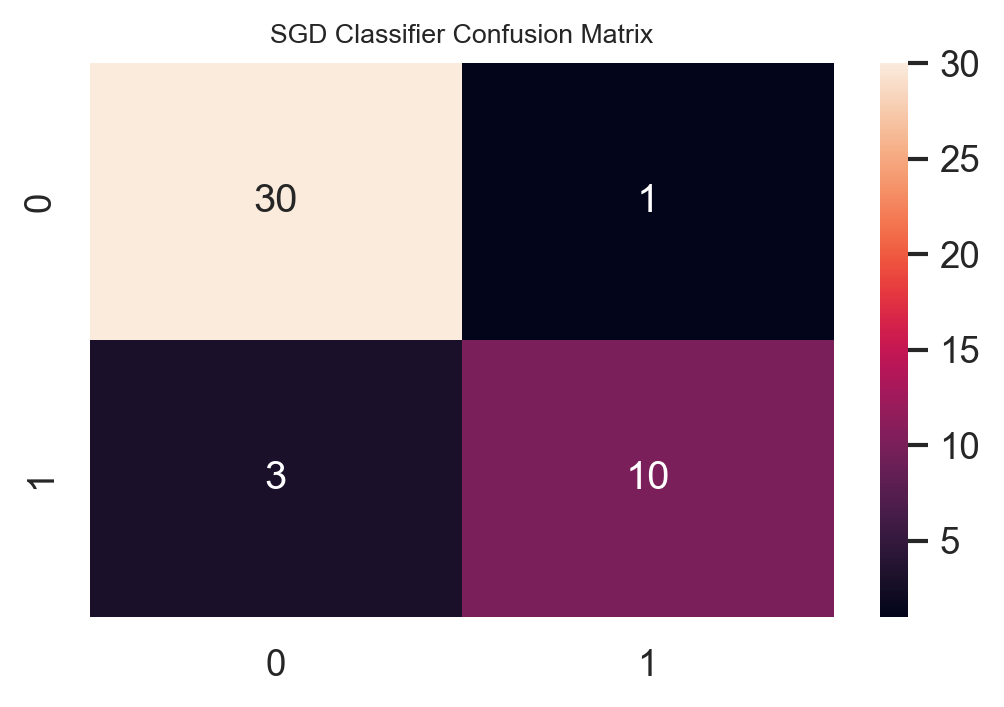

In [25]:
# Your code here
from sklearn.linear_model import SGDClassifier

# Initialize the SGD classifier
sgd_clf = SGDClassifier(random_state=42)

# Train the classifier
sgd_clf.fit(X_train_transformed, y_train_encoded)

# Make predictions on the test set
y_pred_sgd = sgd_clf.predict(X_test_transformed)

# Evaluate the performance
print("SGD Classifier Performance")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_sgd))
print("Balanced accuracy:", balanced_accuracy_score(y_test_encoded, y_pred_sgd))
print("Recall:", recall_score(y_test_encoded, y_pred_sgd, pos_label=1))
print("Precision:", precision_score(y_test_encoded, y_pred_sgd, pos_label=1, zero_division=1))
print("AUC:", roc_auc_score(y_test_encoded, y_pred_sgd))
print("F1 score:", f1_score(y_test_encoded, y_pred_sgd, pos_label=1))
print("Fbeta score with beta=0.1:", f01_score(y_test_encoded, y_pred_sgd))
print("Fbeta score with beta=10:", f10_score(y_test_encoded, y_pred_sgd))

# Display the confusion matrix
cmat_sgd = confusion_matrix(y_test_encoded, y_pred_sgd)
plt.figure(figsize=(5, 3))
plt.title('SGD Classifier Confusion Matrix', fontsize=8)
sns.heatmap(cmat_sgd, annot=True, fmt='d')
plt.show()


## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

###### After carefull analysis I choose the f1 score as the performance metric. Since F1 score balances out precision and recall,which is usefull for datasets with imbalanced classes, in our case it is benign and malignant cancer predictions. It makes sure false positives and false negatives are considered equally  

### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

###### to perform best hyper-parameter optimization on three models , we will use GridSearchCV to find the best hyper - parameters for each model . After finding the best parameters , we'll train the models, evaluate their performance, and display the results, including confusion matrices. Talking about the third model , we will go with the random forest model. This is simply beacuse we know thatr , Random Forest can handle imbalanced datasets very well. Random Forest really emphasizes on feature selection. Last but not the least Random Forest develops multiple decision trees resulting the prevention of risk of overfitting.

In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
models = {
    'SGD': SGDClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42)
}

params = {
    'SGD': {
        'loss': ['hinge', 'log', 'modified_huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-3, 1e-4, 1e-5]
    },
    'SVM': {
        'C': [0.1, 1, 10,100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
}

In [27]:
best_estimators = {}
for model_name in models:
    grid_search = GridSearchCV(models[model_name], params[model_name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_transformed, y_train_encoded)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

C:\Users\Aditya Venugopalan\anaconda3\New folder\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Best parameters for SGD: {'alpha': 0.0001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet', 'tol': 1e-05}
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best parameters for RandomForest: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


C:\Users\Aditya Venugopalan\anaconda3\New folder\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Evaluating SGD...
Accuracy: 0.8863636363636364
Balanced accuracy: 0.8300248138957816
Recall: 0.6923076923076923
Precision: 0.9
AUC: 0.8300248138957818
F1 score: 0.7826086956521738
Fbeta score with beta=0.1: 0.897334649555775
Fbeta score with beta=10: 0.6938931297709924


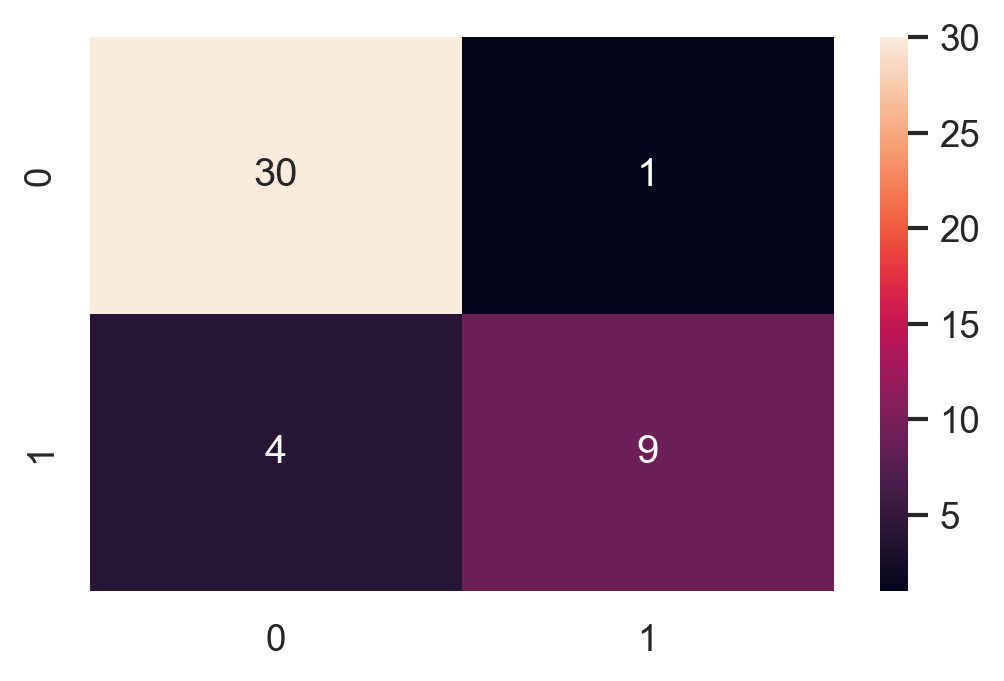

Evaluating SVM...
Accuracy: 0.8409090909090909
Balanced accuracy: 0.7754342431761787
Recall: 0.6153846153846154
Precision: 0.8
AUC: 0.7754342431761787
F1 score: 0.6956521739130435
Fbeta score with beta=0.1: 0.7976307996051334
Fbeta score with beta=10: 0.6167938931297711


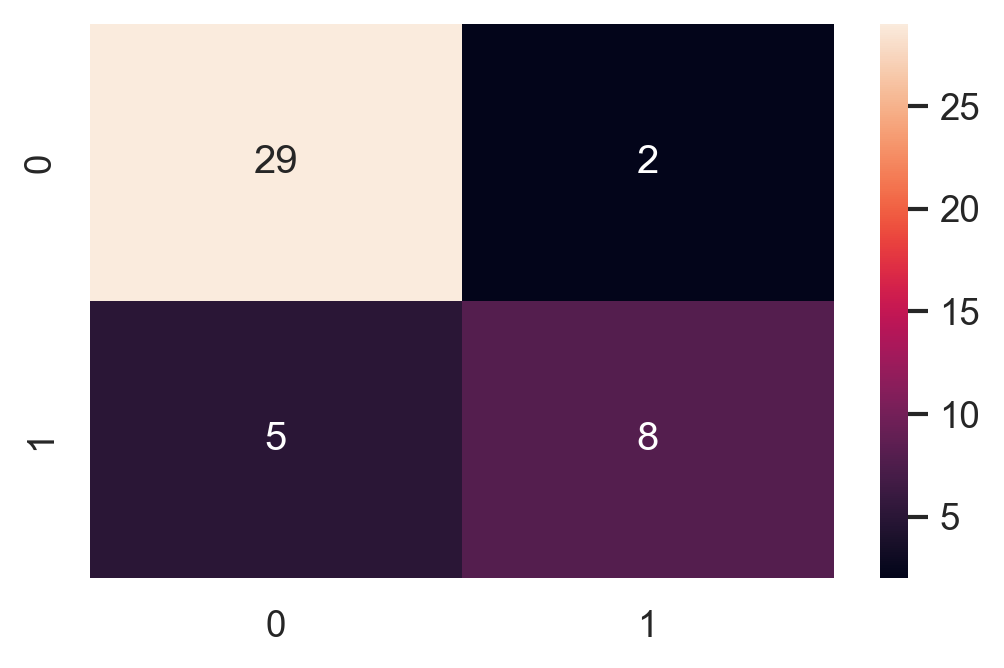

Evaluating RandomForest...
Accuracy: 0.9318181818181818
Balanced accuracy: 0.8846153846153846
Recall: 0.7692307692307693
Precision: 1.0
AUC: 0.8846153846153846
F1 score: 0.8695652173913044
Fbeta score with beta=0.1: 0.9970384995064165
Fbeta score with beta=10: 0.7709923664122137


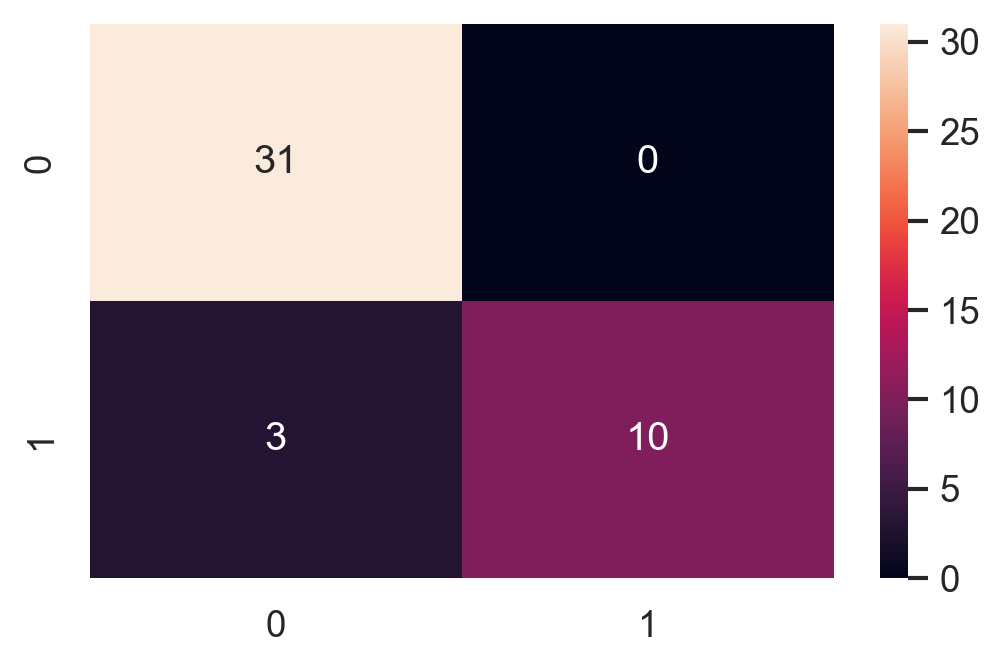

The best model is RandomForest with an F1 score of 0.8695652173913044


In [28]:
from sklearn.metrics import fbeta_score

def f10_score(yt, yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt, yp):
    return fbeta_score(yt, yp, beta=0.1)

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Balanced accuracy: {balanced_accuracy_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred, pos_label=1)}")
    print(f"Precision: {precision_score(y_test, y_pred, pos_label=1, zero_division=1)}")
    print(f"AUC: {roc_auc_score(y_test, y_pred)}")
    print(f"F1 score: {f1_score(y_test, y_pred, pos_label=1)}")
    print(f"Fbeta score with beta=0.1: {f01_score(y_test, y_pred)}")
    print(f"Fbeta score with beta=10: {f10_score(y_test, y_pred)}")
    cmat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cmat, annot=True, fmt='d')
    plt.show()
    return f1_score(y_test, y_pred, pos_label=1)

best_f1 = 0
best_model_name = None
for model_name in best_estimators:
    print(f"Evaluating {model_name}...")
    f1 = evaluate_model(best_estimators[model_name], X_test_transformed, y_test_encoded)
    if f1 > best_f1:
        best_f1 = f1
        best_model_name = model_name

print(f"The best model is {best_model_name} with an F1 score of {best_f1}")


In [29]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score, fbeta_score, roc_auc_score
import numpy as np

# Best SGD Classifier
best_sgd_clf = best_estimators['SGD']
sgd_predictions = best_sgd_clf.predict(X_test_transformed)
sgd_accuracy = accuracy_score(y_test_encoded, sgd_predictions)
sgd_balanced_accuracy = balanced_accuracy_score(y_test_encoded, sgd_predictions)
sgd_recall = recall_score(y_test_encoded, sgd_predictions, pos_label=1)
sgd_precision = precision_score(y_test_encoded, sgd_predictions, pos_label=1, zero_division=1)
sgd_f1 = f1_score(y_test_encoded, sgd_predictions, pos_label=1)
sgd_fbeta_0_1 = fbeta_score(y_test_encoded, sgd_predictions, beta=0.1, pos_label=1)
sgd_fbeta_10 = fbeta_score(y_test_encoded, sgd_predictions, beta=10, pos_label=1)
sgd_auc = roc_auc_score(y_test_encoded, sgd_predictions)

# Best SVM
best_svm_clf = best_estimators['SVM']
svm_predictions = best_svm_clf.predict(X_test_transformed)
svm_accuracy = accuracy_score(y_test_encoded, svm_predictions)
svm_balanced_accuracy = balanced_accuracy_score(y_test_encoded, svm_predictions)
svm_recall = recall_score(y_test_encoded, svm_predictions, pos_label=1)
svm_precision = precision_score(y_test_encoded, svm_predictions, pos_label=1, zero_division=1)
svm_f1 = f1_score(y_test_encoded, svm_predictions, pos_label=1)
svm_fbeta_0_1 = fbeta_score(y_test_encoded, svm_predictions, beta=0.1, pos_label=1)
svm_fbeta_10 = fbeta_score(y_test_encoded, svm_predictions, beta=10, pos_label=1)
svm_auc = roc_auc_score(y_test_encoded, svm_predictions)

# Best Random Forest
best_rf_clf = best_estimators['RandomForest']
rf_predictions = best_rf_clf.predict(X_test_transformed)
rf_accuracy = accuracy_score(y_test_encoded, rf_predictions)
rf_balanced_accuracy = balanced_accuracy_score(y_test_encoded, rf_predictions)
rf_recall = recall_score(y_test_encoded, rf_predictions, pos_label=1)
rf_precision = precision_score(y_test_encoded, rf_predictions, pos_label=1, zero_division=1)
rf_f1 = f1_score(y_test_encoded, rf_predictions, pos_label=1)
rf_fbeta_0_1 = fbeta_score(y_test_encoded, rf_predictions, beta=0.1, pos_label=1)
rf_fbeta_10 = fbeta_score(y_test_encoded, rf_predictions, beta=10, pos_label=1)
rf_auc = roc_auc_score(y_test_encoded, rf_predictions)

# Printing the evaluation metrics for each model
print("Best SGD Classifier Metrics\n")
print(f'Best SGD Classifier Accuracy: {sgd_accuracy}')
print(f'Best SGD Classifier Balanced Accuracy: {sgd_balanced_accuracy}')
print(f'Best SGD Classifier Recall: {sgd_recall}')
print(f'Best SGD Classifier Precision: {sgd_precision}')
print(f'Best SGD Classifier F1 Score: {sgd_f1}')
print(f'Best SGD Classifier F-beta Score (beta=0.1): {sgd_fbeta_0_1}')
print(f'Best SGD Classifier F-beta Score (beta=10): {sgd_fbeta_10}')
print(f'Best SGD Classifier AUC: {sgd_auc}\n')

print("Best SVM Classifier Metrics\n")
print(f'Best SVM Accuracy: {svm_accuracy}')
print(f'Best SVM Balanced Accuracy: {svm_balanced_accuracy}')
print(f'Best SVM Recall: {svm_recall}')
print(f'Best SVM Precision: {svm_precision}')
print(f'Best SVM F1 Score: {svm_f1}')
print(f'Best SVM F-beta Score (beta=0.1): {svm_fbeta_0_1}')
print(f'Best SVM F-beta Score (beta=10): {svm_fbeta_10}')
print(f'Best SVM AUC: {svm_auc}\n')

print("Best Random Forest Classifier Metrics\n")
print(f'Best Random Forest Accuracy: {rf_accuracy}')
print(f'Best Random Forest Balanced Accuracy: {rf_balanced_accuracy}')
print(f'Best Random Forest Recall: {rf_recall}')
print(f'Best Random Forest Precision: {rf_precision}')
print(f'Best Random Forest F1 Score: {rf_f1}')
print(f'Best Random Forest F-beta Score (beta=0.1): {rf_fbeta_0_1}')
print(f'Best Random Forest F-beta Score (beta=10): {rf_fbeta_10}')
print(f'Best Random Forest AUC: {rf_auc}')


Best SGD Classifier Metrics

Best SGD Classifier Accuracy: 0.8863636363636364
Best SGD Classifier Balanced Accuracy: 0.8300248138957816
Best SGD Classifier Recall: 0.6923076923076923
Best SGD Classifier Precision: 0.9
Best SGD Classifier F1 Score: 0.7826086956521738
Best SGD Classifier F-beta Score (beta=0.1): 0.897334649555775
Best SGD Classifier F-beta Score (beta=10): 0.6938931297709924
Best SGD Classifier AUC: 0.8300248138957818

Best SVM Classifier Metrics

Best SVM Accuracy: 0.8409090909090909
Best SVM Balanced Accuracy: 0.7754342431761787
Best SVM Recall: 0.6153846153846154
Best SVM Precision: 0.8
Best SVM F1 Score: 0.6956521739130435
Best SVM F-beta Score (beta=0.1): 0.7976307996051334
Best SVM F-beta Score (beta=10): 0.6167938931297711
Best SVM AUC: 0.7754342431761787

Best Random Forest Classifier Metrics

Best Random Forest Accuracy: 0.9318181818181818
Best Random Forest Balanced Accuracy: 0.8846153846153846
Best Random Forest Recall: 0.7692307692307693
Best Random Forest Pr

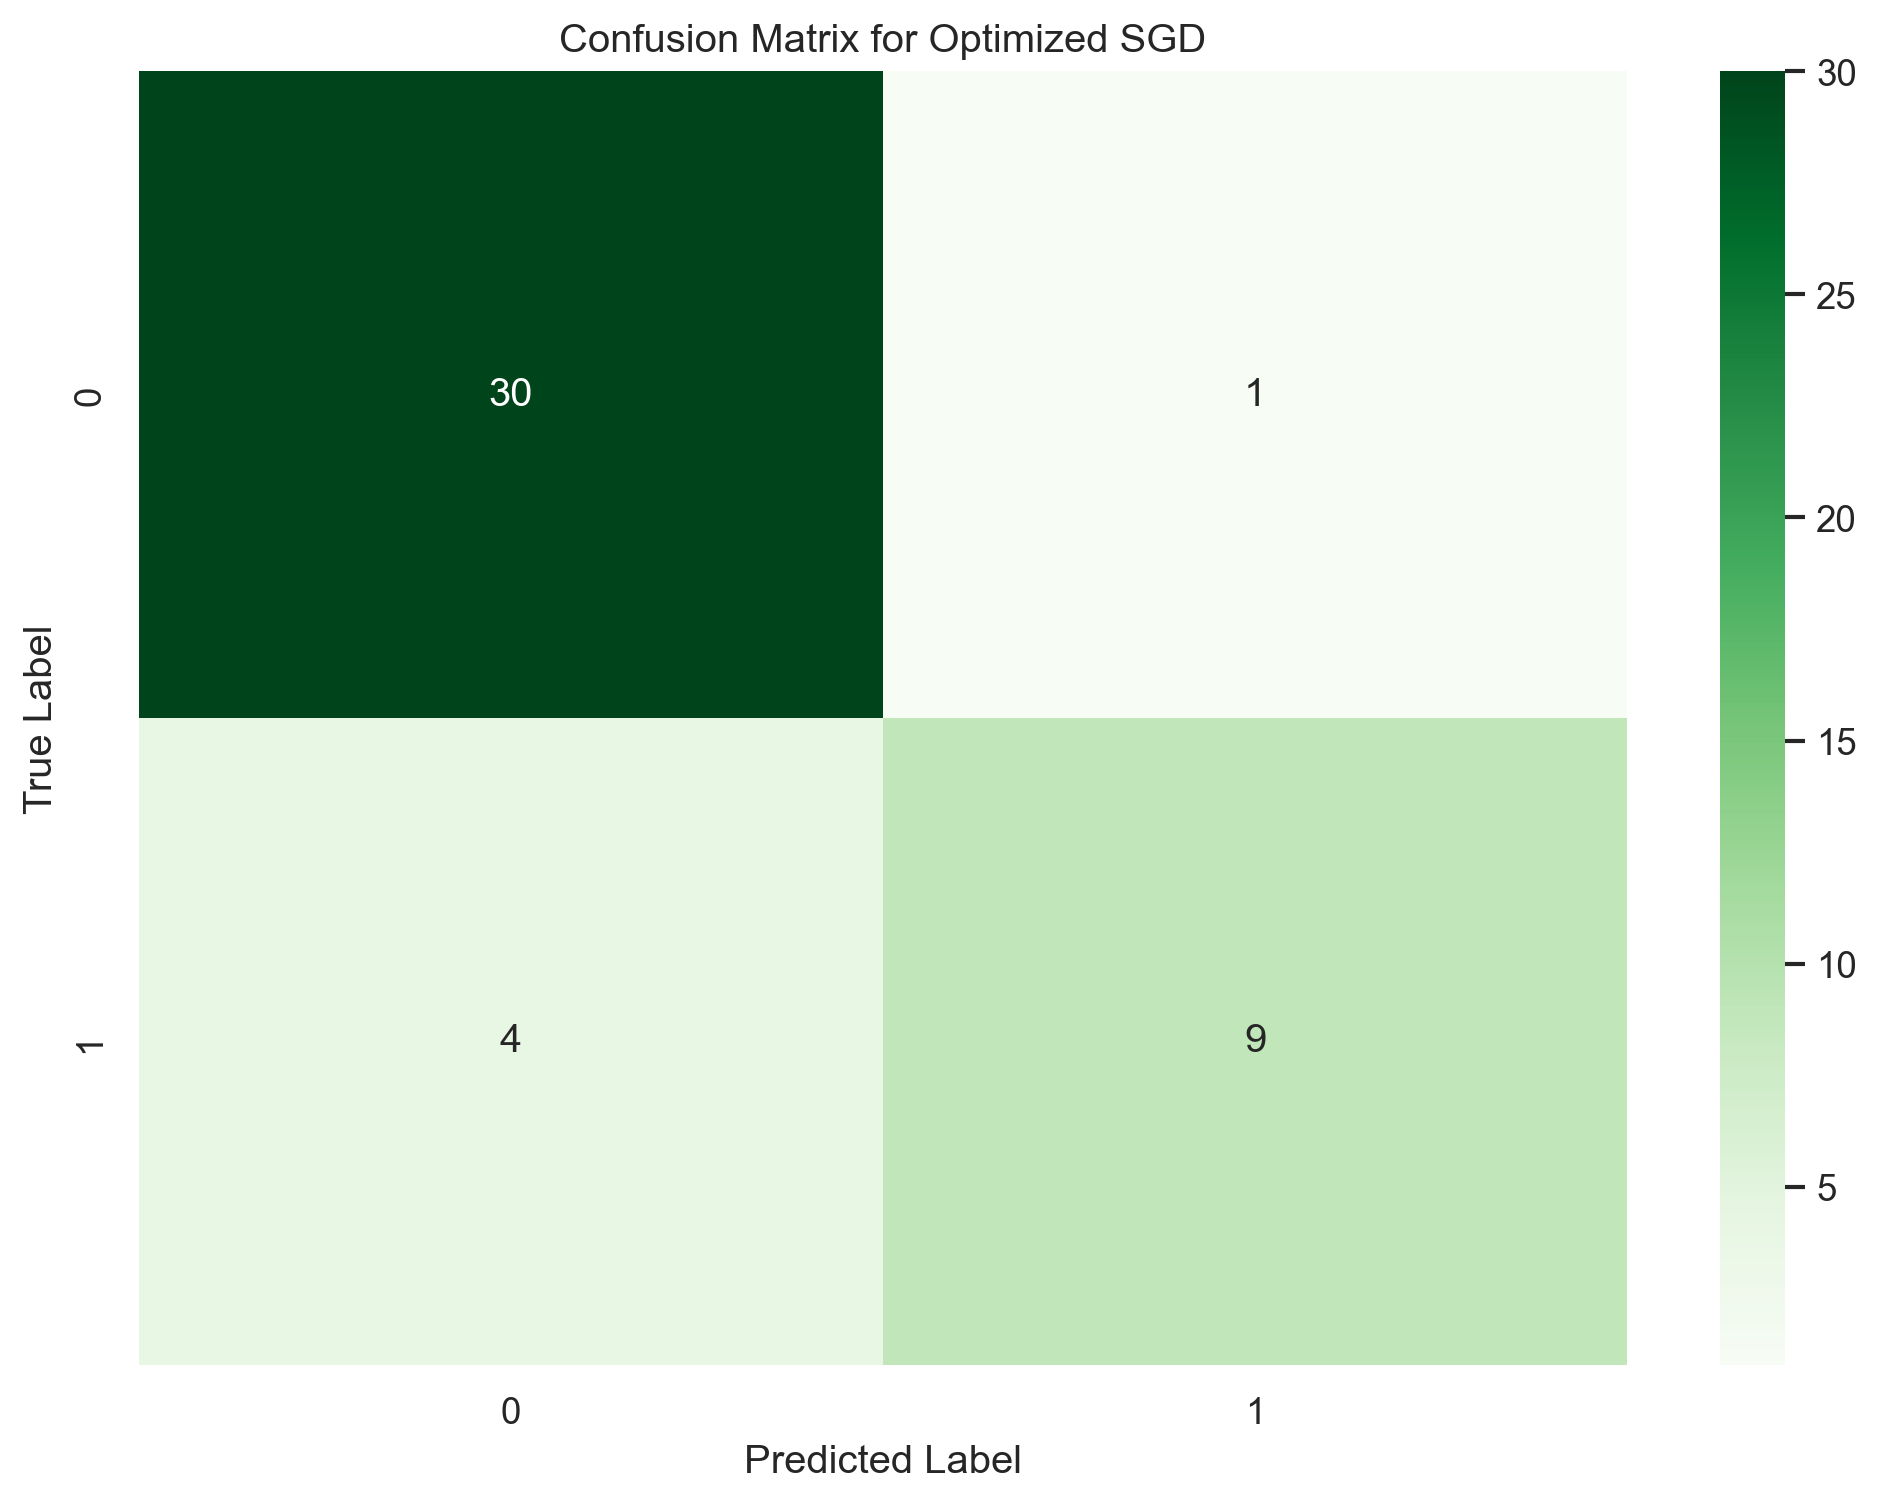

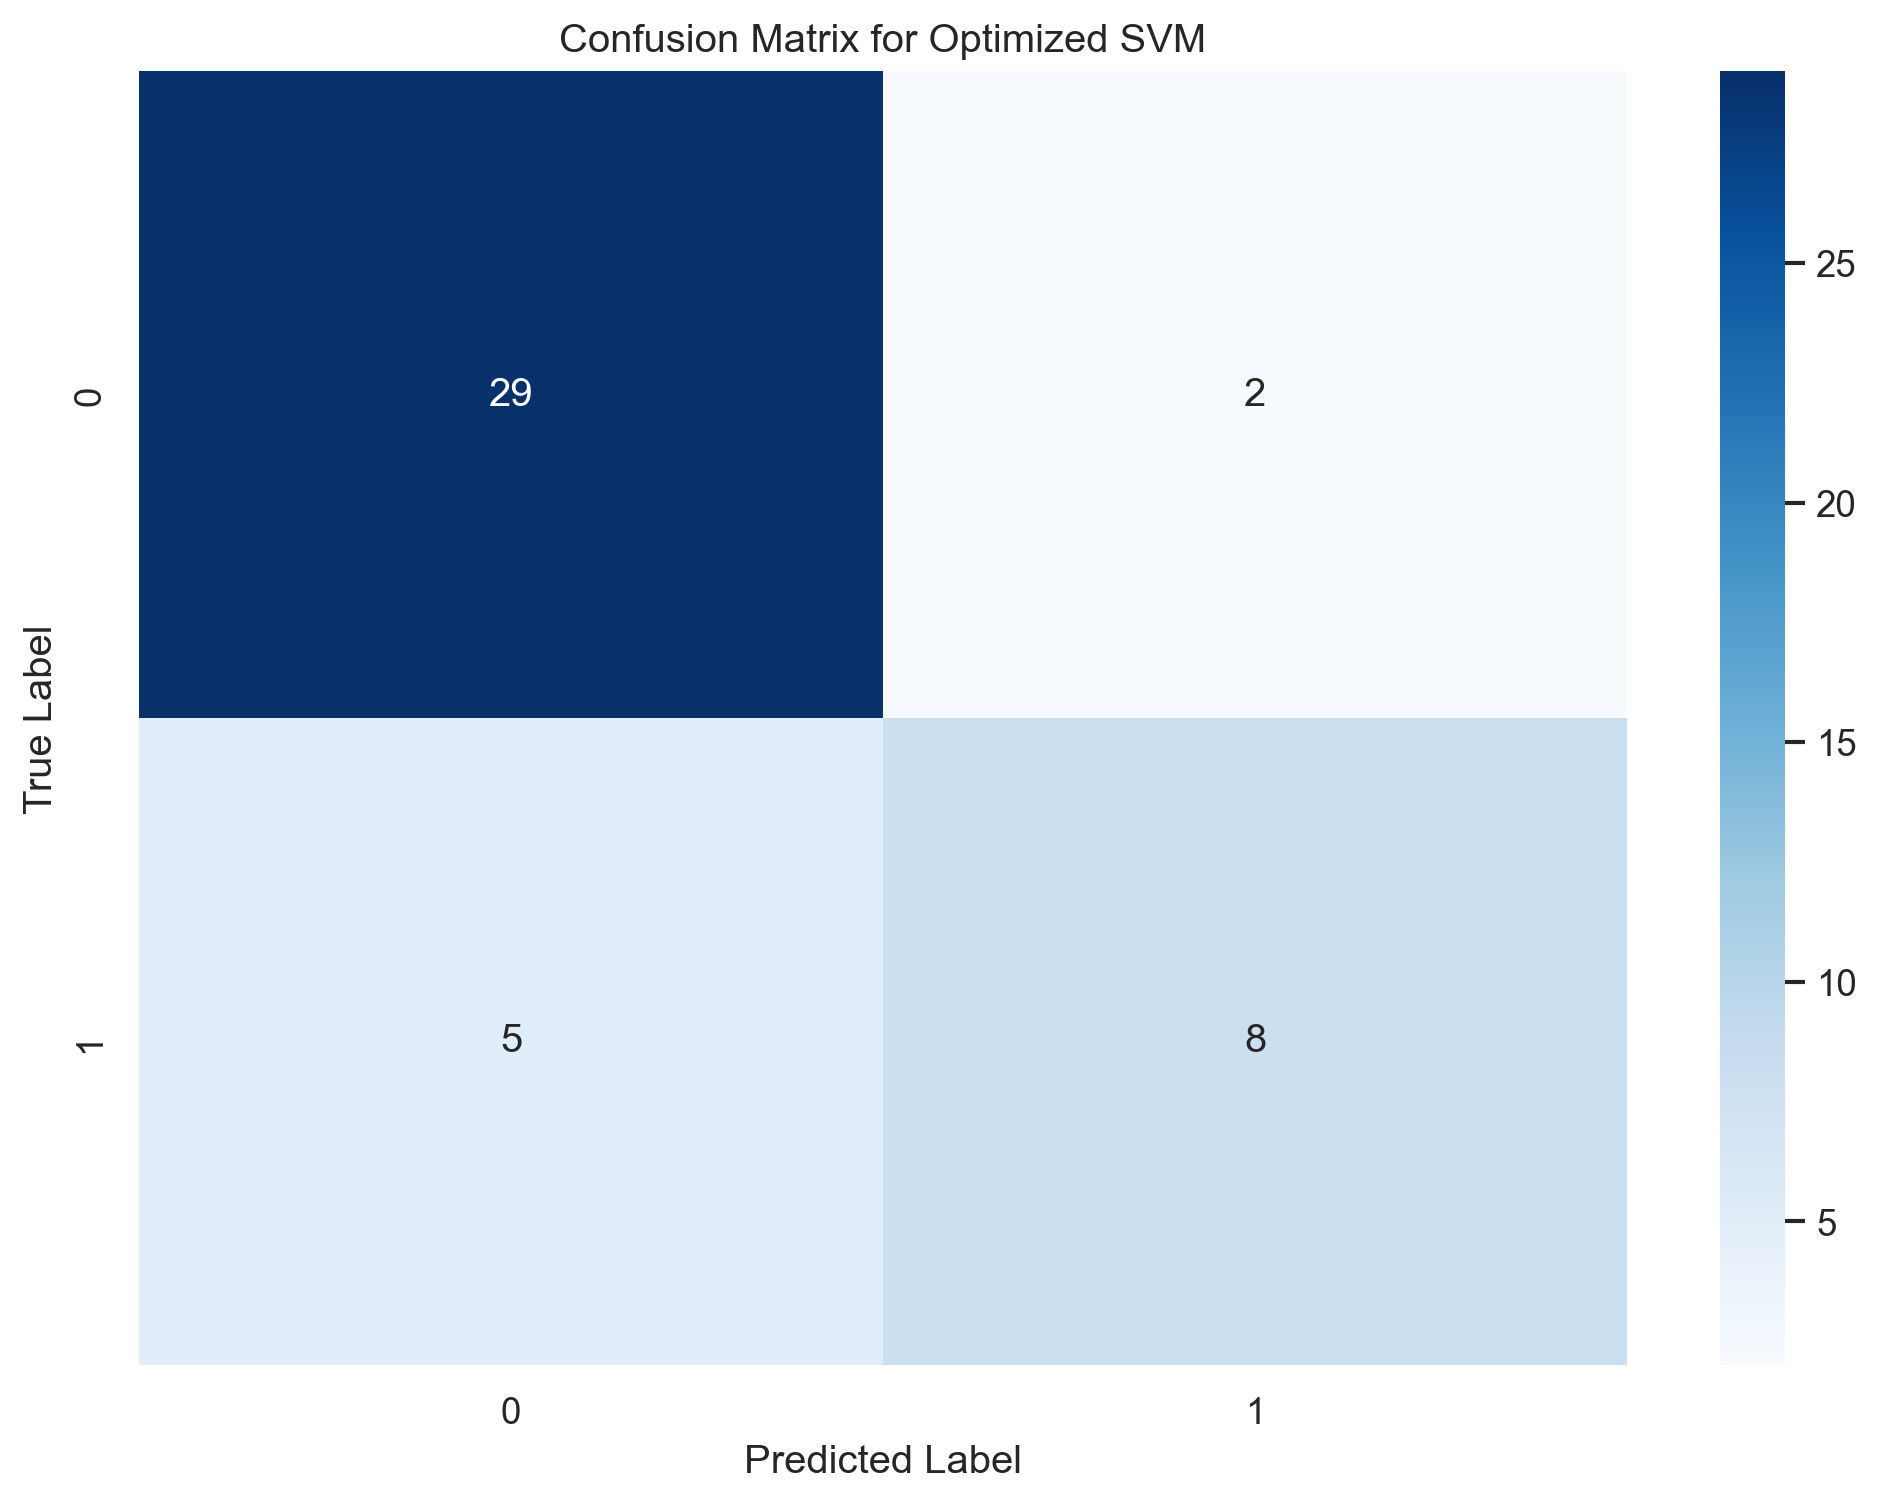

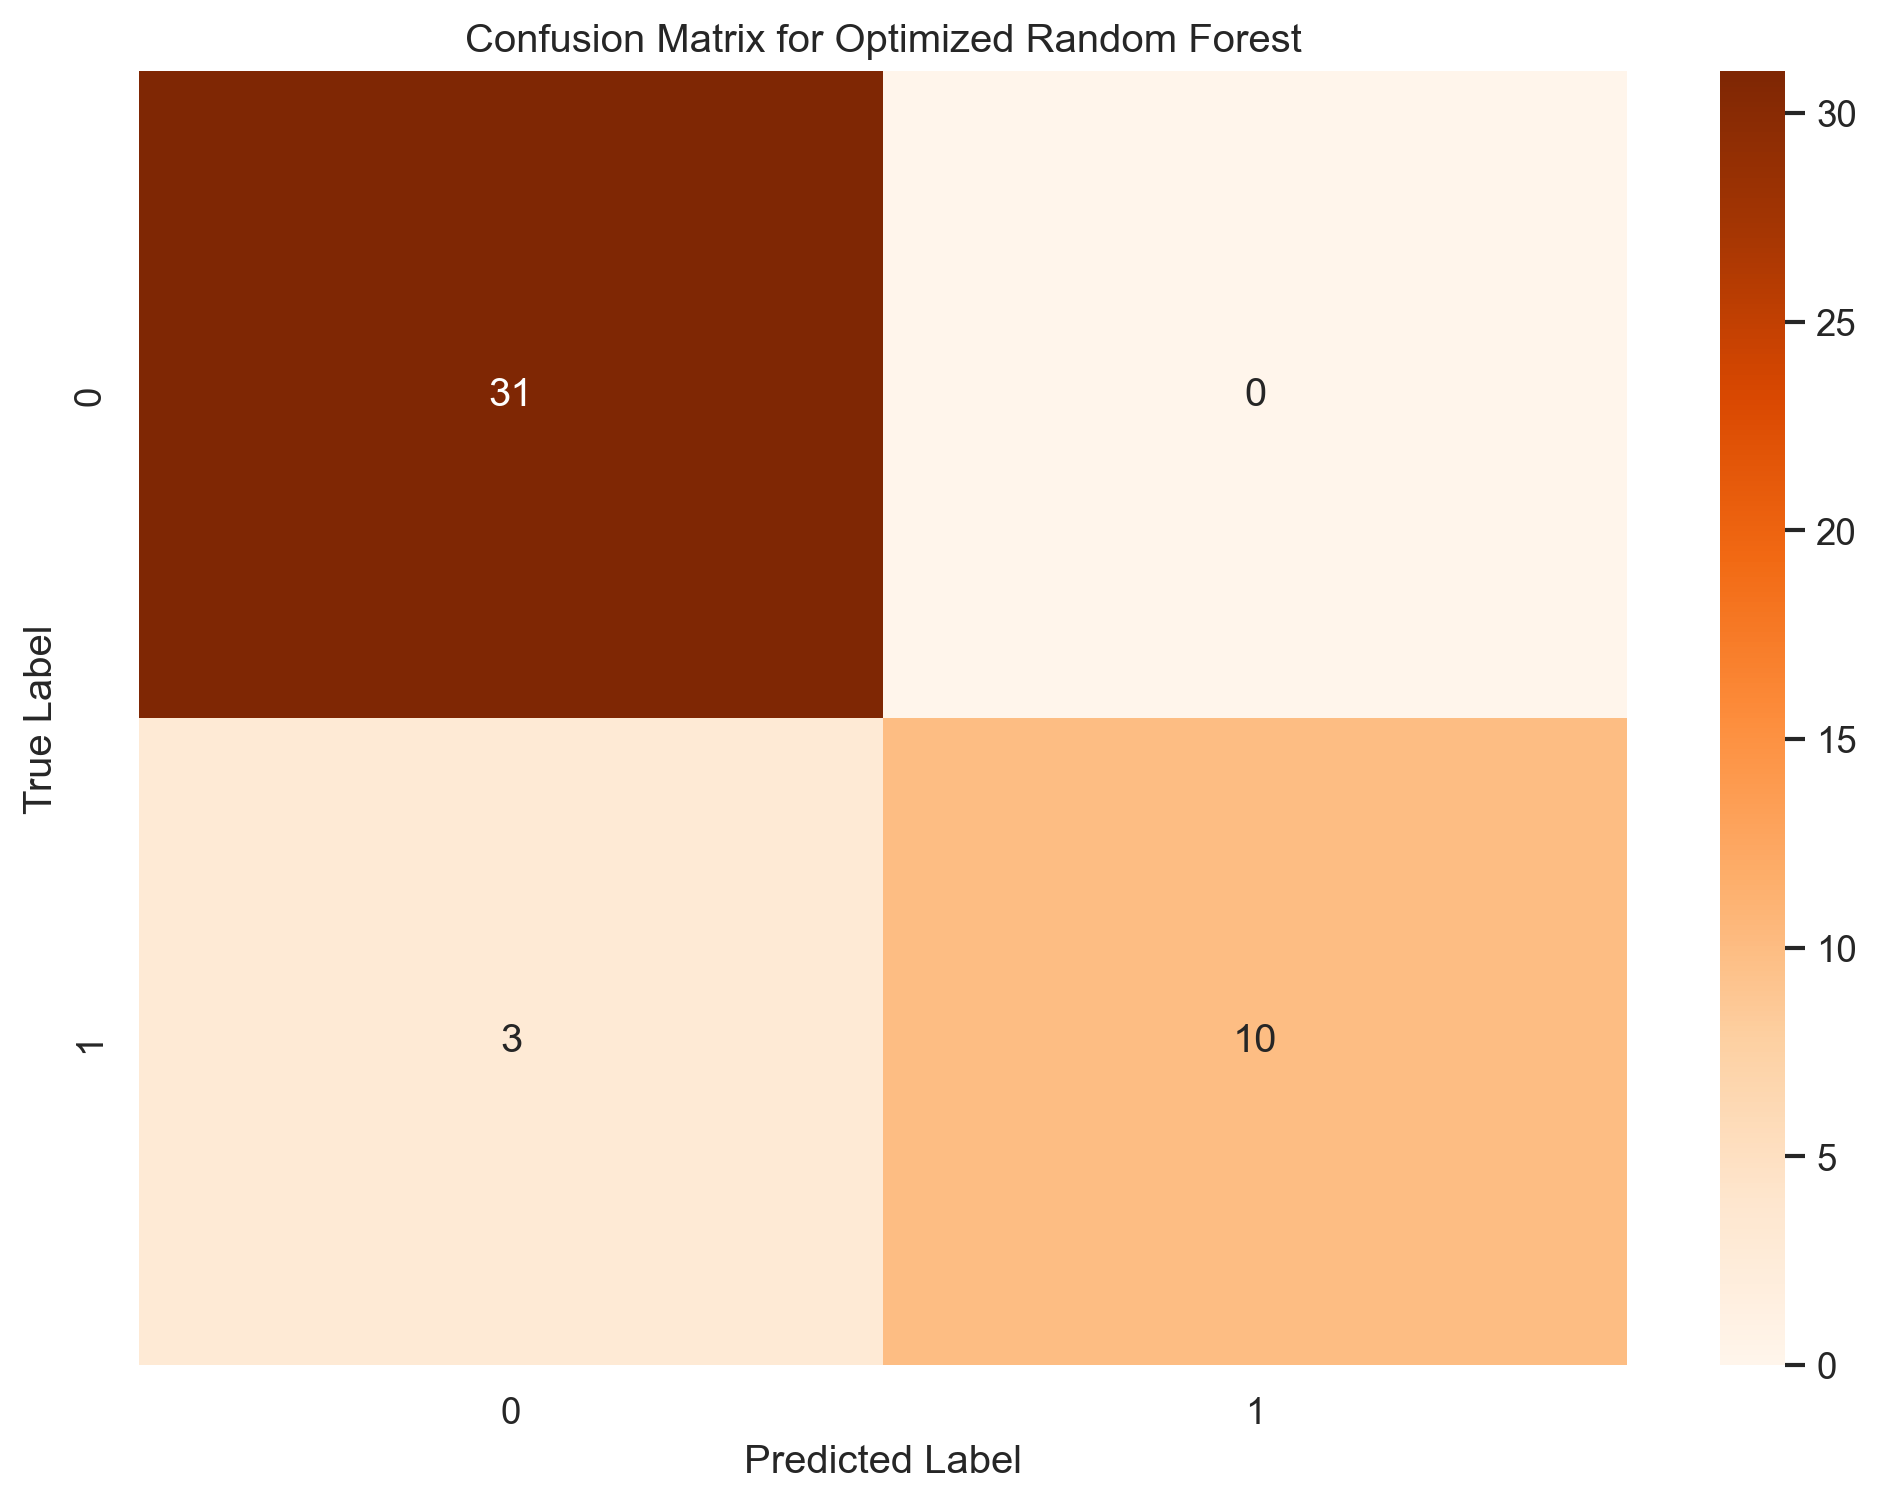

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

labels = [0, 1]  

# Plot confusion matrix for SGD
best_sgd_conf_matrix = confusion_matrix(y_test_encoded, sgd_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(best_sgd_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized SGD')
plt.show()

# Plot confusion matrix for SVM
best_svm_conf_matrix = confusion_matrix(y_test_encoded, svm_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(best_svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized SVM')
plt.show()

# Plot confusion matrix for Random Forest
best_rf_conf_matrix = confusion_matrix(y_test_encoded, rf_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(best_rf_conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Optimized Random Forest')
plt.show()


In [31]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score, fbeta_score, roc_auc_score

# Define the best estimators dictionary
best_estimators = {
    'SGD Classifier': best_sgd_clf,
    'SVM': best_svm_clf,
    'Random Forest': best_rf_clf
}

# Function to print metrics
def print_metrics(model_name, predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, pos_label=1)
    precision = precision_score(y_test, predictions, pos_label=1, zero_division=1)
    f1 = f1_score(y_test, predictions, pos_label=1)
    fbeta_0_1 = fbeta_score(y_test, predictions, beta=0.1, pos_label=1)
    fbeta_10 = fbeta_score(y_test, predictions, beta=10, pos_label=1)
    auc = roc_auc_score(y_test, predictions)
    
    print(f"\nFinal Result of the best model ({model_name})\n")
    print(f'Best Model ({model_name}) Accuracy: {accuracy}')
    print(f'Best Model ({model_name}) Balanced Accuracy: {balanced_accuracy}')
    print(f'Best Model ({model_name}) Recall: {recall}')
    print(f'Best Model ({model_name}) Precision: {precision}')
    print(f'Best Model ({model_name}) F1 Score: {f1}')
    print(f'Best Model ({model_name}) F-beta Score (beta=0.1): {fbeta_0_1}')
    print(f'Best Model ({model_name}) F-beta Score (beta=10): {fbeta_10}')
    print(f'Best Model ({model_name}) AUC: {auc}\n')


print_metrics("SGD", sgd_predictions, y_test_encoded)
print_metrics("SVM", svm_predictions, y_test_encoded)
print_metrics("Random Forest", rf_predictions, y_test_encoded)

# Select the best model based on F1 score
best_model_name = ""
best_model_f1 = 0
best_model_predictions = None

if sgd_f1 > svm_f1 and sgd_f1 > rf_f1:
    best_model_name = "SGD Classifier"
    best_model_f1 = sgd_f1
    best_model_predictions = sgd_predictions
elif svm_f1 > sgd_f1 and svm_f1 > rf_f1:
    best_model_name = "SVM"
    best_model_f1 = svm_f1
    best_model_predictions = svm_predictions
else:
    best_model_name = "Random Forest"
    best_model_f1 = rf_f1
    best_model_predictions = rf_predictions


print(f"The best model is: {best_model_name} with an F1 score of {best_model_f1}")


print_metrics(best_model_name, best_model_predictions, y_test_encoded)



Final Result of the best model (SGD)

Best Model (SGD) Accuracy: 0.8863636363636364
Best Model (SGD) Balanced Accuracy: 0.8300248138957816
Best Model (SGD) Recall: 0.6923076923076923
Best Model (SGD) Precision: 0.9
Best Model (SGD) F1 Score: 0.7826086956521738
Best Model (SGD) F-beta Score (beta=0.1): 0.897334649555775
Best Model (SGD) F-beta Score (beta=10): 0.6938931297709924
Best Model (SGD) AUC: 0.8300248138957818


Final Result of the best model (SVM)

Best Model (SVM) Accuracy: 0.8409090909090909
Best Model (SVM) Balanced Accuracy: 0.7754342431761787
Best Model (SVM) Recall: 0.6153846153846154
Best Model (SVM) Precision: 0.8
Best Model (SVM) F1 Score: 0.6956521739130435
Best Model (SVM) F-beta Score (beta=0.1): 0.7976307996051334
Best Model (SVM) F-beta Score (beta=10): 0.6167938931297711
Best Model (SVM) AUC: 0.7754342431761787


Final Result of the best model (Random Forest)

Best Model (Random Forest) Accuracy: 0.9318181818181818
Best Model (Random Forest) Balanced Accuracy: 

### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

In [32]:
# Final evaluation of the best model and calculation of FNR
best_model = best_estimators[best_model_name]
y_pred_best = best_model.predict(X_test_transformed)

# Calculate confusion matrix
cmat_best = confusion_matrix(y_test_encoded, y_pred_best)
print("Confusion Matrix:")
print(cmat_best)
tn, fp, fn, tp = cmat_best.ravel() 
fnr = fn / (fn + tp)
print(f"False Negative Rate (FNR): {fnr:.2f}")
print(f"Probability that a sample from a person with a malignant tumor is given a result that they do not have cancer: {fnr:.2f}")

Confusion Matrix:
[[31  0]
 [ 3 10]]
False Negative Rate (FNR): 0.23
Probability that a sample from a person with a malignant tumor is given a result that they do not have cancer: 0.23


## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

Top 4 features based on T-scores:

Feature: mean concave points, T-score: 2.53
Feature: mean concavity, T-score: 2.26
Feature: mean perimeter, T-score: 1.87
Feature: mean radius, T-score: 1.72


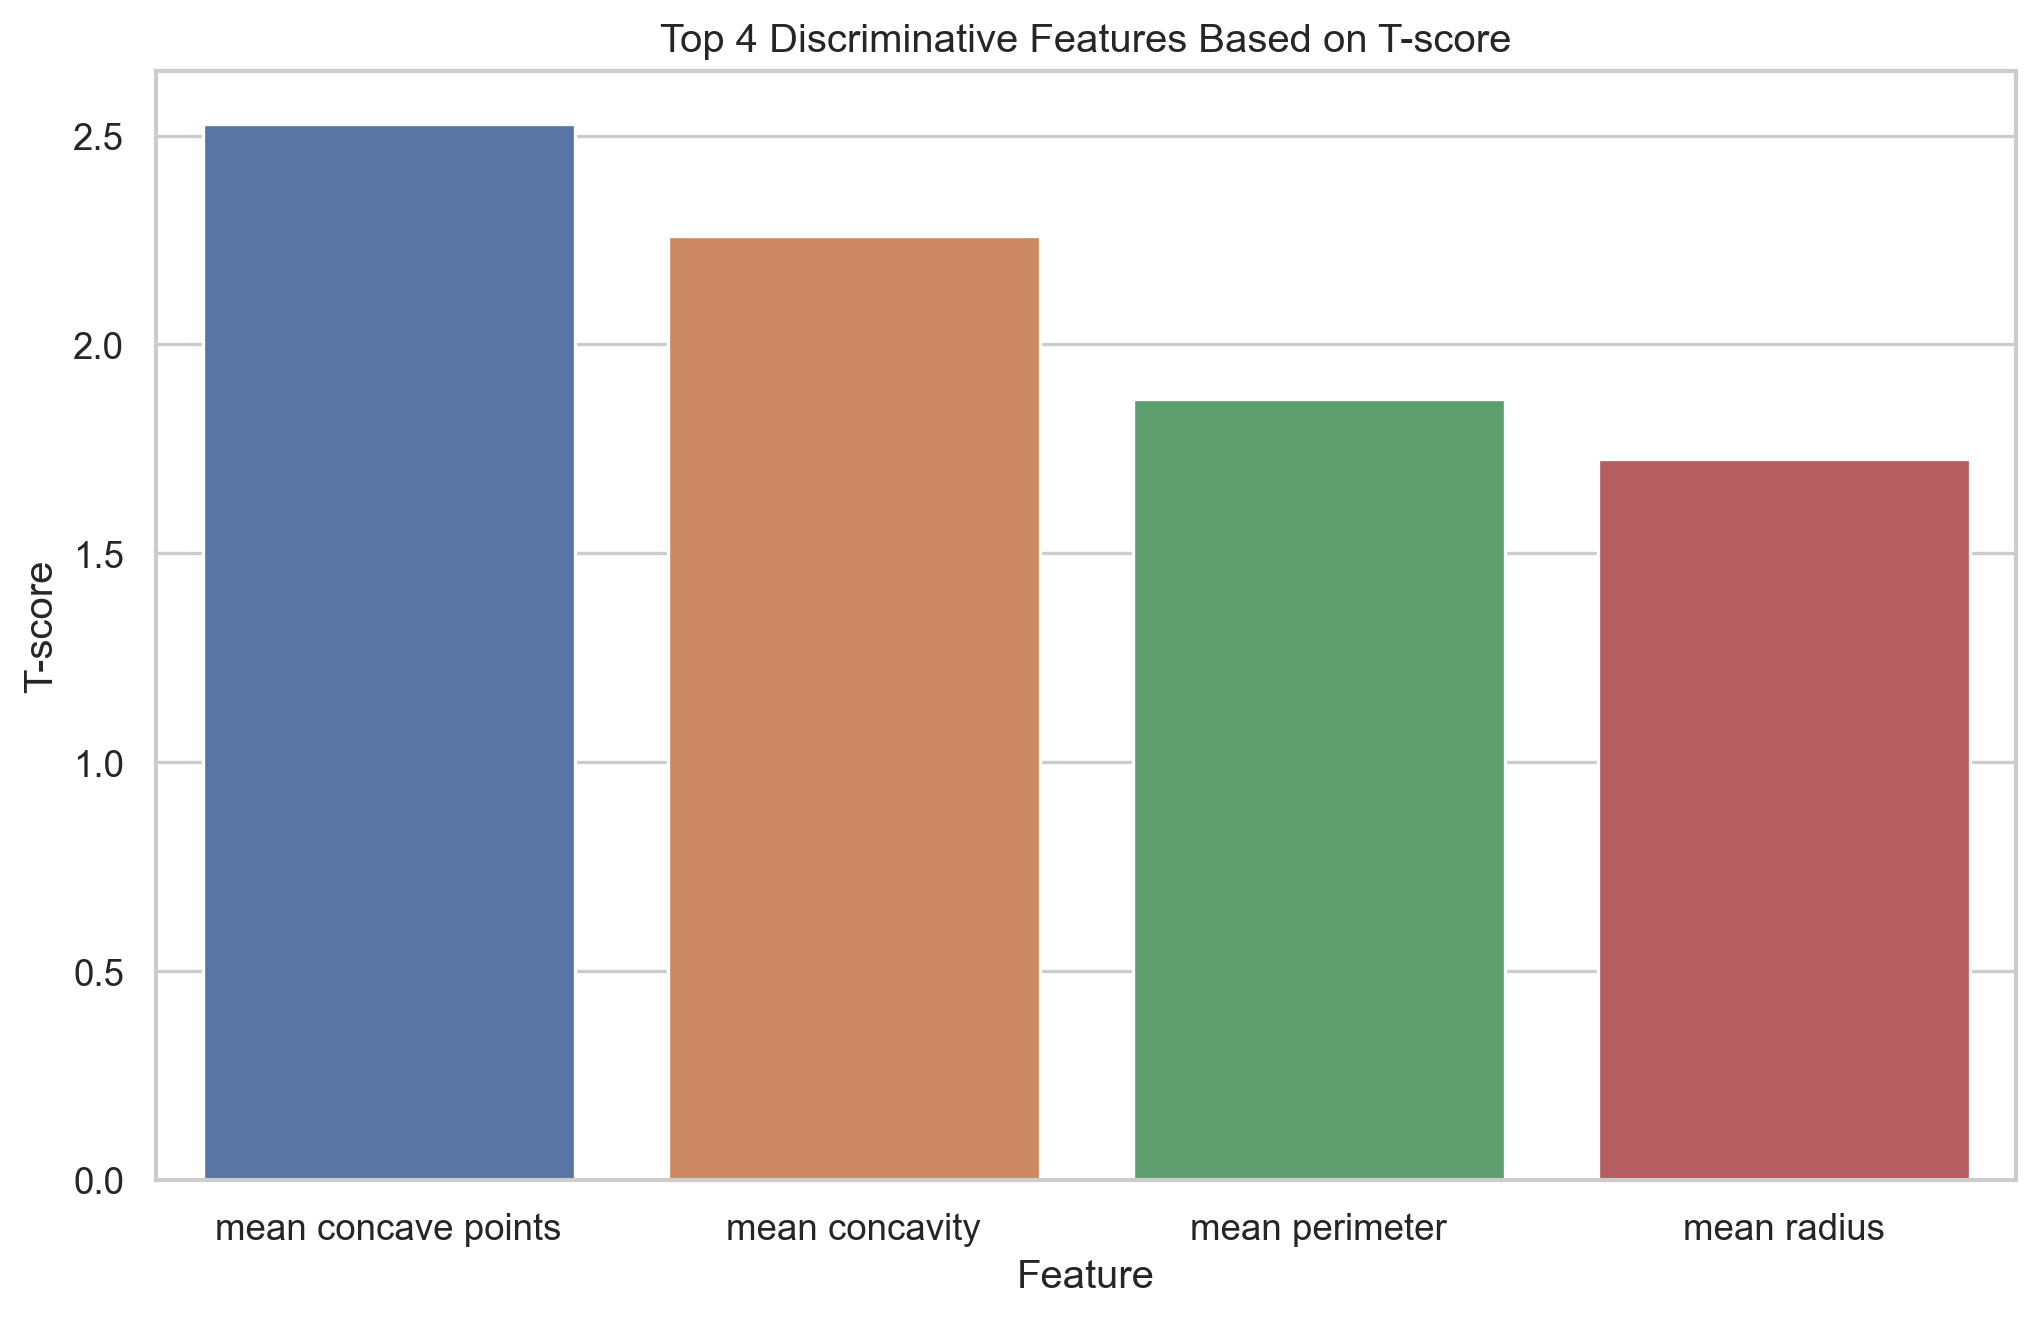

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

features = [col for col in df.columns if col != 'label'] 

for feature in features:
    df[feature] = pd.to_numeric(df[feature], errors='coerce')


t_scores = {}


benign = df[df['label'] == 0]  
malignant = df[df['label'] == 1]  

# Compute T-scores for each feature
for feature in features:
    mean_x1 = benign[feature].mean()
    mean_x2 = malignant[feature].mean()
    stddev_x1 = benign[feature].std()
    stddev_x2 = malignant[feature].std()
    
    # Calculate T-score
    if stddev_x1 + stddev_x2 == 0:
        t_score = np.nan
    else:
        t_score = (mean_x2 - mean_x1) / (0.5 * (stddev_x2 + stddev_x1))
    t_scores[feature] = abs(t_score)

sorted_t_scores = sorted(t_scores.items(), key=lambda item: item[1], reverse=True)
top_4_features = [feature for feature, score in sorted_t_scores[:4]]

print("Top 4 features based on T-scores:\n")
for feature, score in sorted_t_scores[:4]:
    print(f"Feature: {feature}, T-score: {score:.2f}")


t_scores_df = pd.DataFrame(sorted_t_scores, columns=["Feature", "T-score"])

plt.figure(figsize=(10, 6))
sns.barplot(x="Feature", y="T-score", data=t_scores_df.head(4))
plt.title("Top 4 Discriminative Features Based on T-score")
plt.xlabel("Feature")
plt.ylabel("T-score")
plt.show()


### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [34]:
X = df[top_4_features]
y = df['label'].apply(lambda x: 1 if x == 1 else 0).values  # Assuming 1 is 'malignant' and 0 is 'benign'

malignant = df[df['label'] == 1]
benign = df[df['label'] == 0]
malignant_mean = malignant[top_4_features].mean().values
benign_mean = benign[top_4_features].mean().values
xmean = 0.5 * (malignant_mean + benign_mean)

best_model_name = "RandomForestClassifier"
best_model = RandomForestClassifier(random_state=42)

In [35]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [36]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

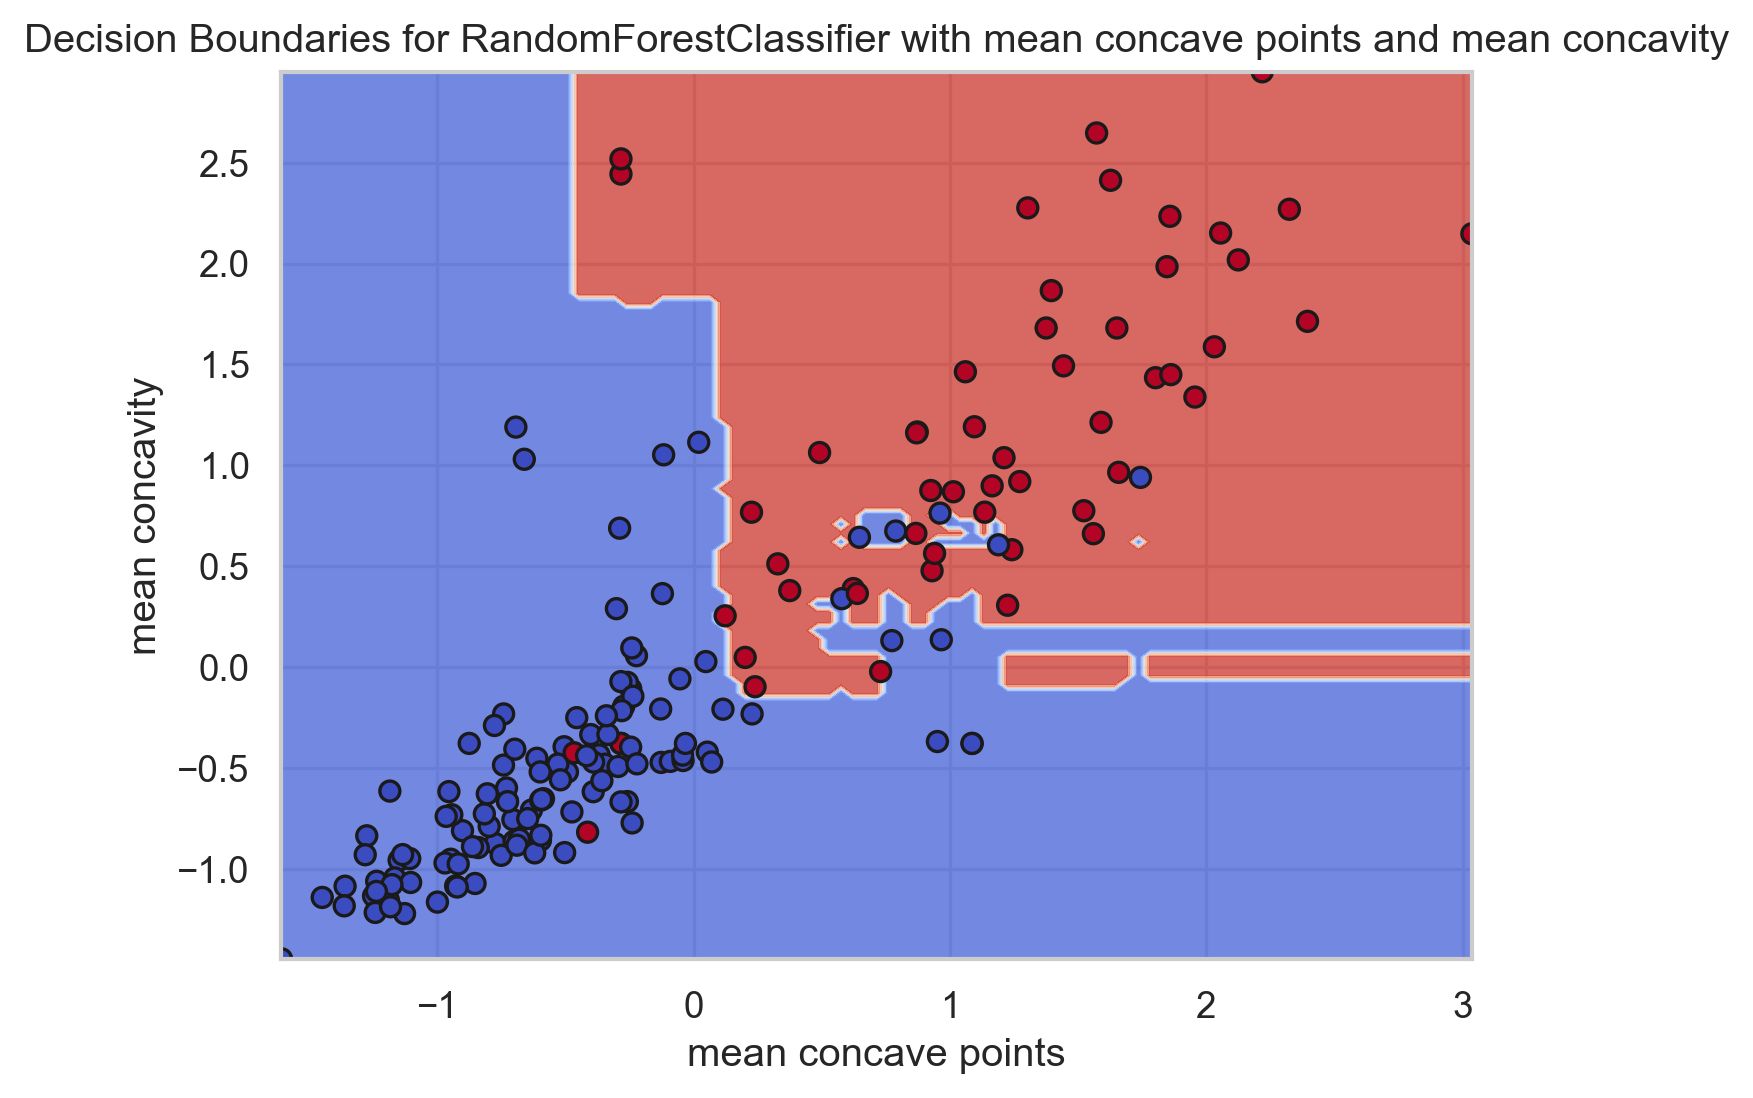

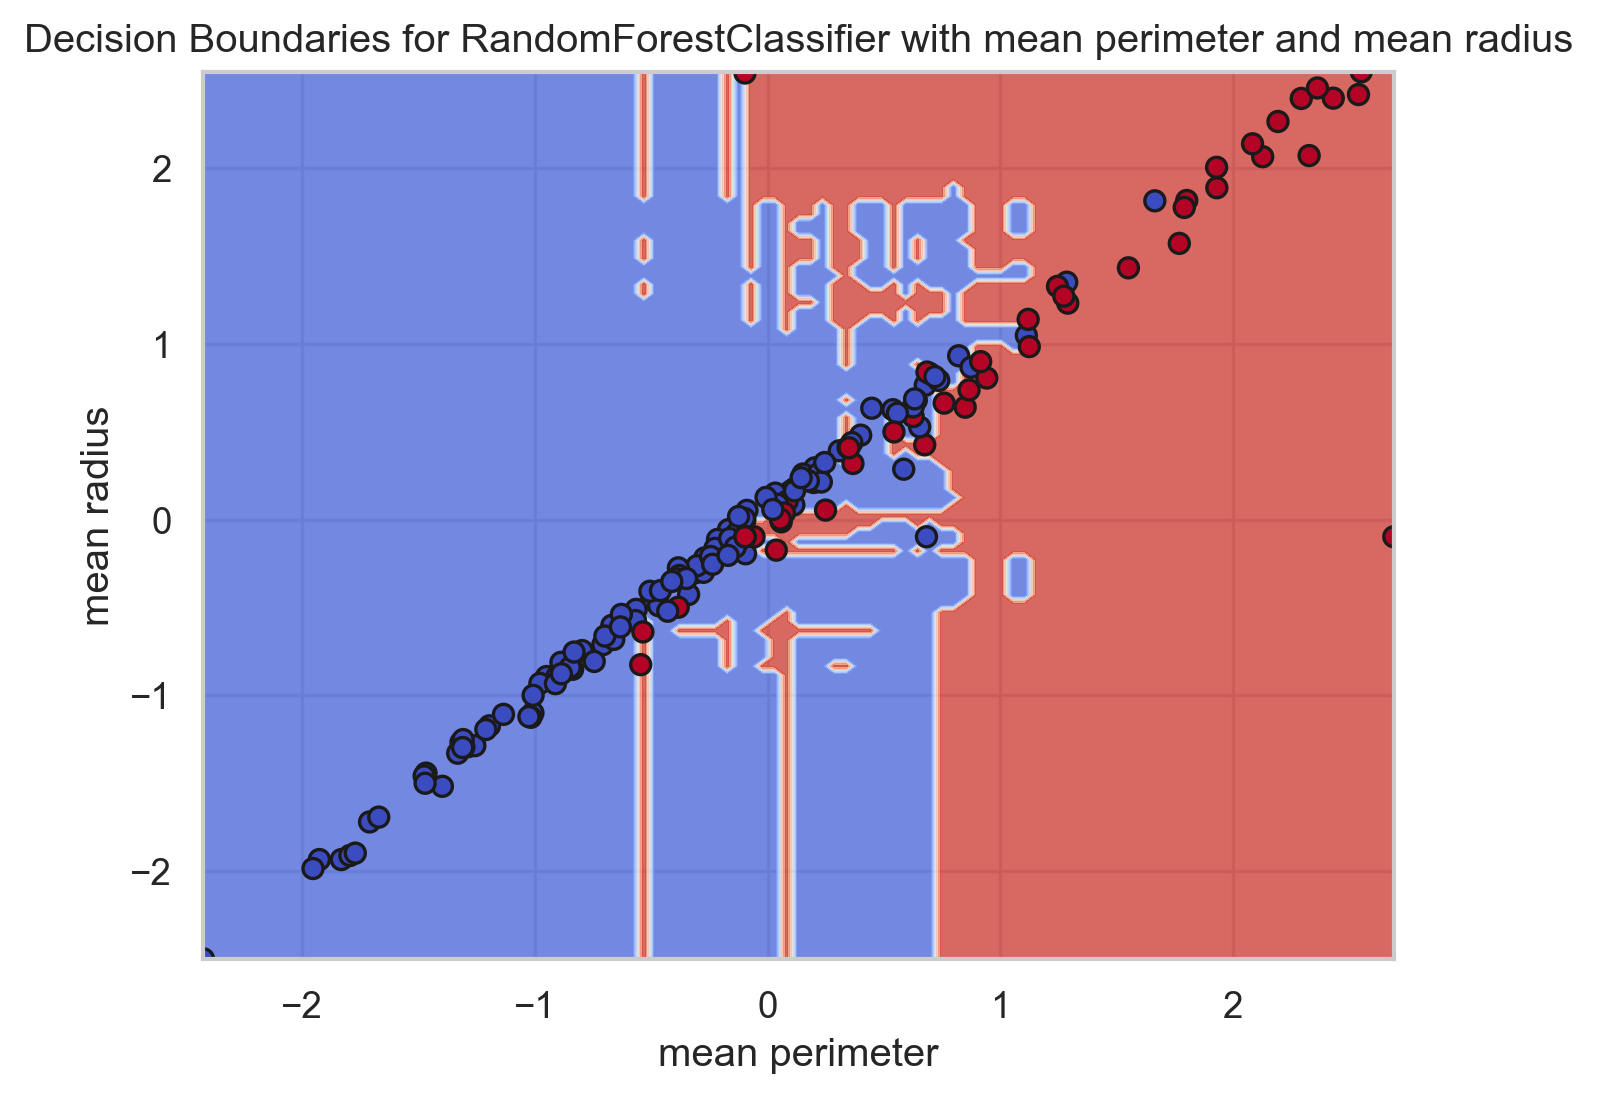

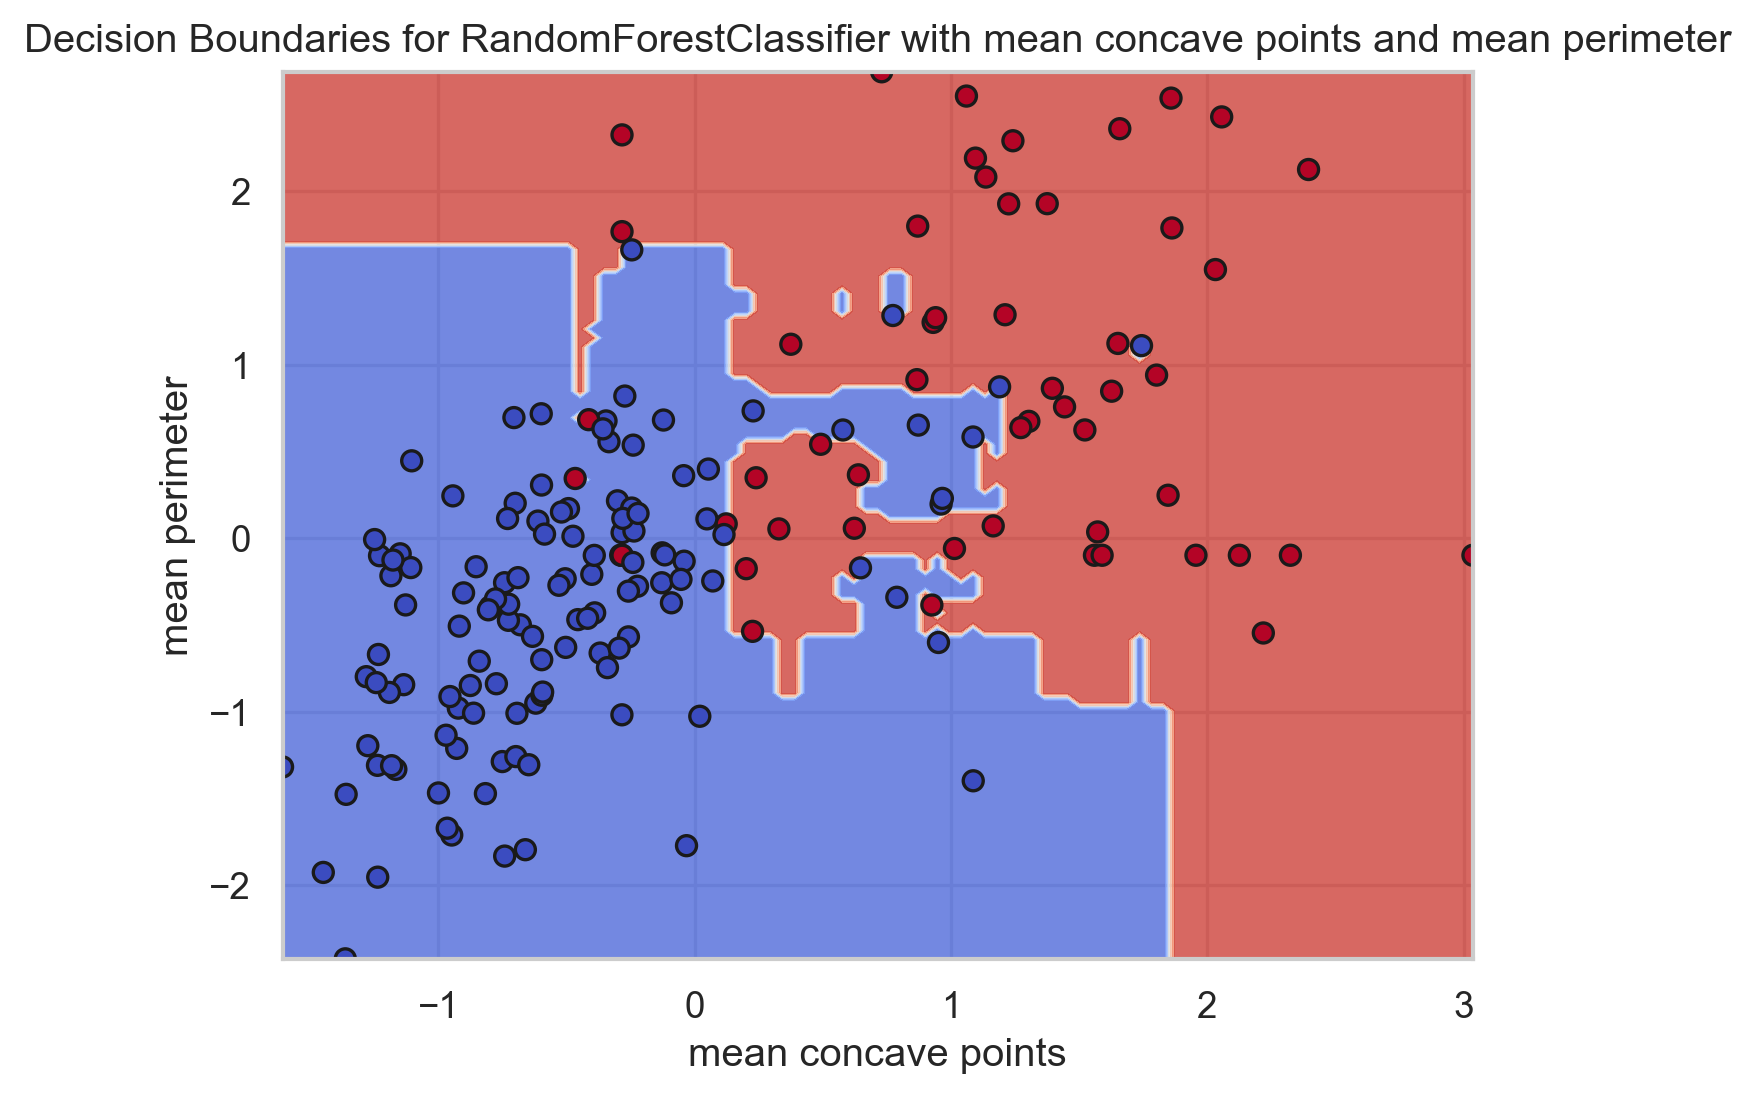

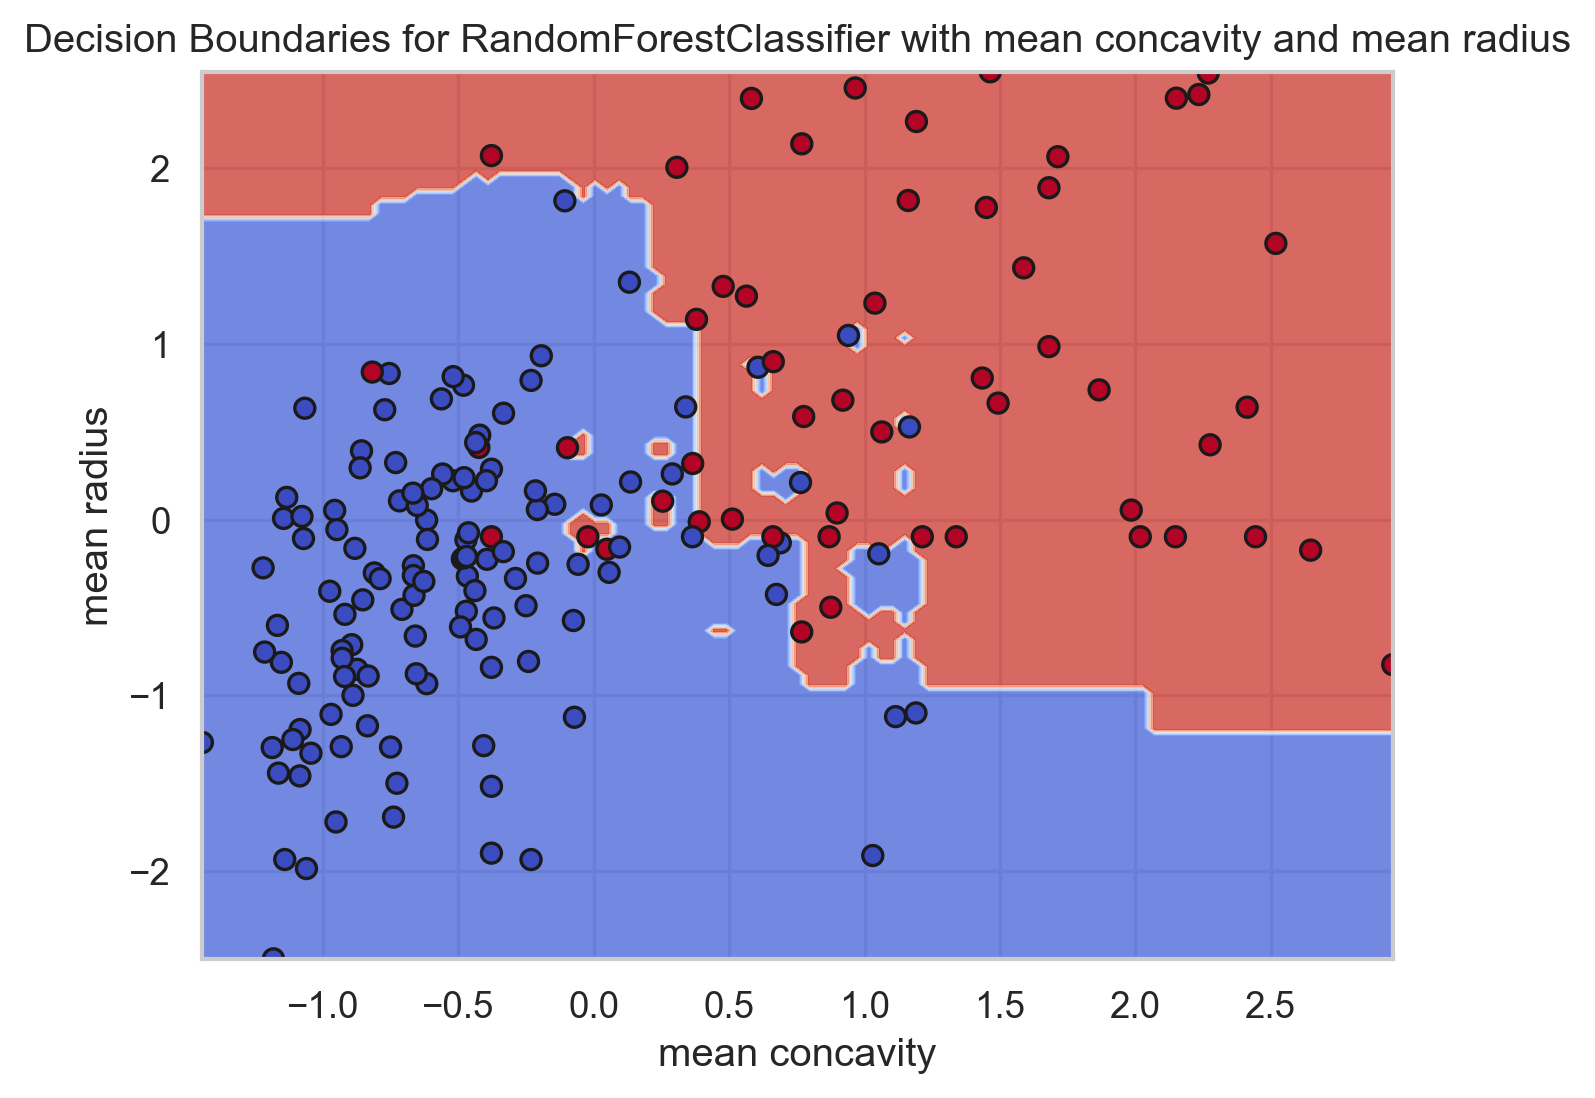

In [37]:
feature_pairs = [(top_4_features[0], top_4_features[1]),
                 (top_4_features[2], top_4_features[3]),
                 (top_4_features[0], top_4_features[2]),
                 (top_4_features[1], top_4_features[3])]
for (feature1, feature2) in feature_pairs:
    if feature1 not in top_4_features or feature2 not in top_4_features:
        continue  
    idx1, idx2 = top_4_features.index(feature1), top_4_features.index(feature2)
    X_pair = X[[feature1, feature2]].values
    y_pair = y
    X_train_pair, X_test_pair, y_train_pair, y_test_pair = train_test_split(X_pair, y_pair, test_size=0.2, stratify=y_pair, random_state=42)
    
    # Preprocess the pair data
    preprocessor_pair = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    X_train_pair_preprocessed = preprocessor_pair.fit_transform(X_train_pair)
    X_test_pair_preprocessed = preprocessor_pair.transform(X_test_pair)
    best_model.fit(X_train_pair_preprocessed, y_train_pair)
    
    # Calculate the xmean for the plot_contours function
    x1_class1 = X_train_pair[y_train_pair == 0, 0]
    x1_class2 = X_train_pair[y_train_pair == 1, 0]
    x2_class1 = X_train_pair[y_train_pair == 0, 1]
    x2_class2 = X_train_pair[y_train_pair == 1, 1]
    xmean = np.array([0.5 * (np.mean(x1_class1) + np.mean(x1_class2)), 0.5 * (np.mean(x2_class1) + np.mean(x2_class2))])
    
    # Generate mesh grid
    xx, yy = make_meshgrid(X_train_pair_preprocessed[:, 0], X_train_pair_preprocessed[:, 1])
    
    # Plot decision boundaries
    plt.figure()
    plot_contours(best_model, xx, yy, xmean, 0, 1, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train_pair_preprocessed[:, 0], X_train_pair_preprocessed[:, 1], c=y_train_pair, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Decision Boundaries for {best_model_name} with {feature1} and {feature2}')
    plt.show()

In [38]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Assuming y_test_encoded is the true labels and y_pred_best are the predictions from the best model
# Calculate the metrics
accuracy = accuracy_score(y_test_encoded, y_pred_best)
balanced_accuracy = balanced_accuracy_score(y_test_encoded, y_pred_best)
recall = recall_score(y_test_encoded, y_pred_best, pos_label=1)
precision = precision_score(y_test_encoded, y_pred_best, pos_label=1)
f1 = f1_score(y_test_encoded, y_pred_best, pos_label=1)
auc = roc_auc_score(y_test_encoded, y_pred_best)

# Print the results
print("Final Model Performance Metrics")
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {balanced_accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

Final Model Performance Metrics
Accuracy: 0.93
Balanced Accuracy: 0.88
Recall: 0.77
Precision: 1.00
F1 Score: 0.87
AUC: 0.88


### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

##### On the basis of final model performance metrics, The model tends to display a high amount of accuracy (0.93) and precision (1.00) telling us that it is highly effective at correctly identifyibg malignant tumors. But the recall (0.77) and balanced accuracy (0.88) are slightly lower, indicating some malignant cases may still be missed. The F1 score (0.87) and AUC (0.88) show a balance between precision and recall, and the model's capability to differentiate between benign and malignant cases. In summary, the model meets the client's criteria for precision and accuracy but could be improved further in terms of recall.